# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci
from test_ci import config_test_paths

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

FILE_DICT['PXD015087_ref.txt'] = 'https://datashare.biochem.mpg.de/s/GIdgji3408UvS07/download'
FILE_DICT['PXD015087_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/eMuNLE2yjNbmiSi/download'
FILE_DICT['PXD015087_ref_evd_singlerun.txt'] = 'https://datashare.biochem.mpg.de/s/0QxM7eR7VDg1rFK/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')

BASE_DIR = os.path.join(tmp_folder , 'test_files') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder,'test_temp')
ARCHIVE_DIR = os.path.join(tmp_folder,  os.path.sep, 'test_archive', os.path.sep)

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)

test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)


for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2022-05-08 23:05:41> Logging to C:\Users\admin\alphapept\logs\log_20220508230541.txt.
2022-05-08 23:05:41> Platform information:
2022-05-08 23:05:41> system     - Windows
2022-05-08 23:05:41> release    - 10
2022-05-08 23:05:41> version    - 10.0.19044
2022-05-08 23:05:41> machine    - AMD64
2022-05-08 23:05:41> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-08 23:05:41> cpu count  - 24
2022-05-08 23:05:41> ram memory - 88.1/127.7 Gb (available/total)
2022-05-08 23:05:41> 
2022-05-08 23:05:41> Python information:
2022-05-08 23:05:41> SQLAlchemy                    - 1.4.35
2022-05-08 23:05:41> alphapept                     - 0.4.6
2022-05-08 23:05:41> biopython                     - 1.79
2022-05-08 23:05:41> bumpversion                   - 
2022-05-08 23:05:41> bumpversion>                  - 
2022-05-08 23:05:42> click                         - 8.0.4
2022-05-08 23:05:42> click>                        - 
2022-05-08 23:05:42> fastcore                      - 1.4.2

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:05:42> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:33<00:00, 33.45s/it]

2022-05-08 23:06:15> Digested 247 proteins and generated 48,722 spectra
2022-05-08 23:06:16> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:34<00:00, 34.03s/it]

2022-05-08 23:06:16> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:06:16> Processing 1 files for step raw_conversion
2022-05-08 23:06:16> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.
2022-05-08 23:06:20> File conversion complete. Extracted 2,603 precursors.
2022-05-08 23:06:20> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:04<?, ?it/s]

2022-05-08 23:06:20> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:06:22> Processing 1 files for step find_features
2022-05-08 23:06:22> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-05-08 23:06:22> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2022-05-08 23:06:22> Hill extraction with centroid_tol 8 and max_gap 2
2022-05-08 23:06:26> Number of hills 45,516, len = 20.18
2022-05-08 23:06:26> Repeating hill extraction with centroid_tol 5.10
2022-05-08 23:06:27> Number of hills 52,919, len = 21.29
2022-05-08 23:06:30> After duplicate removal of hills 43,950
2022-05-08 23:06:37> After split hill_ptrs 61,693
2022-05-08 23:06:39> After filter hill_ptrs 60,175
2022-05-08 23:06:51> Extracting hill stats complete
2022-05-08 23:06:54> Found 7,045 pre isotope patterns.
2022-05-08 23:07:13> Extracted 6,428 isotope patterns.
2022-05-08 23:07:23> Report complete.
2022-05-08 23:07:23> Matching features to query data.
2022-0

  0%|                                                                                            | 0/1 [01:01<?, ?it/s]

2022-05-08 23:07:23> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:24> Starting first search.
2022-05-08 23:07:24> Processing 1 files for step search_db
2022-05-08 23:07:24> Calibrating fragments
2022-05-08 23:07:25> Performing search on 2,969 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-05-08 23:07:27> Found 27 psms.
2022-05-08 23:07:27> Extracting columns for scoring.
2022-05-08 23:07:34> Extracted columns from 27 spectra.
2022-05-08 23:07:34> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-05-08 23:07:35> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-05-08 23:07:35> First search complete.


  0%|                                                                                            | 0/1 [00:11<?, ?it/s]

2022-05-08 23:07:35> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:35> Processing 1 files for step calibrate_hdf
2022-05-08 23:07:35> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-05-08 23:07:35> Scoring using X-Tandem
2022-05-08 23:07:35> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-05-08 23:07:35> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2022-05-08 23:07:35> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-05-08 23:07:35> Not enough data points present. Skipping recalibration.
2022-05-08 23:07:35> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2022-05-08 23:07:35> Starting fragment calibration.
2022-05-08 23:07:35> Calibrating fragments with neighbors
2022-05-08 23:07:35> Scoring using X-Tandem
2022-05-08 23:07:35> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-05-08 23:07:35> 15 target (0 decoy) 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:35> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:35> Starting second search with DB.
2022-05-08 23:07:35> Processing 1 files for step search_db
2022-05-08 23:07:35> Found calibrated prec_tol with value 9.03
2022-05-08 23:07:35> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\projects\\alphapept\\sandbox\\temp\\test_temp\\thermo_IRT.ms_data.hdf>.'
2022-05-08 23:07:35> Performing search on 2,969 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 9.03.
2022-05-08 23:07:35> Found 26 psms.
2022-05-08 23:07:35> Extracting columns for scoring.
2022-05-08 23:07:35> Extracted columns from 26 spectra.
2022-05-08 23:07:35> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-05-08 23:07:36> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-05-08 23:07:36> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:36> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:36> Processing 1 files for step score_hdf
2022-05-08 23:07:36> Calling score_hdf
2022-05-08 23:07:36> Found second search psms for scoring.
2022-05-08 23:07:36> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2022-05-08 23:07:36> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.1)
2022-05-08 23:07:36> The total number of available decoys is lower than the initial set of high scoring targets.
2022-05-08 23:07:36> ML failed. Defaulting to x_tandem score
2022-05-08 23:07:36> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-05-08 23:07:36> Converting x_tandem score to probabilities
2022-05-08 23:07:36> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-05-08 23:07:36> 25 target (0 decoy) of 25 PSMs. fdr 0.000000 for a cutoff of 0.04 (set fdr was 0.01)
2022-05-08 23:07:36> Saving identifications to ms_data file.
2022-05-08 23:07:37> Saving identifications to ms_data file complete

  0%|                                                                                            | 0/1 [00:01<?, ?it/s]

2022-05-08 23:07:37> ==== isobaric_labeling ====
2022-05-08 23:07:37> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:37> Fasta dict with length 247, Pept dict with length 48,724
2022-05-08 23:07:37> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-08 23:07:38> A total of 11 unique and 0 shared peptides.
2022-05-08 23:07:38> A total of 0 ambigious proteins
2022-05-08 23:07:38> A total of 0 unique and 0 shared peptides.
2022-05-08 23:07:38> A total of 0 ambigious proteins
2022-05-08 23:07:38> Global FDR on protein_group
2022-05-08 23:07:38> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-05-08 23:07:38> 3 target (0 decoy) of 3 PSMs. fdr 0.000000 for a cutoff of 0.35 (set fdr was 0.01)
2022-05-08 23:07:38> Global FDR cutoff at 0.34615384615384615.
2022-05-08 23:07:38> FDR on proteins complete. For 0.01 FDR found 15 targets and 0 decoys. A total of 3 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  df_pg.to_hdf(


2022-05-08 23:07:38> Saving complete.
2022-05-08 23:07:38> Protein groups complete.
2022-05-08 23:07:38> ==== quantification ====
2022-05-08 23:07:38> Reading protein_fdr for quantification.


  0%|                                                                                            | 0/1 [00:01<?, ?it/s]

2022-05-08 23:07:38> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-08 23:07:38> Complete.
2022-05-08 23:07:38> Starting profile extraction.



C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:38> LFQ complete.
2022-05-08 23:07:38> Extracting protein_summary
2022-05-08 23:07:38> Saved protein_summary of length 3 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-08 23:07:38> Updating protein_fdr.
2022-05-08 23:07:38> Exporting as csv.
2022-05-08 23:07:38> Saved df of length 15 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-08 23:07:38> ==== export ====


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  df.to_hdf(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.03it/s]


2022-05-08 23:07:39> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-08 23:07:39> Analysis complete.


### Thermo HeLa

2022-05-08 23:07:39> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-08 23:07:41> No settings provided. Creating from default settings.
2022-05-08 23:07:41> Couldn't find compiled exe. Using Python version for testing.
2022-05-08 23:07:41> Logging to C:\Users\admin\alphapept\logs\log_20220508230741.txt.
2022-05-08 23:07:41> Platform information:
2022-05-08 23:07:41> system     - Windows
2022-05-08 23:07:41> release    - 10
2022-05-08 23:07:41> version    - 10.0.19044
2022-05-08 23:07:41> machine    - AMD64
2022-05-08 23:07:41> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-08 23:07:41> cpu count  - 24
2022-05-08 23:07:41> ram memory - 84.9/127.7 Gb (available/total)
2022-05-08 23:07:41> 
2022-05-08 23:07:41> Python information:
2022-05-08 23:07:41> SQLAlchemy                    - 1.4.35
2022-05-08 23:07:41> alphapept                     - 0.4.6
2022-05-08 23:07:41> biopython                     - 1.79
2022-05-08 23:07:41> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:07:42> FASTA contains 36,789 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:16<00:00, 34.52s/it]

2022-05-08 23:10:14> Digested 36,789 proteins and generated 8,624,766 spectra
2022-05-08 23:11:36> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:54<00:00, 234.96s/it]


2022-05-08 23:11:49> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:11:49> Processing 1 files for step raw_conversion
2022-05-08 23:11:49> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-05-08 23:13:52> File conversion complete. Extracted 120,226 precursors.
2022-05-08 23:13:53> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [02:03<?, ?it/s]

2022-05-08 23:13:53> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:13:53> Processing 1 files for step find_features
2022-05-08 23:13:53> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-05-08 23:13:54> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-05-08 23:13:54> Hill extraction with centroid_tol 8 and max_gap 2
2022-05-08 23:13:58> Number of hills 1,105,353, len = 17.35
2022-05-08 23:13:58> Repeating hill extraction with centroid_tol 5.87
2022-05-08 23:14:03> Number of hills 1,227,331, len = 19.44
2022-05-08 23:14:04> After duplicate removal of hills 1,025,845
2022-05-08 23:14:15> After split hill_ptrs 1,207,373
2022-05-08 23:14:15> After filter hill_ptrs 1,188,406
2022-05-08 23:16:31> Extracting hill stats complete
2022-05-08 23:16:41> Found 184,383 pre isotope patterns.
2022-05-08 23:17:23> Extracted 198,500 isotope patterns.
2022-05-08 23:17:27> Report complete.
2022-05-08 23:17:27> Matching features 

  0%|                                                                                            | 0/1 [03:35<?, ?it/s]

2022-05-08 23:17:29> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:17:29> Starting first search.
2022-05-08 23:17:29> Processing 1 files for step search_db
2022-05-08 23:17:29> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-05-08 23:17:44> Performing search on 246,847 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-05-08 23:17:59> Found 676,797 psms.
2022-05-08 23:17:59> Extracting columns for scoring.
2022-05-08 23:19:39> Extracted columns from 676,797 spectra.
2022-05-08 23:19:40> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-05-08 23:19:43> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-05-08 23:20:09> First search complete.


  0%|                                                                                            | 0/1 [02:40<?, ?it/s]


2022-05-08 23:20:10> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:20:10> Processing 1 files for step calibrate_hdf
2022-05-08 23:20:10> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-08 23:20:11> Scoring using X-Tandem
2022-05-08 23:20:12> 37,942 target (379 decoy) of 127920 PSMs. fdr 0.009989 for a cutoff of 27.46 (set fdr was 0.01)
2022-05-08 23:20:12> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-08 23:20:15> Precursor calibration std 1.00, 0.22
2022-05-08 23:20:15> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-05-08 23:20:15> Starting fragment calibration.
2022-05-08 23:20:15> Calibrating fragments with neighbors
2022-05-08 23:20:16> Scoring using X-Tandem
2022-05-08 23:20:18> 37,942 target (379 decoy) of 127920 PSMs. fdr 0.009989 for a cutoff of 27.46 (set fdr was 0.01)
2022-05-08 23:20:19> Minimum hits for fragments before score 7.00.
2022-05-08 23:20:20> Minimum 

  0%|                                                                                            | 0/1 [03:01<?, ?it/s]

2022-05-08 23:23:11> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:23:11> Starting second search with DB.
2022-05-08 23:23:11> Processing 1 files for step search_db
2022-05-08 23:23:11> Found calibrated prec_tol with value 5.02
2022-05-08 23:23:11> Found calibrated frag_tol with value 50.59
2022-05-08 23:23:14> Performing search on 246,847 query and 8,624,766 db entries with frag_tol = 50.59 and prec_tol = 5.02.
2022-05-08 23:23:19> Found 619,250 psms.
2022-05-08 23:23:19> Extracting columns for scoring.
2022-05-08 23:24:47> Extracted columns from 619,250 spectra.
2022-05-08 23:24:48> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-05-08 23:24:51> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-05-08 23:25:16> Second search complete.


  0%|                                                                                            | 0/1 [02:04<?, ?it/s]


2022-05-08 23:25:17> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:25:17> Processing 1 files for step score_hdf
2022-05-08 23:25:17> Calling score_hdf
2022-05-08 23:25:18> Found second search psms for scoring.
2022-05-08 23:25:28> 54,180 target (5,418 decoy) of 120853 PSMs. fdr 0.100000 for a cutoff of 24.06 (set fdr was 0.1)
2022-05-08 23:25:29> Training & cross-validation on 11713 targets and 11712 decoys


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-08 23:25:47> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-05-08 23:25:47> The train accuracy was 0.9631163287086446
2022-05-08 23:25:47> Testing on 46850 targets and 46851 decoys
2022-05-08 23:25:48> The test accuracy was 0.9327008249645148
2022-05-08 23:25:48> Top features {'x_tandem': 0.26216603357696355, 'hits': 0.18478668355397393, 'hits_y': 0.17169546349994605, 'fragments_matched_n_ratio': 0.07947812551167419, 'n_fragments_matched': 0.05224492475062112, 'fragments_matched_int_ratio': 0.04978903886378018, 'n_missed': 0.0336349132889537, 'fragments_matched_int_sum': 0.016083678084136677, 'prec_offset': 0.010619199998233074, 'hits_y-NH3': 0.010256583720312469, 'delta_m_ppm_abs': 0.009808348699742248, 'hits_b': 0.009258441716882077, 'hits_b-H2O': 0.00801456145846717, 'hits_y-H2O': 0.007804246608028932, 'prec_offset_ppm': 0.007437949685155193, 'mz': 0.007257841188371949, 'mass_db': 0.007030522912894053, 'ma

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-08 23:25:54> 76,048 target (760 decoy) of 166632 PSMs. fdr 0.009994 for a cutoff of 0.83 (set fdr was 0.01)
2022-05-08 23:25:54> Saving identifications to ms_data file.
2022-05-08 23:25:55> Saving identifications to ms_data file complete.
2022-05-08 23:26:00> Saving identifications to csv file complete.
2022-05-08 23:26:00> Filter df with custom score
2022-05-08 23:26:01> Global FDR on precursor
2022-05-08 23:26:02> 48,047 target (480 decoy) of 119445 PSMs. fdr 0.009990 for a cutoff of 0.87 (set fdr was 0.01)
2022-05-08 23:26:02> Global FDR cutoff at 0.8704464666000697.
2022-05-08 23:26:02> FDR on peptides complete. For 0.01 FDR found 48,622 targets and 480 decoys.
2022-05-08 23:26:02> Extracting fragment_ions
2022-05-08 23:26:15> Extracting fragment_ions complete.
2022-05-08 23:26:15> Exporting peptide_fdr on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-08 23:26:15> Scoring of files F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.

  0%|                                                                                            | 0/1 [00:58<?, ?it/s]

2022-05-08 23:26:16> ==== isobaric_labeling ====
2022-05-08 23:26:16> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:26:16> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-05-08 23:26:16> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-08 23:26:16> A total of 39,310 unique and 2,610 shared peptides.
2022-05-08 23:26:17> A total of 806 ambigious proteins
2022-05-08 23:26:17> A total of 460 unique and 19 shared peptides.
2022-05-08 23:26:17> A total of 19 ambigious proteins
2022-05-08 23:26:18> Global FDR on protein_group
2022-05-08 23:26:18> 5,726 target (57 decoy) of 6900 PSMs. fdr 0.009955 for a cutoff of 0.98 (set fdr was 0.01)
2022-05-08 23:26:18> Global FDR cutoff at 0.9751558321035791.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-08 23:26:18> FDR on proteins complete. For 0.01 FDR found 47,853 targets and 57 decoys. A total of 5,783 proteins found.
2022-05-08 23:26:18> Saving complete.
2022-05-08 23:26:18> Protein groups complete.
2022-05-08 23:26:18> ==== quantification ====
2022-05-08 23:26:18> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:02<?, ?it/s]


2022-05-08 23:26:18> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-08 23:26:18> Complete.
2022-05-08 23:26:18> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:26:18> LFQ complete.
2022-05-08 23:26:18> Extracting protein_summary
2022-05-08 23:26:18> Saved protein_summary of length 5,783 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-08 23:26:18> Updating protein_fdr.
2022-05-08 23:26:19> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-08 23:26:21> Saved df of length 47,910 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-08 23:26:21> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.35s/it]


2022-05-08 23:26:25> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-08 23:26:25> Analysis complete.


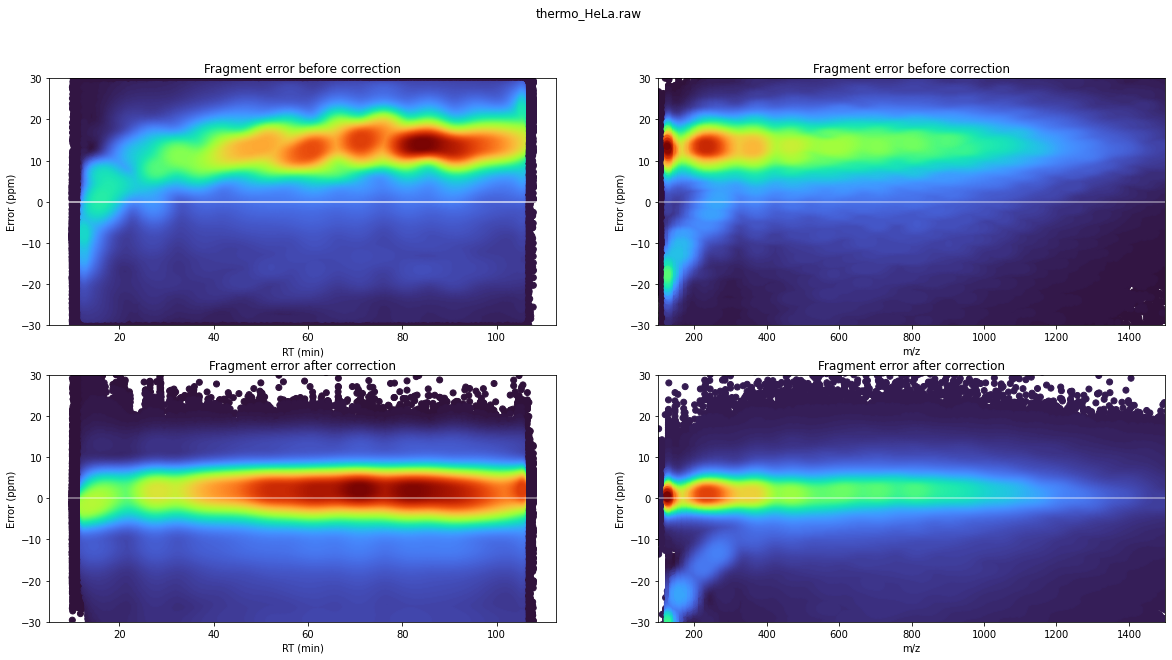

In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn
    
try:
    import seaborn
except ImportError:
    !pip install seaborn

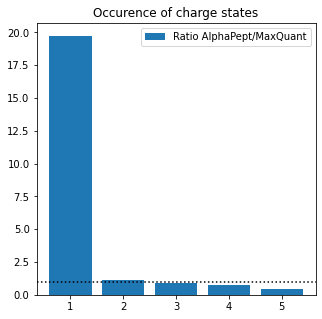

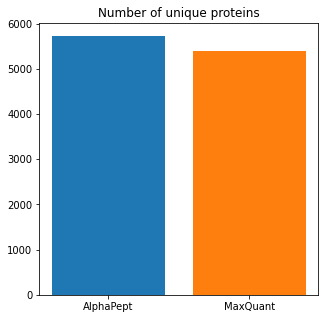

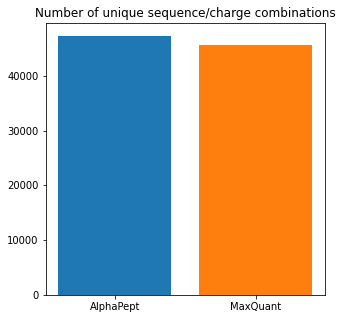

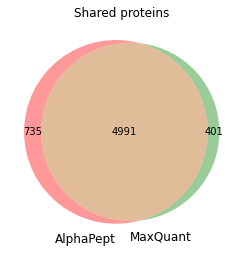

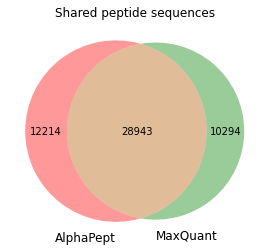

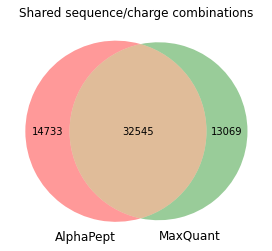

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: P

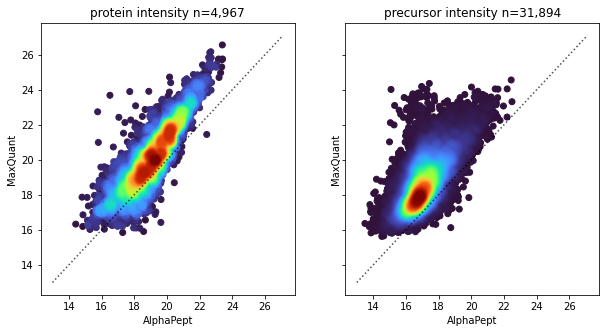

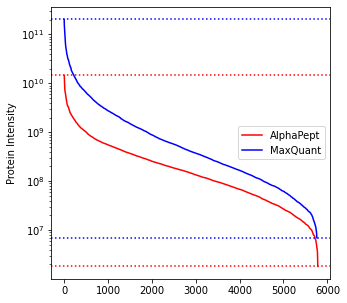

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os


df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2022-05-08 23:27:40> 54,180 target (5,418 decoy) of 120853 PSMs. fdr 0.100000 for a cutoff of 24.06 (set fdr was 0.1)
2022-05-08 23:27:40> Training & cross-validation on 11713 targets and 11712 decoys


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-08 23:27:57> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-05-08 23:27:57> The train accuracy was 0.9631163287086446
2022-05-08 23:27:57> Testing on 46850 targets and 46851 decoys
2022-05-08 23:27:58> The test accuracy was 0.9327008249645148
2022-05-08 23:27:58> Top features {'x_tandem': 0.26216603357696355, 'hits': 0.18478668355397393, 'hits_y': 0.17169546349994605, 'fragments_matched_n_ratio': 0.07947812551167419, 'n_fragments_matched': 0.05224492475062112, 'fragments_matched_int_ratio': 0.04978903886378018, 'n_missed': 0.0336349132889537, 'fragments_matched_int_sum': 0.016083678084136677, 'prec_offset': 0.010619199998233074, 'hits_y-NH3': 0.010256583720312469, 'delta_m_ppm_abs': 0.009808348699742248, 'hits_b': 0.009258441716882077, 'hits_b-H2O': 0.00801456145846717, 'hits_y-H2O': 0.007804246608028932, 'prec_offset_ppm': 0.007437949685155193, 'mz': 0.007257841188371949, 'mass_db': 0.007030522912894053, 'ma

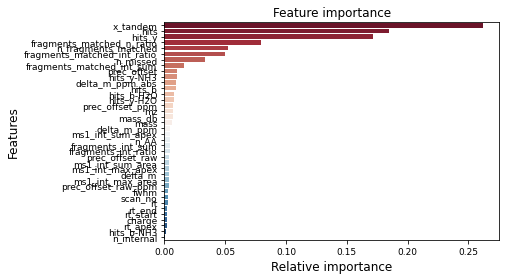

2022-05-08 23:27:58> Filter df with x_tandem score


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-08 23:28:04> Global FDR on precursor
2022-05-08 23:28:05> 48,047 target (480 decoy) of 119445 PSMs. fdr 0.009990 for a cutoff of 0.87 (set fdr was 0.01)


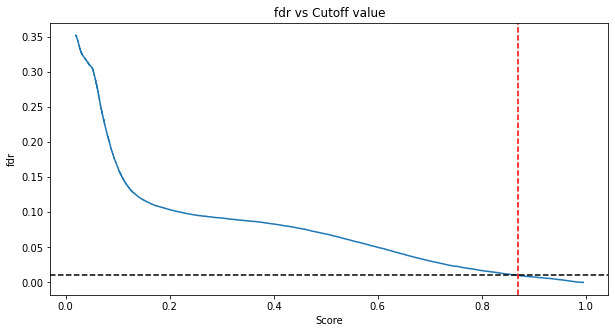

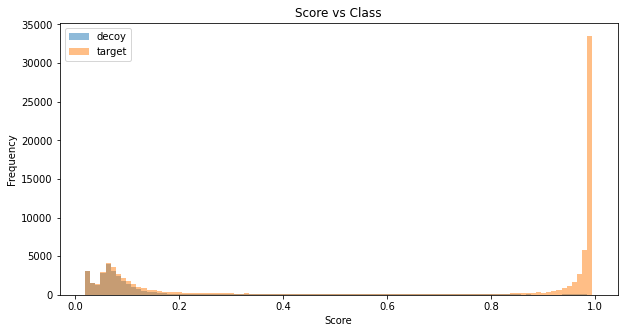

2022-05-08 23:28:05> Global FDR cutoff at 0.8704464666000697.
--- x! ---
2022-05-08 23:28:06> Filter df with x_tandem score
2022-05-08 23:28:06> Global FDR on precursor
2022-05-08 23:28:06> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2022-05-08 23:28:06> 48,047 target (480 decoy) of 48527 PSMs. fdr 0.009990 for a cutoff of 24.07 (set fdr was 0.01)


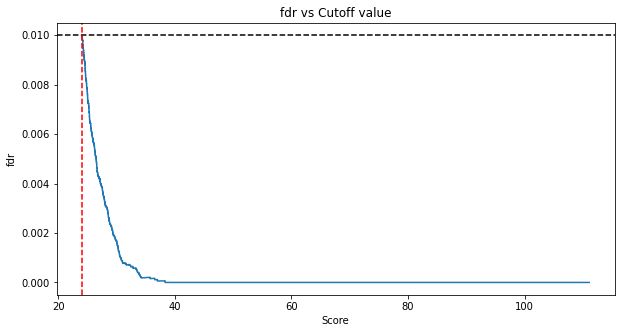

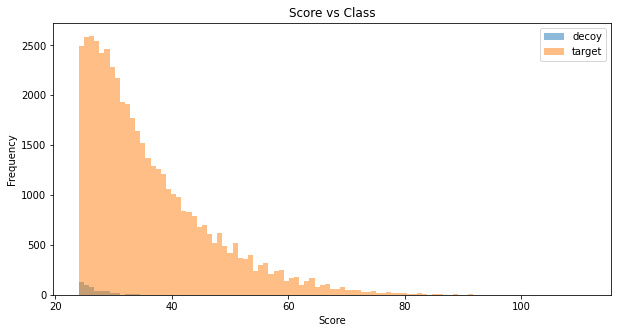

2022-05-08 23:28:06> Global FDR cutoff at 24.07212284148433.


In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

## Fractions

### Running a single fraction
In this section, we want to explicitly check, if fractionated samples are correctly handled in terms of FDR and Quantification. For this, we initially check how much we find in a single fractionated sample, as compared to Maxquant.


2022-05-08 23:28:08> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-08 23:28:08> No settings provided. Creating from default settings.
2022-05-08 23:28:08> Couldn't find compiled exe. Using Python version for testing.
2022-05-08 23:28:08> Logging to C:\Users\admin\alphapept\logs\log_20220508232808.txt.
2022-05-08 23:28:08> Platform information:
2022-05-08 23:28:08> system     - Windows
2022-05-08 23:28:08> release    - 10
2022-05-08 23:28:08> version    - 10.0.19044
2022-05-08 23:28:08> machine    - AMD64
2022-05-08 23:28:08> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-08 23:28:08> cpu count  - 24
2022-05-08 23:28:08> ram memory - 83.2/127.7 Gb (available/total)
2022-05-08 23:28:08> 
2022-05-08 23:28:08> Python information:
2022-05-08 23:28:08> SQLAlchemy                    - 1.4.35
2022-05-08 23:28:08> alphapept                     - 0.4.6
2022-05-08 23:28:08> biopython                     - 1.79
2022-05-08 23:28:08> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:28:09> FASTA contains 20,611 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:45<00:00, 26.95s/it]

2022-05-08 23:30:04> Digested 20,611 proteins and generated 5,076,854 spectra
2022-05-08 23:30:51> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:42<00:00, 162.63s/it]


2022-05-08 23:30:59> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:30:59> Processing 1 files for step raw_conversion
2022-05-08 23:30:59> File F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1 has extension .raw - converting from Thermo.
2022-05-08 23:31:40> File conversion complete. Extracted 70,210 precursors.
2022-05-08 23:31:41> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.


  0%|                                                                                            | 0/1 [00:41<?, ?it/s]

2022-05-08 23:31:41> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:31:41> Processing 1 files for step find_features
2022-05-08 23:31:41> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf. Adding to feature finding list.
2022-05-08 23:31:41> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw
2022-05-08 23:31:41> Hill extraction with centroid_tol 8 and max_gap 2
2022-05-08 23:31:44> Number of hills 947,041, len = 14.39
2022-05-08 23:31:44> Repeating hill extraction with centroid_tol 6.61
2022-05-08 23:31:48> Number of hills 1,025,262, len = 14.14
2022-05-08 23:31:48> After duplicate removal of hills 848,010
2022-05-08 23:31:53> After split hill_ptrs 938,711
2022-05-08 23:31:53> After filter hill_ptrs 931,542
2022-05-08 23:33:43> Extracting hill stats complete
2022-05-08 23:33:51> Found 147,553 pre isotope patterns.
2022-05-08 23:34:30> Extracted 159,415 isotope patterns.
2022-05-08 23:34:32> Report complete.
2022-05-08 23:3

  0%|                                                                                            | 0/1 [02:53<?, ?it/s]

2022-05-08 23:34:34> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:34:34> Starting first search.
2022-05-08 23:34:34> Processing 1 files for step search_db
2022-05-08 23:34:34> Calibrating fragments
2022-05-08 23:34:40> Performing search on 139,086 query and 5,076,854 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-05-08 23:34:43> Found 39,149 psms.
2022-05-08 23:34:43> Extracting columns for scoring.
2022-05-08 23:34:51> Extracted columns from 39,149 spectra.
2022-05-08 23:34:51> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-05-08 23:34:52> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-05-08 23:35:08> First search complete.


  0%|                                                                                            | 0/1 [00:34<?, ?it/s]


2022-05-08 23:35:09> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:35:09> Processing 1 files for step calibrate_hdf
2022-05-08 23:35:09> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-05-08 23:35:09> Scoring using X-Tandem
2022-05-08 23:35:09> 16,218 target (162 decoy) of 24079 PSMs. fdr 0.009989 for a cutoff of 20.91 (set fdr was 0.01)
2022-05-08 23:35:09> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-05-08 23:35:10> Precursor calibration std 0.98, 0.35
2022-05-08 23:35:10> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf complete.
2022-05-08 23:35:10> Starting fragment calibration.
2022-05-08 23:35:10> Calibrating fragments with neighbors
2022-05-08 23:35:10> Scoring using X-Tandem
2022-05-08 23:35:10> 16,218 target (162 decoy) of 24079 PSMs. fdr 0.009989 for a cutoff of 20.91 (set fdr was 0.01)
2022-05-08 23:35:11> Minimum hits for fragments be

  0%|                                                                                            | 0/1 [00:44<?, ?it/s]

2022-05-08 23:35:53> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:35:53> Starting second search with DB.
2022-05-08 23:35:53> Processing 1 files for step search_db
2022-05-08 23:35:53> Found calibrated prec_tol with value 4.91
2022-05-08 23:35:53> Found calibrated frag_tol with value 43.71
2022-05-08 23:35:54> Performing search on 139,086 query and 5,076,854 db entries with frag_tol = 43.71 and prec_tol = 4.91.
2022-05-08 23:35:54> Found 39,105 psms.
2022-05-08 23:35:54> Extracting columns for scoring.
2022-05-08 23:36:03> Extracted columns from 39,105 spectra.
2022-05-08 23:36:03> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-05-08 23:36:03> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-05-08 23:36:18> Second search complete.


  0%|                                                                                            | 0/1 [00:25<?, ?it/s]


2022-05-08 23:36:19> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:36:19> Processing 1 files for step score_hdf
2022-05-08 23:36:19> Calling score_hdf
2022-05-08 23:36:19> Found second search psms for scoring.
2022-05-08 23:36:20> Last q_value 0.025 of dataset is smaller than fdr_level 0.100
2022-05-08 23:36:20> 24,793 target (629 decoy) of 25422 PSMs. fdr 0.025370 for a cutoff of 16.44 (set fdr was 0.1)
2022-05-08 23:36:20> The total number of available decoys is lower than the initial set of high scoring targets.
2022-05-08 23:36:20> Training & cross-validation on 755 targets and 754 decoys


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-08 23:36:23> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 150}
2022-05-08 23:36:23> The train accuracy was 1.0
2022-05-08 23:36:23> Testing on 3019 targets and 3020 decoys
2022-05-08 23:36:23> The test accuracy was 0.9319423745653254
2022-05-08 23:36:24> Top features {'hits_y': 0.22491031486643817, 'hits': 0.12735325032919628, 'x_tandem': 0.08397784107116546, 'fragments_int_sum': 0.08354409524469875, 'fragments_matched_int_ratio': 0.055608365572627966, 'fragments_int_ratio': 0.03237767032479216, 'n_missed': 0.03138276102954618, 'ms1_int_max_apex': 0.02776578579550773, 'hits_b': 0.026306453836584916, 'ms1_int_sum_apex': 0.024945976885276305, 'fragments_matched_int_sum': 0.024560547196873502, 'ms1_int_max_area': 0.022905060646139064, 'fragments_matched_n_ratio': 0.016671709682704733, 'ms1_int_sum_area': 0.01519660604854104, 'delta_m_ppm_abs': 0.014122422174374278, 'prec_offset': 0.013649084167443551, 'fwhm': 0.01298034

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-08 23:36:24> 31,430 target (314 decoy) of 32616 PSMs. fdr 0.009990 for a cutoff of 0.13 (set fdr was 0.01)
2022-05-08 23:36:24> Saving identifications to ms_data file.
2022-05-08 23:36:24> Saving identifications to ms_data file complete.
2022-05-08 23:36:25> Saving identifications to csv file complete.
2022-05-08 23:36:25> Filter df with custom score
2022-05-08 23:36:26> Global FDR on precursor
2022-05-08 23:36:26> 24,288 target (242 decoy) of 25426 PSMs. fdr 0.009964 for a cutoff of 0.17 (set fdr was 0.01)
2022-05-08 23:36:26> Global FDR cutoff at 0.17.
2022-05-08 23:36:26> FDR on peptides complete. For 0.01 FDR found 25,260 targets and 251 decoys.
2022-05-08 23:36:26> Extracting fragment_ions
2022-05-08 23:36:32> Extracting fragment_ions complete.
2022-05-08 23:36:32> Exporting peptide_fdr on F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-05-08 23:36:32> Scoring of files F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_

  0%|                                                                                            | 0/1 [00:13<?, ?it/s]

2022-05-08 23:36:32> ==== isobaric_labeling ====
2022-05-08 23:36:32> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:36:32> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-05-08 23:36:32> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-08 23:36:32> A total of 20,541 unique and 1,617 shared peptides.
2022-05-08 23:36:33> A total of 462 ambigious proteins
2022-05-08 23:36:33> A total of 241 unique and 10 shared peptides.
2022-05-08 23:36:33> A total of 10 ambigious proteins
2022-05-08 23:36:34> Global FDR on protein_group
2022-05-08 23:36:34> 3,343 target (33 decoy) of 3845 PSMs. fdr 0.009871 for a cutoff of 0.61 (set fdr was 0.01)
2022-05-08 23:36:34> Global FDR cutoff at 0.61.
2022-05-08 23:36:34> FDR on proteins complete. For 0.01 FDR found 24,998 targets and 35 decoys. A total of 3,383 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-08 23:36:34> Saving complete.
2022-05-08 23:36:34> Protein groups complete.
2022-05-08 23:36:34> ==== quantification ====
2022-05-08 23:36:34> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:01<?, ?it/s]

2022-05-08 23:36:34> Saving protein_groups after delayed normalization to combined_protein_fdr_dn



C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-08 23:36:34> Complete.
2022-05-08 23:36:34> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:36:34> LFQ complete.
2022-05-08 23:36:34> Extracting protein_summary
2022-05-08 23:36:34> Saved protein_summary of length 3,383 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-08 23:36:34> Updating protein_fdr.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-08 23:36:34> Exporting as csv.
2022-05-08 23:36:35> Saved df of length 25,033 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-08 23:36:35> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.49s/it]


2022-05-08 23:36:36> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-08 23:36:36> Analysis complete.


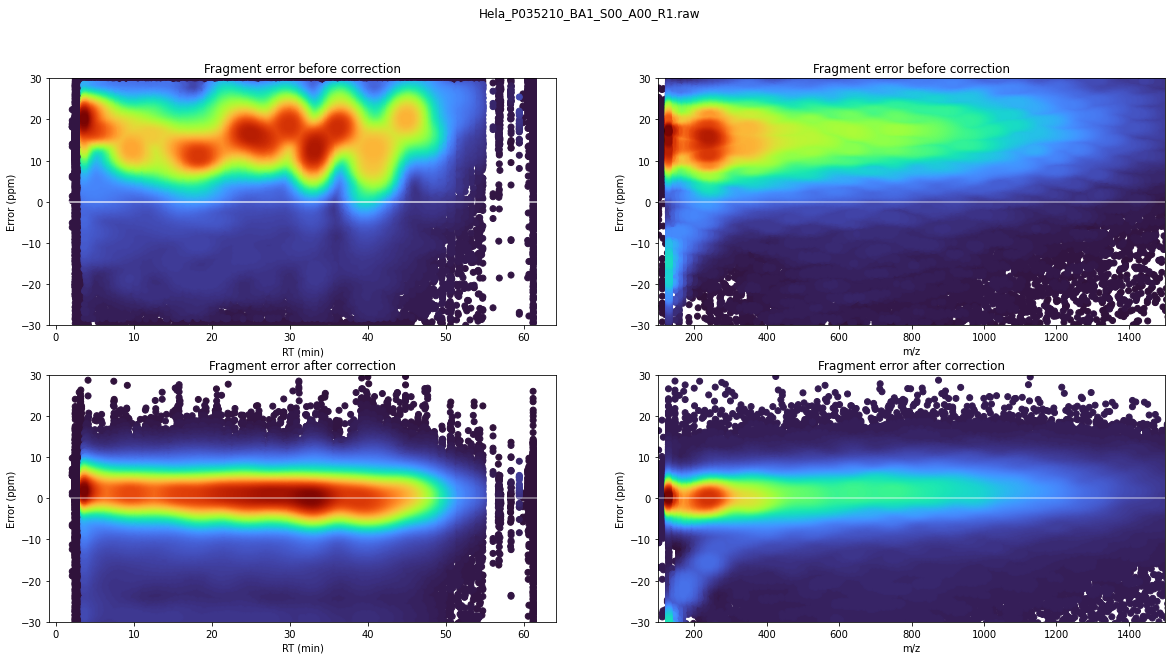

In [7]:
%run -i ../test_ci.py $tmp_folder thermo_singlefrac

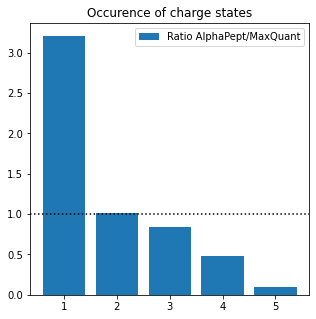

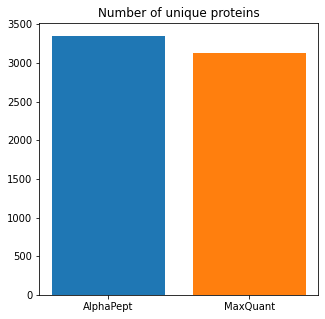

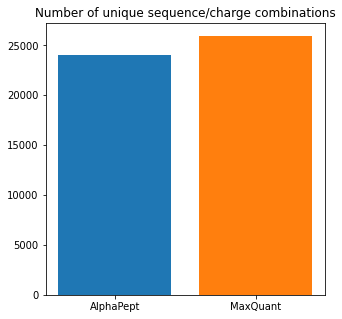

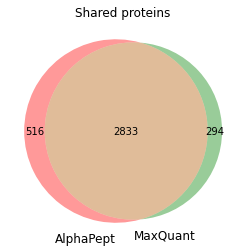

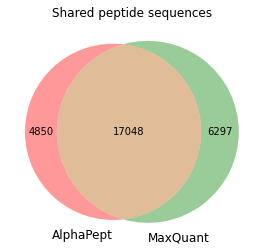

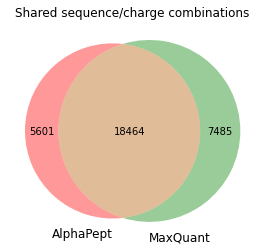

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: P

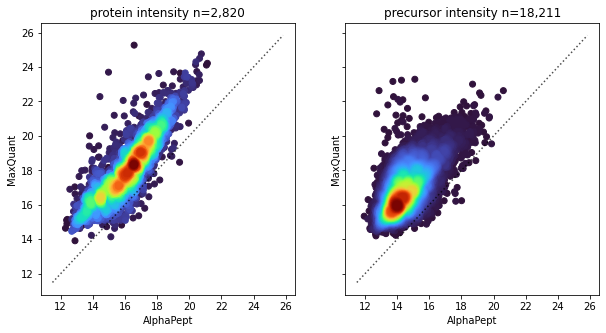

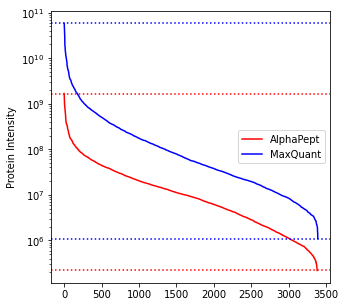

In [8]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd_singlerun.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions


In [9]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-05-08 23:36:53> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-08 23:36:56> No settings provided. Creating from default settings.
2022-05-08 23:36:56> Couldn't find compiled exe. Using Python version for testing.
2022-05-08 23:36:56> Logging to C:\Users\admin\alphapept\logs\log_20220508233656.txt.
2022-05-08 23:36:56> Platform information:
2022-05-08 23:36:56> system     - Windows
2022-05-08 23:36:56> release    - 10
2022-05-08 23:36:56> version    - 10.0.19044
2022-05-08 23:36:56> machine    - AMD64
2022-05-08 23:36:56> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-08 23:36:56> cpu count  - 24
2022-05-08 23:36:56> ram memory - 81.4/127.7 Gb (available/total)
2022-05-08 23:36:56> 
2022-05-08 23:36:56> Python information:
2022-05-08 23:36:56> SQLAlchemy                    - 1.4.35
2022-05-08 23:36:56> alphapept                     - 0.4.6
2022-05-08 23:36:56> biopython                     - 1.79
2022-05-08 23:36:56> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:36:57> FASTA contains 20,611 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:47<00:00, 25.09s/it]

2022-05-08 23:38:54> Digested 20,611 proteins and generated 5,076,854 spectra
2022-05-08 23:39:41> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:44<00:00, 164.48s/it]


2022-05-08 23:39:49> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:39:49> Processing 4 files for step raw_conversion
2022-05-08 23:39:49> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-08 23:40:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:54<02:43, 218.52s/it]

2022-05-08 23:40:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-05-08 23:40:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-05-08 23:40:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:54<00:00, 54.93s/it]

2022-05-08 23:40:43> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:40:43> Processing 4 files for step find_features
2022-05-08 23:40:43> Setting Process limit to 10
2022-05-08 23:40:43> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-08 23:45:36> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %


 25%|███████████████████▊                                                           | 0.25/1 [04:52<14:37, 1170.54s/it]

2022-05-08 23:45:36> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %
2022-05-08 23:45:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:58<01:18, 312.39s/it]

2022-05-08 23:45:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:59<00:00, 299.29s/it]

2022-05-08 23:45:43> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:45:43> Starting first search.
2022-05-08 23:45:43> Processing 4 files for step search_db
2022-05-08 23:45:43> Searching. Setting Process limit to 10.
2022-05-08 23:45:43> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-08 23:46:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:44<02:13, 177.94s/it]

2022-05-08 23:46:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-08 23:46:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:44<00:11, 46.28s/it]

2022-05-08 23:46:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-08 23:46:44> First search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:00<00:00, 60.80s/it]

2022-05-08 23:46:44> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:46:44> Processing 4 files for step calibrate_hdf
2022-05-08 23:46:44> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-08 23:47:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:58<02:56, 234.91s/it]

2022-05-08 23:47:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-05-08 23:47:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [01:02<00:16, 67.03s/it]

2022-05-08 23:47:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:02<00:00, 62.98s/it]

2022-05-08 23:47:47> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:47:47> Starting second search with DB.
2022-05-08 23:47:47> Processing 4 files for step search_db
2022-05-08 23:47:47> Searching. Setting Process limit to 10.
2022-05-08 23:47:47> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-08 23:48:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:29<01:27, 116.35s/it]

2022-05-08 23:48:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-08 23:48:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %
2022-05-08 23:48:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-08 23:48:31> Second search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:43<00:00, 43.95s/it]

2022-05-08 23:48:31> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:48:31> Processing 4 files for step score_hdf
2022-05-08 23:48:31> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-08 23:49:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:33<01:39, 132.90s/it]

2022-05-08 23:49:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step score_hdf succeeded. 50.00 %
2022-05-08 23:49:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step score_hdf succeeded. 75.00 %
2022-05-08 23:49:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step score_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:33<00:00, 33.69s/it]

2022-05-08 23:49:05> ==== isobaric_labeling ====
2022-05-08 23:49:05> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:49:05> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-05-08 23:49:05> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-08 23:49:06> A total of 29,254 unique and 2,254 shared peptides.
2022-05-08 23:49:07> A total of 562 ambigious proteins
2022-05-08 23:49:07> A total of 791 unique and 23 shared peptides.
2022-05-08 23:49:07> A total of 22 ambigious proteins
2022-05-08 23:49:07> Global FDR on protein_group
2022-05-08 23:49:07> 3,737 target (37 decoy) of 5238 PSMs. fdr 0.009901 for a cutoff of 0.74 (set fdr was 0.01)


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-08 23:49:07> Global FDR cutoff at 0.74.
2022-05-08 23:49:08> FDR on proteins complete. For 0.01 FDR found 99,435 targets and 72 decoys. A total of 3,781 proteins found.
2022-05-08 23:49:08> Saving complete.
2022-05-08 23:49:08> Protein groups complete.
2022-05-08 23:49:08> ==== quantification ====
2022-05-08 23:49:08> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:02<?, ?it/s]


2022-05-08 23:49:08> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-08 23:49:08> Complete.
2022-05-08 23:49:08> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:49:08> LFQ complete.
2022-05-08 23:49:09> Extracting protein_summary
2022-05-08 23:49:09> Saved protein_summary of length 3,781 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-08 23:49:09> Updating protein_fdr.
2022-05-08 23:49:09> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-08 23:49:13> Saved df of length 99,507 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-08 23:49:13> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.93s/it]


2022-05-08 23:49:16> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-08 23:49:16> Analysis complete.


F:\projects\alphapept\sandbox\test_helper.py:51: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path2, sep='\t')


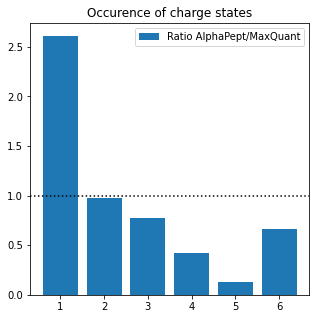

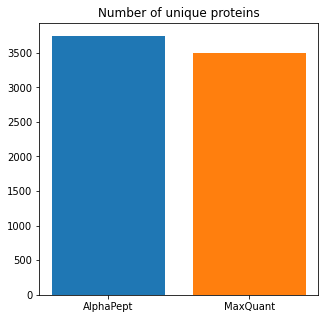

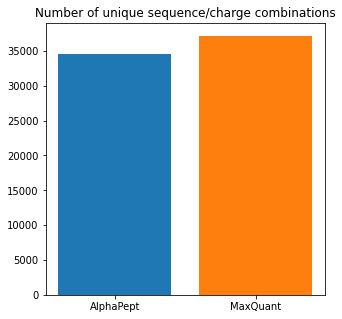

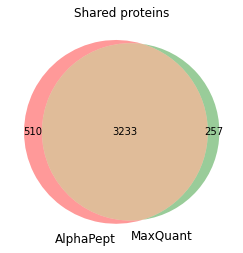

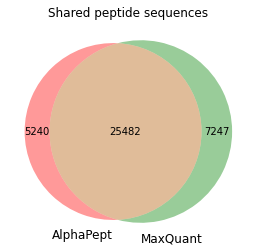

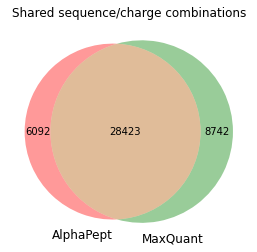

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: P

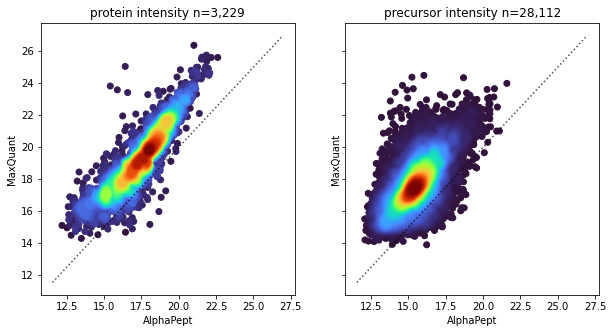

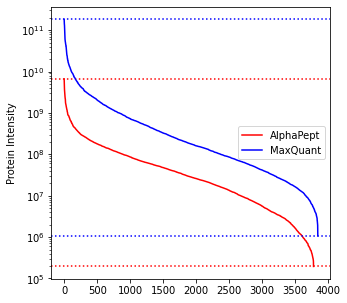

In [10]:

#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions

In [11]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-05-08 23:49:22> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-08 23:49:23> No settings provided. Creating from default settings.
2022-05-08 23:49:23> Couldn't find compiled exe. Using Python version for testing.
2022-05-08 23:49:23> Logging to C:\Users\admin\alphapept\logs\log_20220508234923.txt.
2022-05-08 23:49:23> Platform information:
2022-05-08 23:49:23> system     - Windows
2022-05-08 23:49:23> release    - 10
2022-05-08 23:49:23> version    - 10.0.19044
2022-05-08 23:49:23> machine    - AMD64
2022-05-08 23:49:23> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-08 23:49:23> cpu count  - 24
2022-05-08 23:49:23> ram memory - 82.5/127.7 Gb (available/total)
2022-05-08 23:49:23> 
2022-05-08 23:49:24> Python information:
2022-05-08 23:49:24> SQLAlchemy                    - 1.4.35
2022-05-08 23:49:24> alphapept                     - 0.4.6
2022-05-08 23:49:24> biopython                     - 1.79
2022-05-08 23:49:24> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:49:24> FASTA contains 20,611 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:43<00:00, 25.55s/it]

2022-05-08 23:51:16> Digested 20,611 proteins and generated 5,076,854 spectra
2022-05-08 23:52:04> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:40<00:00, 160.13s/it]


2022-05-08 23:52:11> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:52:11> Processing 4 files for step raw_conversion
2022-05-08 23:52:11> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-08 23:53:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:53<02:41, 214.98s/it]

2022-05-08 23:53:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-05-08 23:53:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:54<00:14, 56.22s/it]

2022-05-08 23:53:06> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:54<00:00, 54.52s/it]

2022-05-08 23:53:06> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:53:06> Processing 4 files for step find_features
2022-05-08 23:53:06> Setting Process limit to 10
2022-05-08 23:53:06> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-08 23:57:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %


 25%|███████████████████▊                                                           | 0.25/1 [04:41<14:03, 1124.16s/it]

2022-05-08 23:57:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [04:41<03:52, 464.63s/it]

2022-05-08 23:57:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:46<01:05, 261.30s/it]

2022-05-08 23:57:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:52<00:00, 292.34s/it]

2022-05-08 23:57:58> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:57:58> Starting first search.
2022-05-08 23:57:58> Processing 4 files for step search_db
2022-05-08 23:57:58> Searching. Setting Process limit to 10.
2022-05-08 23:57:58> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-08 23:58:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:43<02:09, 172.72s/it]

2022-05-08 23:58:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-08 23:58:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:43<00:11, 45.20s/it]

2022-05-08 23:58:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-08 23:58:56> First search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:58<00:00, 58.20s/it]

2022-05-08 23:58:56> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:58:56> Processing 4 files for step calibrate_hdf
2022-05-08 23:58:56> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-08 23:59:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:59<02:58, 238.32s/it]

2022-05-08 23:59:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-05-08 23:59:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [01:02<00:16, 65.38s/it]

2022-05-08 23:59:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:02<00:00, 62.12s/it]

2022-05-08 23:59:59> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-08 23:59:59> Starting second search with DB.
2022-05-08 23:59:59> Processing 4 files for step search_db
2022-05-08 23:59:59> Searching. Setting Process limit to 10.
2022-05-08 23:59:59> AlphaPool was set to 10 processes. Setting max to 10.
2022-05-09 00:00:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:28<01:26, 115.30s/it]

2022-05-09 00:00:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-09 00:00:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %
2022-05-09 00:00:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-09 00:00:43> Second search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:44<00:00, 44.04s/it]


2022-05-09 00:00:43> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:00:43> Processing 4 files for step score_hdf
2022-05-09 00:00:43> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 00:01:17> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:33<01:39, 133.17s/it]

2022-05-09 00:01:17> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step score_hdf succeeded. 50.00 %
2022-05-09 00:01:17> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step score_hdf succeeded. 75.00 %
2022-05-09 00:01:17> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step score_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:33<00:00, 33.39s/it]

2022-05-09 00:01:17> ==== isobaric_labeling ====
2022-05-09 00:01:17> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:01:17> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-05-09 00:01:17> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 00:01:17> A total of 29,254 unique and 2,254 shared peptides.
2022-05-09 00:01:19> A total of 562 ambigious proteins
2022-05-09 00:01:19> A total of 791 unique and 23 shared peptides.
2022-05-09 00:01:19> A total of 22 ambigious proteins
2022-05-09 00:01:19> Global FDR on protein_group


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 00:01:19> 3,737 target (37 decoy) of 5238 PSMs. fdr 0.009901 for a cutoff of 0.74 (set fdr was 0.01)
2022-05-09 00:01:19> Global FDR cutoff at 0.74.
2022-05-09 00:01:19> FDR on proteins complete. For 0.01 FDR found 99,435 targets and 72 decoys. A total of 3,781 proteins found.
2022-05-09 00:01:20> Saving complete.
2022-05-09 00:01:20> Protein groups complete.
2022-05-09 00:01:20> ==== quantification ====
2022-05-09 00:01:20> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:02<?, ?it/s]


2022-05-09 00:01:20> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 00:01:20> Complete.
2022-05-09 00:01:20> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:01:20> LFQ complete.
2022-05-09 00:01:20> Extracting protein_summary
2022-05-09 00:01:20> Saved protein_summary of length 3,781 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 00:01:20> Updating protein_fdr.
2022-05-09 00:01:20> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 00:01:25> Saved df of length 99,507 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 00:01:25> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.86s/it]


2022-05-09 00:01:27> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 00:01:27> Analysis complete.


F:\projects\alphapept\sandbox\test_helper.py:51: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path2, sep='\t')


charge   db_idx  decoy  decoys_cum   delta_m  delta_m_ppm  \
index                                                               
4          1.0     1195  False         150  0.000691     2.832328   
361        2.0    33797  False          37  0.000133     0.515554   
362        2.0    33797  False           9  0.000003     0.012476   
363        2.0    33797  False           1  0.000400     1.538420   
364        2.0    33797  False          16  0.000362     1.366548   
...        ...      ...    ...         ...       ...          ...   
101272     3.0  4156907  False           1 -0.002184    -5.148456   
101283     3.0  4272751  False           7 -0.004514    -7.539056   
101288     3.0  4313596  False           1 -0.005142    -8.430107   
101289     4.0  4315371  False           1 -0.008625   -14.527418   
101345     3.0  4698723  False          16 -0.011860   -26.725849   

        delta_m_ppm_abs       fdr  feature_idx  fragment_ion_idx  ...  \
index                                                             ...   
4              2.832328  0.006268       112952               173  ...   
361            0.515554  0.001660        32364              4390  ...   
362            0.012476  0.000419        25019              4055  ...   
363            1.538420  0.000061        32290              4372  ...   
364            1.366548  0.000751        32052              4364  ...   
...                 ...       ...          ...               ...  ...   
101272         5.148456  0.000202        51207            552834  ...   
101283         7.539056  0.000371        11362            556827  ...   
101288         8.430107  0.000770        30428            558090  ...   
101289        14.527418  0.001043        36365            558114  ...   
101345        26.725849  0.000757        53541            567408  ...   

       decoy_protein n_possible_proteins  index_protein_group  \
index                                                           
4              False                   1                 1752   
361            False                   1                 1752   
362            False                   1                 1752   
363            False                   1                 1752   
364            False                   1                 1752   
...              ...                 ...                  ...   
101272         False                   1                 1589   
101283         False                   1                 4570   
101288         False                   1                 1732   
101289         False                   1                 2644   
101345         False                   1                 1283   

        score_protein_group  target_protein_group  target_cum_protein_group  \
index                                                                         
4                      1.00                  True                       636   
361                    1.00                  True                       636   
362                    1.00                  True                       636   
363                    1.00                  True                       636   
364                    1.00                  True                       636   
...                     ...                   ...                       ...   
101272                 1.00                  True                       527   
101283                 0.87                  True                      3566   
101288                 1.00                  True                       623   
101289                 1.00                  True                      1285   
101345                 0.75                  True                      3729   

        decoys_cum_protein_group  fdr_protein_group  q_value_protein_group  \
index                                                                        
4                              1           0.001572               0.000363   
361                            1           0.001572 

Sequence  Length Modifications  \
0       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
1       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
2       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
3       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
4                         AAAAAAALQAK      11    Unmodified   
...                               ...     ...           ...   
109111                   YYVTIIDAPGHR      12    Unmodified   
109112                   YYVTIIDAPGHR      12    Unmodified   
109113                   YYVTIIDAPGHR      12    Unmodified   
109114                   YYVTIIDAPGHR      12    Unmodified   
109115                   YYVTIIDAPGHR      12    Unmodified   

                      Modified sequence Oxidation (M) Probabilities  \
0       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
1       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
2       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
3       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
4                         _AAAAAAALQAK_                         NaN   
...                                 ...                         ...   
109111                   _YYVTIIDAPGHR_                         NaN   
109112                   _YYVTIIDAPGHR_                         NaN   
109113                   _YYVTIIDAPGHR_                         NaN   
109114                   _YYVTIIDAPGHR_                         NaN   
109115                   _YYVTIIDAPGHR_                         NaN   

       Oxidation (M) Score Diffs  Acetyl (Protein N-term)  Oxidation (M)  \
0                            NaN                        0              0   
1                            NaN                        0              0   
2                            NaN                        0              0   
3                            NaN                        0              0   
4                            NaN                        0              0   
...                          ...                      ...            ...   
109111                       NaN                        0              0   
109112                       NaN                        0              0   
109113                       NaN                        0              0   
109114                       NaN                        0              0   
109115                       NaN                        0              0   

        Missed cleavages                                     Proteins  ...  \
0                      0                        sp|P37108|SRP14_HUMAN  ...   
1                      0                        sp|P37108|SRP14_HUMAN  ...   
2                      0                        sp|P37108|SRP14_HUMAN  ...   
3                      0                        sp|P37108|SRP14_HUMAN  ...   
4                      0                          sp|P36578|RL4_HUMAN  ...   
...                  ...                                          ...  ...   
109111                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109112                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109113                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109114                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109115                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   

       AIF MS/MS IDs Oxidation (M) site IDs charge  \
0                NaN                    NaN      2   
1                NaN                    NaN      2   
2                NaN                    NaN      2   
3                NaN                    NaN      2   
4                NaN                    NaN      2   
...              ...                    ...    ...   
109111           NaN                    NaN      3   
109112           NaN                    NaN      2   
109113           NaN                    NaN      3   
109114           NaN         

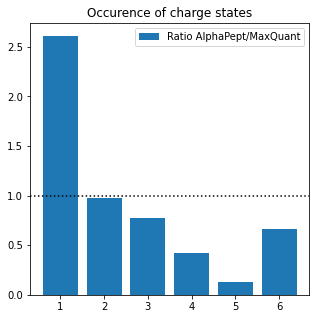

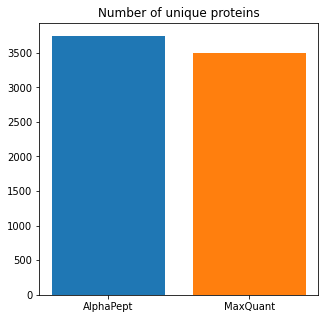

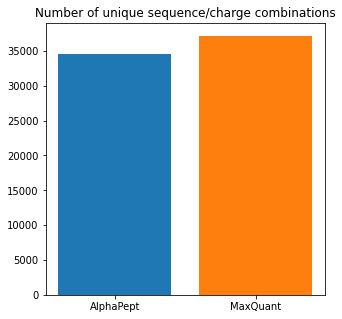

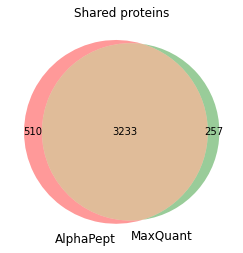

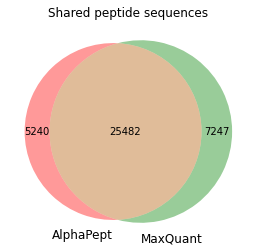

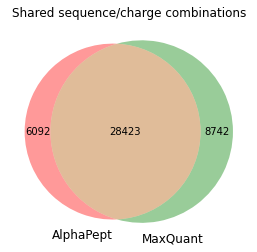

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: P

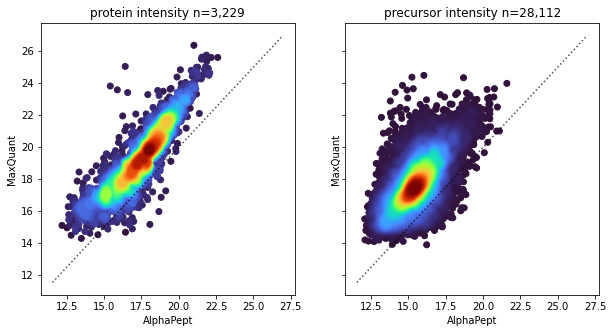

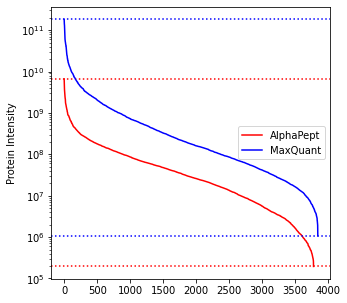

In [12]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

display(df1)
display(df2)
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [13]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2022-05-09 00:01:33> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 00:01:40> No settings provided. Creating from default settings.
2022-05-09 00:01:40> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 00:01:40> Logging to C:\Users\admin\alphapept\logs\log_20220509000140.txt.
2022-05-09 00:01:40> Platform information:
2022-05-09 00:01:40> system     - Windows
2022-05-09 00:01:40> release    - 10
2022-05-09 00:01:40> version    - 10.0.19044
2022-05-09 00:01:40> machine    - AMD64
2022-05-09 00:01:40> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 00:01:40> cpu count  - 24
2022-05-09 00:01:40> ram memory - 88.2/127.7 Gb (available/total)
2022-05-09 00:01:40> 
2022-05-09 00:01:40> Python information:
2022-05-09 00:01:40> SQLAlchemy                    - 1.4.35
2022-05-09 00:01:40> alphapept                     - 0.4.6
2022-05-09 00:01:40> biopython                     - 1.79
2022-05-09 00:01:40> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:01:42> FASTA contains 43,752 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:03<00:00, 27.21s/it]

2022-05-09 00:03:58> Digested 43,752 proteins and generated 5,835,394 spectra
2022-05-09 00:04:53> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:12<00:00, 192.77s/it]


2022-05-09 00:05:03> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:05:03> Processing 6 files for step raw_conversion
2022-05-09 00:05:03> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 00:06:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:17<06:29, 467.37s/it]

2022-05-09 00:06:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2022-05-09 00:06:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2022-05-09 00:06:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:19<00:30, 90.42s/it]

2022-05-09 00:06:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2022-05-09 00:06:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:19<00:00, 79.41s/it]

2022-05-09 00:06:23> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:06:23> Processing 6 files for step find_features
2022-05-09 00:06:23> Setting Process limit to 11
2022-05-09 00:06:23> AlphaPool was set to 11 processes. Setting max to 11.
2022-05-09 00:11:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step find_features succeeded. 16.67 %


 17%|██████████▋                                                     | 0.16666666666666666/1 [05:27<27:15, 1962.37s/it]

2022-05-09 00:11:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step find_features succeeded. 33.33 %
2022-05-09 00:11:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step find_features succeeded. 50.00 %
2022-05-09 00:11:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step find_features succeeded. 66.67 %
2022-05-09 00:11:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step find_features succeeded. 83.33 %
2022-05-09 00:11:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step find_features succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:30<00:00, 330.40s/it]

2022-05-09 00:11:53> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:11:53> Starting first search.
2022-05-09 00:11:53> Processing 6 files for step search_db
2022-05-09 00:11:53> Searching. Setting Process limit to 12.
2022-05-09 00:11:53> AlphaPool was set to 12 processes. Setting max to 12.
2022-05-09 00:13:14> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:20<06:43, 484.69s/it]

2022-05-09 00:13:14> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-05-09 00:13:14> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-05-09 00:13:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:23<00:31, 95.70s/it]

2022-05-09 00:13:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-05-09 00:13:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %
2022-05-09 00:13:36> First search complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:42<00:00, 102.74s/it]

2022-05-09 00:13:36> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:13:36> Processing 6 files for step calibrate_hdf
2022-05-09 00:13:36> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 00:16:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step calibrate_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:24<12:04, 869.91s/it]

2022-05-09 00:16:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step calibrate_hdf succeeded. 33.33 %
2022-05-09 00:16:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step calibrate_hdf succeeded. 50.00 %
2022-05-09 00:16:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step calibrate_hdf succeeded. 66.67 %


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [02:26<00:55, 166.89s/it]

2022-05-09 00:16:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step calibrate_hdf succeeded. 83.33 %
2022-05-09 00:16:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step calibrate_hdf succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:26<00:00, 146.56s/it]

2022-05-09 00:16:03> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:16:03> Starting second search with DB.
2022-05-09 00:16:03> Processing 6 files for step search_db
2022-05-09 00:16:03> Searching. Setting Process limit to 12.
2022-05-09 00:16:03> AlphaPool was set to 12 processes. Setting max to 12.
2022-05-09 00:16:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [00:47<03:56, 283.53s/it]

2022-05-09 00:16:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-05-09 00:16:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-05-09 00:16:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [00:49<00:19, 57.29s/it]

2022-05-09 00:16:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-05-09 00:16:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %
2022-05-09 00:17:10> Second search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:07<00:00, 67.62s/it]

2022-05-09 00:17:11> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:17:11> Processing 6 files for step score_hdf
2022-05-09 00:17:11> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 00:19:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step score_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:14<11:10, 804.54s/it]

2022-05-09 00:19:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step score_hdf succeeded. 33.33 %
2022-05-09 00:19:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step score_hdf succeeded. 50.00 %
2022-05-09 00:19:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step score_hdf succeeded. 66.67 %


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [02:39<01:04, 193.54s/it]

2022-05-09 00:19:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step score_hdf succeeded. 83.33 %
2022-05-09 00:19:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step score_hdf succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:39<00:00, 159.67s/it]

2022-05-09 00:19:50> ==== isobaric_labeling ====
2022-05-09 00:19:50> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:19:50> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-05-09 00:19:50> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 00:19:52> A total of 57,021 unique and 11,185 shared peptides.
2022-05-09 00:19:58> A total of 1937 ambigious proteins
2022-05-09 00:19:59> A total of 1,744 unique and 197 shared peptides.
2022-05-09 00:19:59> A total of 187 ambigious proteins


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 00:19:59> Global FDR on protein_group
2022-05-09 00:19:59> 6,831 target (68 decoy) of 10773 PSMs. fdr 0.009955 for a cutoff of 0.96 (set fdr was 0.01)
2022-05-09 00:19:59> Global FDR cutoff at 0.9569294109647918.
2022-05-09 00:20:00> FDR on proteins complete. For 0.01 FDR found 248,287 targets and 201 decoys. A total of 6,899 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(


2022-05-09 00:20:01> Saving complete.
2022-05-09 00:20:01> Protein groups complete.
2022-05-09 00:20:01> ==== quantification ====
2022-05-09 00:20:01> Reading protein_fdr for quantification.


  0%|                                                                                            | 0/1 [00:10<?, ?it/s]


2022-05-09 00:20:01> Delayed Normalization.
2022-05-09 00:20:02> Setting minimum occurence to 5.0
2022-05-09 00:20:02> Delayed normalization with SLSQP on (1, 6, 21719)
2022-05-09 00:20:03> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 00:20:04> Complete.
2022-05-09 00:20:04> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:20:04> Preparing protein table for parallel processing.


 20%|█████████████                                                     | 0.19881142194520945/1 [00:05<00:19, 23.94s/it]

2022-05-09 00:20:09> Starting protein extraction for 6899 proteins.
2022-05-09 00:20:09> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9997680823307726/1 [03:08<00:00, 210.37s/it]

2022-05-09 00:23:19> LFQ complete.
2022-05-09 00:23:19> Extracting protein_summary
2022-05-09 00:23:19> Saved protein_summary of length 6,899 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 00:23:19> Updating protein_fdr.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 00:23:20> Exporting as csv.
2022-05-09 00:23:30> Saved df of length 248,488 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 00:23:30> ==== export ====


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:26<00:00, 206.61s/it]


2022-05-09 00:23:38> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 00:23:38> Analysis complete.


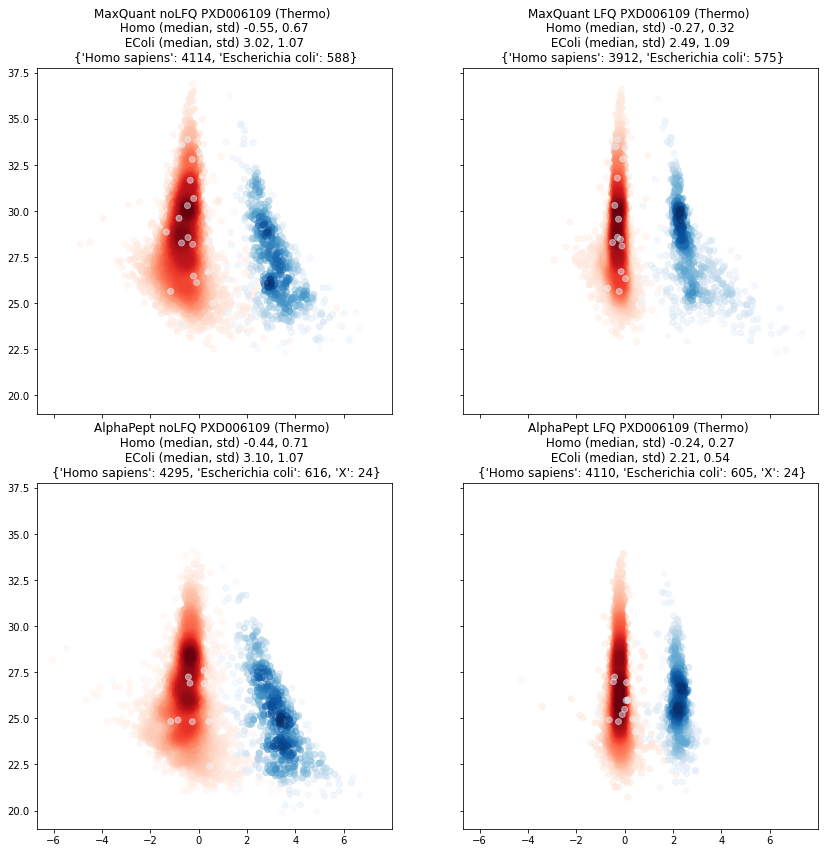

In [14]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

C:\Users\admin\AppData\Local\Temp\ipykernel_16036\1044225642.py:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp\ipykernel_16036\1044225642.py:26: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
C:\Users\admin\AppData\Local\Temp\ipykernel_16036\1044225642.py:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp\ipykernel_16036\1044225642.py:26: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis

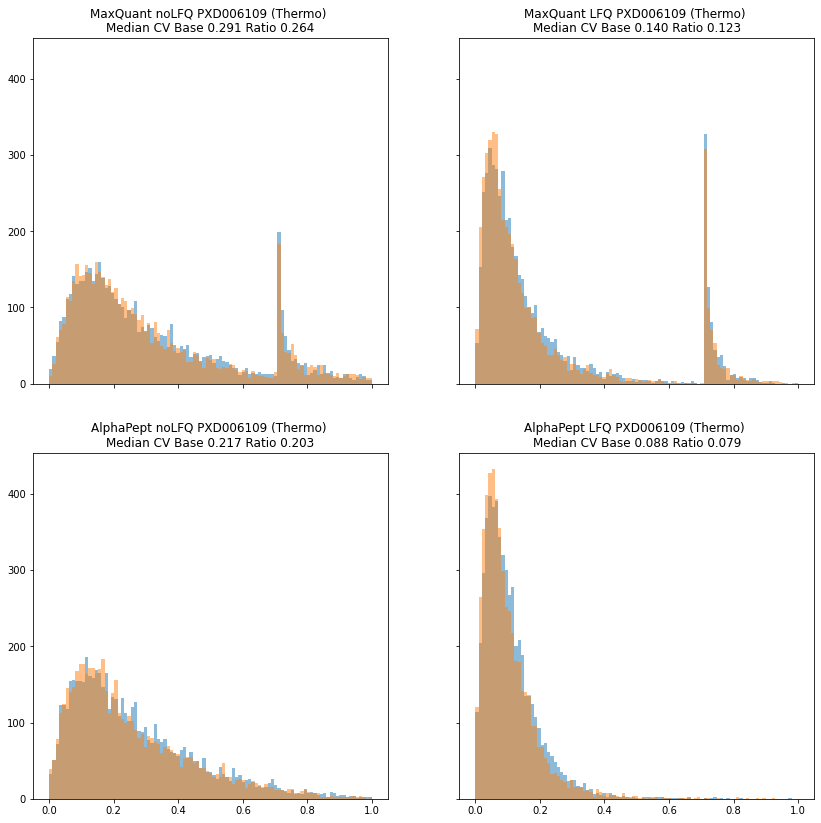

In [15]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
        
    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[0,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[0,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[0,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'

    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[1,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[1,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

    #axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [16]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

In [17]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel

In [18]:
def protein_profile_parallel_mq(evidence_path : str, protein_groups_path: str, minimum_ratios: int = 1, minimum_occurence:bool=None, delayed:bool = True, callback=None) -> pd.DataFrame:
    """Derives protein LFQ intensities from Maxquant quantified features.

    Args:
        evidence_path (str): path to the Maxquant standard output table evidence.txt.
        protein_groups_path (str): path to the Maxquant standard output table proteinGroups.txt.
        minimum_ratios (int): minimum ratios (LFQ parameter)
        minimum_occurence (int): minimum occurence (LFQ parameter)
        delayed (bool): toggle for delayed normalization (on/off)
        callback ([type], optional): [description]. Defaults to None.

    Raises:
        FileNotFoundError: if Maxquant files cannot be found.

    Returns:
        pd.DataFrame: table containing the LFQ intensities of each protein in each sample.
    """
    logging.info('Loading files')
    
    for file in [evidence_path, protein_groups_path]:
        if not os.path.isfile(file):
            raise FileNotFoundError(f'File {file} not found.')
            
    evd = pd.read_csv(evidence_path, sep='\t') 
    ref = pd.read_csv(protein_groups_path, sep='\t')
            
    experiments = evd['Experiment'].unique().tolist()
    logging.info(f'A total of {len(experiments):,} files.')
    
    
    if 'Fraction' not in evd.keys():
        logging.info('File does not contain Fractions. Setting Fractions to 1')
        evd['Fraction'] = 1

    protein_df = []
    
    max_ = len(ref)
    for i in range(max_):
        investigate = ref.iloc[i]
        evd_ids = [int(_) for _ in investigate['Evidence IDs'].split(';')]
        subset = evd.loc[evd_ids].copy()

        subset['protein_group'] =  investigate['Protein IDs']
        subset['sample_group'] = subset['Experiment']
        subset['fraction'] = subset['Fraction']
        subset['precursor']  = ['_'.join(_) for _ in zip(subset['Sequence'].values, subset['Charge'].values.astype('str'))]

        protein_df.append(subset)
        
        if callback:
            callback((i+1)/len(ref))
                     
    logging.info(f'A total of {max_:,} proteins.')

    df = pd.concat(protein_df)
    
    field = 'Intensity'
    
    if delayed:
        df, normed = delayed_normalization(df, field ='Intensity', minimum_occurence = minimum_occurence)
        field = 'Intensity_dn'
        
    protein_table = protein_profile_parallel(df, minimum_ratios=minimum_ratios, field=field, callback=callback)
                     
    return protein_table

2022-05-09 00:23:41> Loading files
2022-05-09 00:23:43> A total of 6 files.
2022-05-09 00:23:43> File does not contain Fractions. Setting Fractions to 1
2022-05-09 00:23:53> A total of 6,854 proteins.
2022-05-09 00:23:56> Setting minimum occurence to 6.0
2022-05-09 00:23:56> Delayed normalization with SLSQP on (1, 6, 14625)
2022-05-09 00:23:57> Preparing protein table for parallel processing.
2022-05-09 00:24:01> Starting protein extraction for 6854 proteins.
2022-05-09 00:24:01> AlphaPool was set to 24 processes. Setting max to 24.


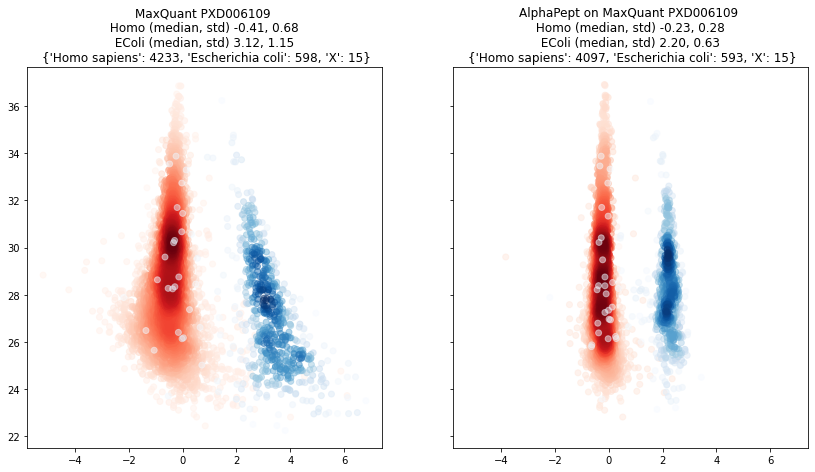

In [19]:
#from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd

evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Shotgun_02-01' in _]
    ratio_columns = [_ for _ in ds if 'Shotgun_12-01' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\panda

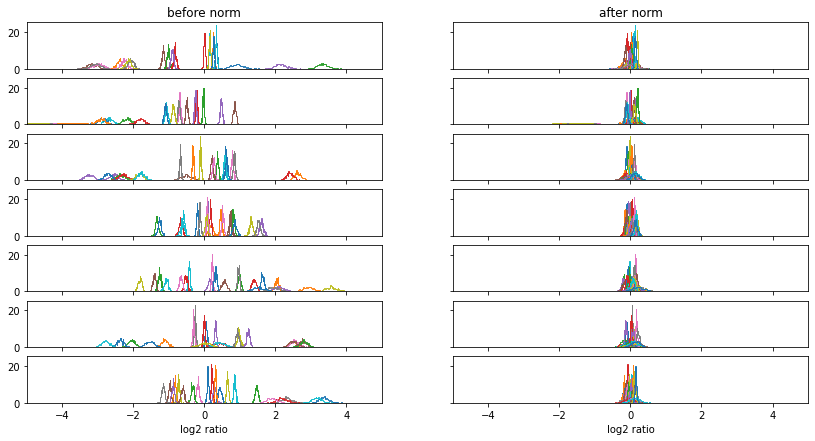

In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["sample_group"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["sample_group"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.

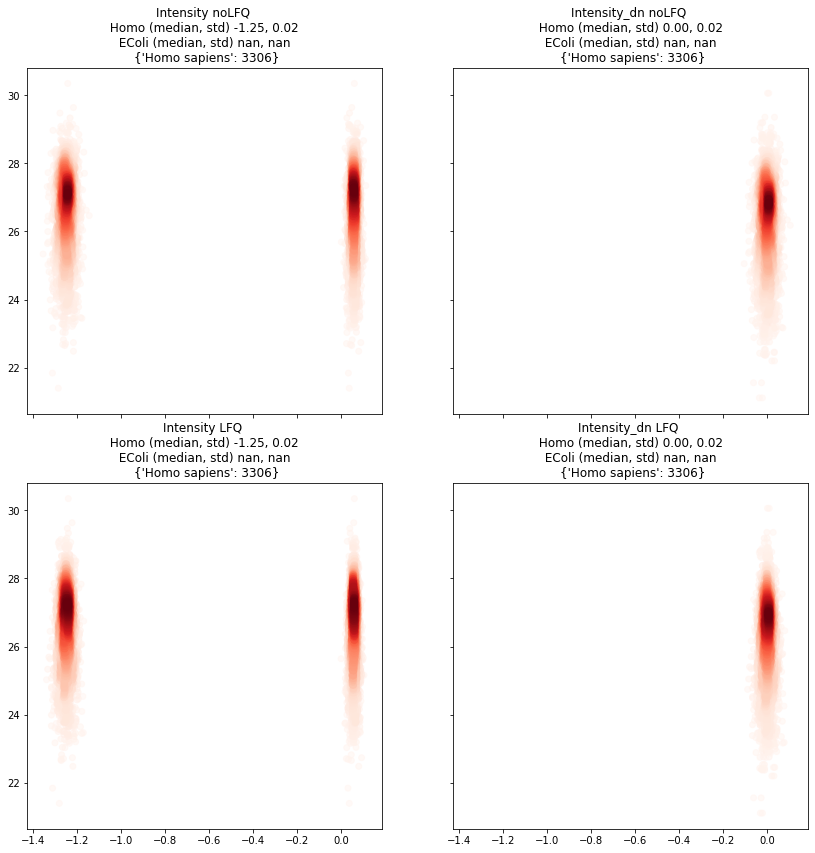

In [2]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)

plt.show()

### Bruker HeLa

2022-05-09 00:28:08> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 00:28:12> No settings provided. Creating from default settings.
2022-05-09 00:28:12> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 00:28:12> Logging to C:\Users\admin\alphapept\logs\log_20220509002812.txt.
2022-05-09 00:28:12> Platform information:
2022-05-09 00:28:12> system     - Windows
2022-05-09 00:28:12> release    - 10
2022-05-09 00:28:12> version    - 10.0.19044
2022-05-09 00:28:12> machine    - AMD64
2022-05-09 00:28:12> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 00:28:12> cpu count  - 24
2022-05-09 00:28:12> ram memory - 97.9/127.7 Gb (available/total)
2022-05-09 00:28:12> 
2022-05-09 00:28:12> Python information:
2022-05-09 00:28:12> SQLAlchemy                    - 1.4.35
2022-05-09 00:28:12> alphapept                     - 0.4.6
2022-05-09 00:28:12> biopython                     - 1.79
2022-05-09 00:28:12> bumpversion         

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:28:13> FASTA contains 36,789 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:23<00:00, 65.23s/it]

2022-05-09 00:30:53> Digested 36,789 proteins and generated 8,624,766 spectra
2022-05-09 00:32:13> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:01<00:00, 241.12s/it]


2022-05-09 00:32:28> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:32:28> Processing 1 files for step raw_conversion
2022-05-09 00:32:28> File F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2022-05-09 00:56:09> File conversion complete. Extracted 299,728 precursors.
2022-05-09 00:56:12> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.


  0%|                                                                                            | 0/1 [23:43<?, ?it/s]

2022-05-09 00:56:12> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:56:12> Processing 1 files for step find_features
2022-05-09 00:56:12> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2022-05-09 00:56:12> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2022-05-09 00:56:12> Using Windows FF
2022-05-09 00:56:17> Bruker featurer finder complete. Extracted 261,932 features.
2022-05-09 00:56:17> Matching features to query data.
2022-05-09 00:56:22> Saving feature table.
2022-05-09 00:56:22> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-05-09 00:56:22> Saving features.
2022-05-09 00:56:22> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.


  0%|                                                                                            | 0/1 [00:10<?, ?it/s]

2022-05-09 00:56:23> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:56:23> Starting first search.
2022-05-09 00:56:23> Processing 1 files for step search_db
2022-05-09 00:56:23> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-05-09 00:56:47> Performing search on 664,989 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-05-09 00:57:30> Found 672,639 psms.
2022-05-09 00:57:31> Extracting columns for scoring.
2022-05-09 00:59:17> Extracted columns from 672,639 spectra.
2022-05-09 00:59:19> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-05-09 00:59:23> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-05-09 00:59:49> First search complete.


  0%|                                                                                            | 0/1 [03:26<?, ?it/s]

2022-05-09 00:59:50> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 00:59:50> Processing 1 files for step calibrate_hdf
2022-05-09 00:59:50> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-05-09 00:59:51> Scoring using X-Tandem
2022-05-09 00:59:53> 68,636 target (686 decoy) of 181597 PSMs. fdr 0.009995 for a cutoff of 19.36 (set fdr was 0.01)
2022-05-09 00:59:53> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-05-09 01:00:00> Precursor calibration std 2.97, 1.82
2022-05-09 01:00:00> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2022-05-09 01:00:00> Starting fragment calibration.
2022-05-09 01:00:00> Calibrating fragments with neighbors
2022-05-09 01:00:01> Scoring using X-Tandem
2022-05-09 01:00:03> 68,636 target (686 decoy) of 181597 PSMs. fdr 0.009995 for a cutoff of 19.36 (set fdr was 0.01)
2022-05-09 01:00:04> Minimum hits for fragments before score 7.00.
2022-05-09 01:00:05> Minimum hits


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 01:06:10> Starting second search with DB.
2022-05-09 01:06:10> Processing 1 files for step search_db
2022-05-09 01:06:10> Found calibrated prec_tol with value 14.83
2022-05-09 01:06:10> Found calibrated frag_tol with value 54.50
2022-05-09 01:06:14> Performing search on 664,989 query and 8,624,766 db entries with frag_tol = 54.50 and prec_tol = 14.83.


  0%|                                                                                            | 0/1 [06:24<?, ?it/s]


2022-05-09 01:06:41> Found 1,372,768 psms.
2022-05-09 01:06:42> Extracting columns for scoring.
2022-05-09 01:09:39> Extracted columns from 1,372,768 spectra.
2022-05-09 01:09:43> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-05-09 01:09:49> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-05-09 01:10:15> Second search complete.


  0%|                                                                                            | 0/1 [04:05<?, ?it/s]


2022-05-09 01:10:16> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 01:10:16> Processing 1 files for step score_hdf
2022-05-09 01:10:16> Calling score_hdf
2022-05-09 01:10:19> Found second search psms for scoring.
2022-05-09 01:10:41> 80,699 target (8,069 decoy) of 269432 PSMs. fdr 0.099989 for a cutoff of 18.37 (set fdr was 0.1)


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-09 01:10:42> Training & cross-validation on 17741 targets and 17741 decoys
2022-05-09 01:11:07> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2022-05-09 01:11:08> The train accuracy was 0.9546248802209572
2022-05-09 01:11:08> Testing on 70965 targets and 70965 decoys
2022-05-09 01:11:09> The test accuracy was 0.9389840062002396
2022-05-09 01:11:09> Top features {'x_tandem': 0.331054518320558, 'hits': 0.2096575135703462, 'n_fragments_matched': 0.1032414541948884, 'hits_y': 0.09828946113040525, 'hits_b': 0.04466935467097882, 'fragments_matched_n_ratio': 0.040351340552206155, 'fragments_matched_int_ratio': 0.03413715158220139, 'n_missed': 0.027461391320716698, 'prec_offset_ppm': 0.014449966571352451, 'fragments_matched_int_sum': 0.014336619820907842, 'delta_m_ppm_abs': 0.010310051836820853, 'prec_offset': 0.009157048981888178, 'fragments_int_sum': 0.006388990476100288, 'ms1_int_sum_apex': 0.0060252402491891574, 'hit

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-09 01:11:20> 145,156 target (1,451 decoy) of 390216 PSMs. fdr 0.009996 for a cutoff of 0.85 (set fdr was 0.01)
2022-05-09 01:11:20> Saving identifications to ms_data file.
2022-05-09 01:11:22> Saving identifications to ms_data file complete.
2022-05-09 01:11:33> Saving identifications to csv file complete.
2022-05-09 01:11:33> Filter df with custom score
2022-05-09 01:11:35> Global FDR on precursor
2022-05-09 01:11:36> 63,951 target (639 decoy) of 245084 PSMs. fdr 0.009992 for a cutoff of 0.91 (set fdr was 0.01)
2022-05-09 01:11:36> Global FDR cutoff at 0.9057925999629695.
2022-05-09 01:11:37> FDR on peptides complete. For 0.01 FDR found 66,645 targets and 644 decoys.
2022-05-09 01:11:37> Extracting fragment_ions
2022-05-09 01:11:54> Extracting fragment_ions complete.
2022-05-09 01:11:54> Exporting peptide_fdr on F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-05-09 01:11:54> Scoring of files F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.


  0%|                                                                                            | 0/1 [01:38<?, ?it/s]

2022-05-09 01:11:55> ==== isobaric_labeling ====
2022-05-09 01:11:55> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 01:11:55> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-05-09 01:11:55> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 01:11:55> A total of 52,938 unique and 2,904 shared peptides.
2022-05-09 01:11:57> A total of 808 ambigious proteins
2022-05-09 01:11:57> A total of 612 unique and 27 shared peptides.
2022-05-09 01:11:57> A total of 27 ambigious proteins
2022-05-09 01:11:57> Global FDR on protein_group


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 01:11:57> 6,459 target (64 decoy) of 7820 PSMs. fdr 0.009909 for a cutoff of 0.98 (set fdr was 0.01)
2022-05-09 01:11:57> Global FDR cutoff at 0.9772366751328286.
2022-05-09 01:11:58> FDR on proteins complete. For 0.01 FDR found 65,875 targets and 68 decoys. A total of 6,523 proteins found.
2022-05-09 01:11:58> Saving complete.
2022-05-09 01:11:58> Protein groups complete.
2022-05-09 01:11:58> ==== quantification ====
2022-05-09 01:11:58> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:03<?, ?it/s]


2022-05-09 01:11:58> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 01:11:58> Complete.
2022-05-09 01:11:58> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.58it/s]

2022-05-09 01:11:58> LFQ complete.
2022-05-09 01:11:58> Extracting protein_summary
2022-05-09 01:11:59> Saved protein_summary of length 6,523 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 01:11:59> Updating protein_fdr.
2022-05-09 01:11:59> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 01:12:01> Saved df of length 65,943 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 01:12:01> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.92s/it]


2022-05-09 01:12:08> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 01:12:08> Analysis complete.


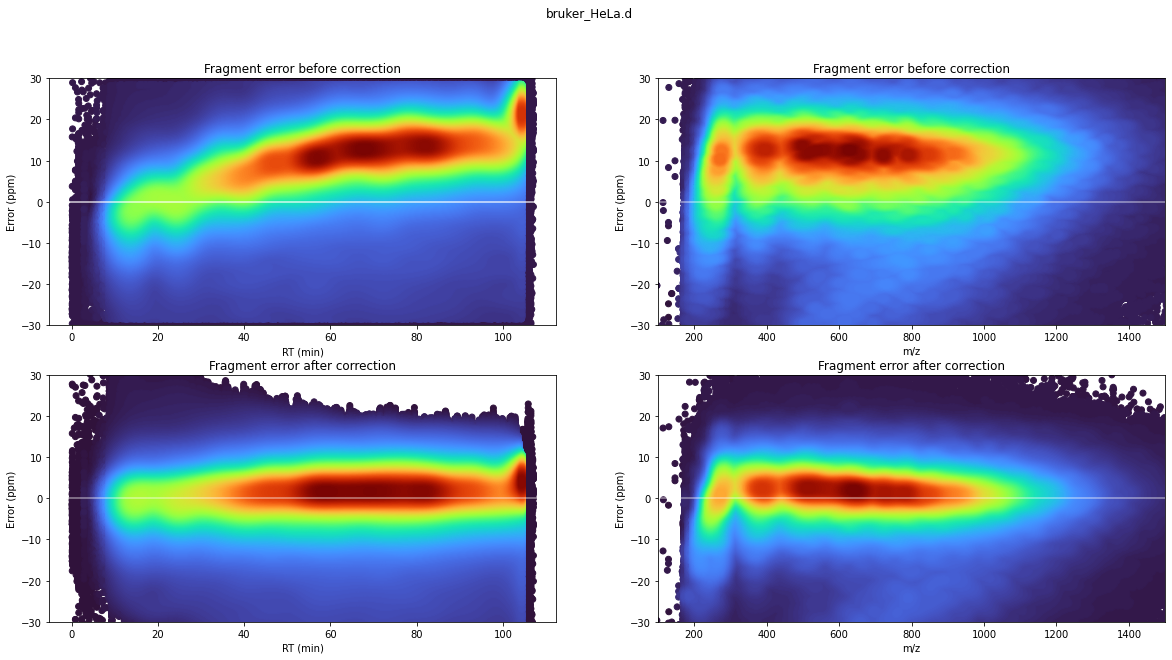

In [22]:
%run -i ../test_ci.py $tmp_folder bruker_hela

F:\projects\alphapept\sandbox\test_helper.py:51: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path2, sep='\t')


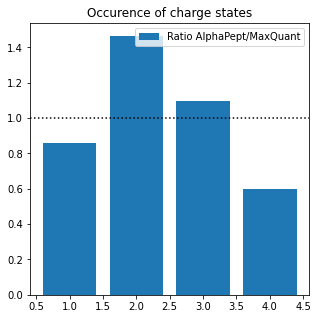

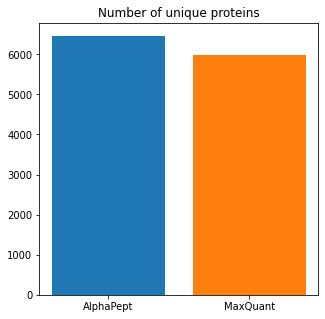

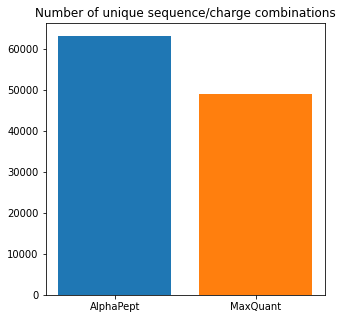

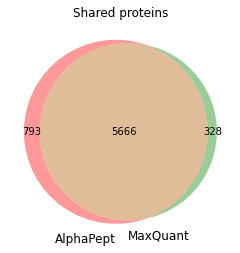

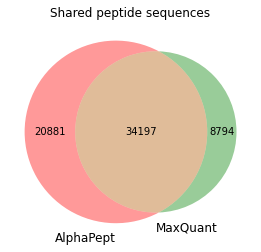

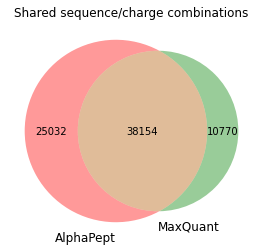

F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = density_scatter(d1.loc[shared]['fragments_int_sum'].values, d2.loc[shared]['ms1_int_sum'].values, ax = ax, bins=30)
F:\projects\alphapept\sandbox\test_helper.py:174: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version.

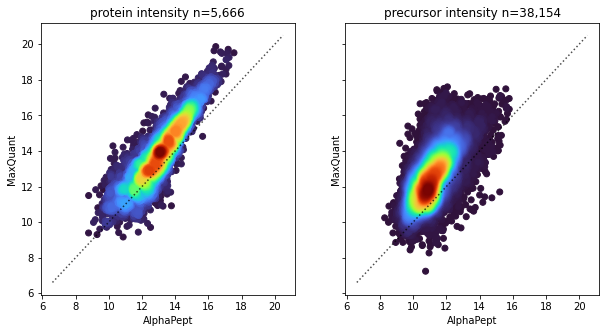

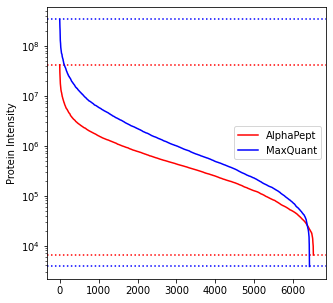

In [23]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [24]:
%run -i ../test_ci.py $tmp_folder PXD010012

2022-05-09 01:13:43> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 01:15:51> No settings provided. Creating from default settings.
2022-05-09 01:15:51> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 01:15:51> Logging to C:\Users\admin\alphapept\logs\log_20220509011551.txt.
2022-05-09 01:15:51> Platform information:
2022-05-09 01:15:51> system     - Windows
2022-05-09 01:15:51> release    - 10
2022-05-09 01:15:51> version    - 10.0.19044
2022-05-09 01:15:51> machine    - AMD64
2022-05-09 01:15:51> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 01:15:51> cpu count  - 24
2022-05-09 01:15:51> ram memory - 103.3/127.7 Gb (available/total)
2022-05-09 01:15:51> 
2022-05-09 01:15:51> Python information:
2022-05-09 01:15:51> SQLAlchemy                    - 1.4.35
2022-05-09 01:15:51> alphapept                     - 0.4.6
2022-05-09 01:15:51> biopython                     - 1.79
2022-05-09 01:15:51> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 01:15:52> FASTA contains 43,752 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:10<00:00, 29.72s/it]

2022-05-09 01:18:17> Digested 43,752 proteins and generated 5,835,394 spectra
2022-05-09 01:19:13> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:21<00:00, 201.35s/it]


2022-05-09 01:19:24> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 01:19:24> Processing 10 files for step raw_conversion
2022-05-09 01:19:24> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 02:07:48> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step raw_conversion succeeded. 10.00 %


 10%|███████▋                                                                     | 0.1/1 [48:24<7:15:36, 29040.12s/it]

2022-05-09 02:07:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step raw_conversion succeeded. 20.00 %


 20%|███████████████▍                                                             | 0.2/1 [48:28<2:39:45, 11982.35s/it]

2022-05-09 02:08:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step raw_conversion succeeded. 30.00 %


 30%|███████████████████████▍                                                      | 0.3/1 [48:36<1:16:24, 6549.12s/it]

2022-05-09 02:08:13> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step raw_conversion succeeded. 40.00 %


 40%|████████████████████████████████                                                | 0.4/1 [48:49<40:08, 4014.74s/it]

2022-05-09 02:08:13> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step raw_conversion succeeded. 50.00 %
2022-05-09 02:08:33> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step raw_conversion succeeded. 60.00 %


 60%|████████████████████████████████████████████████                                | 0.6/1 [49:09<12:55, 1939.35s/it]

2022-05-09 02:08:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step raw_conversion succeeded. 70.00 %


 70%|████████████████████████████████████████████████████████                        | 0.7/1 [49:21<07:11, 1438.66s/it]

2022-05-09 02:09:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step raw_conversion succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [49:55<03:46, 1131.58s/it]

2022-05-09 02:09:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step raw_conversion succeeded. 90.00 %
2022-05-09 02:09:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step raw_conversion succeeded. 100.00 %


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [49:56<00:00, 2996.02s/it]

2022-05-09 02:09:20> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:09:20> Processing 10 files for step find_features
2022-05-09 02:09:20> Using Bruker Feature Finder. Setting Process limit to 4.
2022-05-09 02:09:20> AlphaPool was set to 4 processes. Setting max to 4.
2022-05-09 02:09:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step find_features succeeded. 10.00 %


 10%|████████                                                                         | 0.1/1 [00:20<03:05, 206.50s/it]

2022-05-09 02:09:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step find_features succeeded. 20.00 %
2022-05-09 02:09:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step find_features succeeded. 30.00 %
2022-05-09 02:09:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step find_features succeeded. 40.00 %


 40%|████████████████████████████████▊                                                 | 0.4/1 [00:20<00:23, 39.37s/it]

2022-05-09 02:09:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step find_features succeeded. 50.00 %
2022-05-09 02:09:53> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step find_features succeeded. 60.00 %
2022-05-09 02:09:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step find_features succeeded. 70.00 %


 70%|█████████████████████████████████████████████████████████▍                        | 0.7/1 [00:34<00:12, 42.30s/it]

2022-05-09 02:09:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step find_features succeeded. 80.00 %
2022-05-09 02:10:03> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step find_features succeeded. 90.00 %


 90%|█████████████████████████████████████████████████████████████████████████▊        | 0.9/1 [00:43<00:04, 42.98s/it]

2022-05-09 02:10:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step find_features succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:44<00:00, 44.39s/it]

2022-05-09 02:10:04> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:10:04> Starting first search.
2022-05-09 02:10:04> Processing 10 files for step search_db
2022-05-09 02:10:04> Searching. Setting Process limit to 13.
2022-05-09 02:10:04> AlphaPool was set to 13 processes. Setting max to 13.
2022-05-09 02:18:03> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %


 10%|███████▊                                                                      | 0.1/1 [07:59<1:11:54, 4793.42s/it]

2022-05-09 02:18:05> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [08:01<26:28, 1985.16s/it]

2022-05-09 02:18:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 30.00 %


 30%|████████████████████████                                                        | 0.3/1 [08:11<13:07, 1125.31s/it]

2022-05-09 02:18:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step search_db succeeded. 40.00 %
2022-05-09 02:18:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step search_db succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [08:14<04:08, 497.91s/it]

2022-05-09 02:18:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step search_db succeeded. 60.00 %


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [08:15<02:22, 356.63s/it]

2022-05-09 02:18:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step search_db succeeded. 70.00 %


 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [08:17<01:17, 258.25s/it]

2022-05-09 02:18:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step search_db succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [08:20<00:38, 191.27s/it]

2022-05-09 02:18:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step search_db succeeded. 90.00 %
2022-05-09 02:18:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step search_db succeeded. 100.00 %
2022-05-09 02:18:47> First search complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:43<00:00, 523.13s/it]

2022-05-09 02:18:47> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:18:47> Processing 10 files for step calibrate_hdf
2022-05-09 02:18:47> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 02:24:12> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step calibrate_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [05:25<48:45, 3251.05s/it]

2022-05-09 02:24:13> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step calibrate_hdf succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [05:26<17:55, 1344.61s/it]

2022-05-09 02:24:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step calibrate_hdf succeeded. 30.00 %


 30%|████████████████████████▎                                                        | 0.3/1 [05:33<08:55, 765.67s/it]

2022-05-09 02:24:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step calibrate_hdf succeeded. 40.00 %
2022-05-09 02:24:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step calibrate_hdf succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [05:34<02:47, 334.20s/it]

2022-05-09 02:24:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step calibrate_hdf succeeded. 60.00 %


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [06:04<02:09, 324.19s/it]

2022-05-09 02:24:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step calibrate_hdf succeeded. 70.00 %


 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [06:09<01:13, 243.62s/it]

2022-05-09 02:25:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step calibrate_hdf succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [06:14<00:37, 188.36s/it]

2022-05-09 02:25:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step calibrate_hdf succeeded. 90.00 %
2022-05-09 02:25:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step calibrate_hdf succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:15<00:00, 375.58s/it]

2022-05-09 02:25:03> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:25:03> Starting second search with DB.
2022-05-09 02:25:03> Processing 10 files for step search_db
2022-05-09 02:25:03> Searching. Setting Process limit to 13.
2022-05-09 02:25:03> AlphaPool was set to 13 processes. Setting max to 13.
2022-05-09 02:32:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %


 10%|███████▊                                                                      | 0.1/1 [06:59<1:02:55, 4195.30s/it]

2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [07:04<23:26, 1757.72s/it]

2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 30.00 %
2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step search_db succeeded. 40.00 %


 40%|████████████████████████████████▍                                                | 0.4/1 [07:05<06:34, 658.32s/it]

2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step search_db succeeded. 50.00 %
2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step search_db failed. Exception Unable to allocate 1.48 GiB for an array with shape (22105199, 9) and data type float64
2022-05-09 02:32:08> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step search_db failed. Exception Unable to allocate 1.50 GiB for an array with shape (22381334, 9) and data type float64
2022-05-09 02:32:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step search_db succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [07:16<00:50, 253.78s/it]

2022-05-09 02:32:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step search_db succeeded. 90.00 %
2022-05-09 02:32:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step search_db failed. Exception Unable to allocate 768. MiB for an array with shape (1351985,) and data type [('query_idx', '<i4'), ('db_idx', '<i4'), ('hits', '<f8'), ('mass_db', '<f4'), ('prec_offset', '<f4'), ('prec_offset_ppm', '<f4'), ('prec_offset_raw', '<f4'), ('prec_offset_raw_ppm', '<f4'), ('delta_m', '<f4'), ('delta_m_ppm', '<f4'), ('fragments_matched_int_ratio', '<f4'), ('fragments_int_ratio', '<f4'), ('fragments_int_sum', '<i8'), ('fragments_matched_int_sum', '<i8'), ('n_fragments_matched', '<i8'), ('fragment_ion_idx', '<i8'), ('hits_b', '<i8'), ('hits_y', '<i8'), ('hits_b-H2O', '<i8'), ('hits_y-H2O', '<i8'), ('hits_b-NH3', '<i8'), ('hits_y-NH3', '<i8'), ('rt', '<f8'), ('sequence', '<U44'), ('mass', '<f8'), ('mz', '<f

 33%|█████████████████████▋                                           | 0.33333333333333326/1 [11:28<06:20, 570.34s/it]

2022-05-09 02:36:35> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 66.67 %


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [11:32<01:50, 330.95s/it]

2022-05-09 02:36:35> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 100.00 %
2022-05-09 02:36:57> Second search complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [11:54<00:00, 714.59s/it]


2022-05-09 02:36:58> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:36:58> Processing 10 files for step score_hdf
2022-05-09 02:36:58> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 02:40:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step score_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [03:58<35:46, 2385.40s/it]

2022-05-09 02:40:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step score_hdf succeeded. 20.00 %


 20%|████████████████▏                                                                | 0.2/1 [04:01<13:17, 996.79s/it]

2022-05-09 02:40:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step score_hdf succeeded. 30.00 %
2022-05-09 02:41:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step score_hdf succeeded. 40.00 %


 40%|████████████████████████████████▍                                                | 0.4/1 [04:03<03:47, 379.05s/it]

2022-05-09 02:41:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step score_hdf succeeded. 50.00 %
2022-05-09 02:41:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step score_hdf succeeded. 60.00 %


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [04:22<01:38, 245.25s/it]

2022-05-09 02:41:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step score_hdf succeeded. 70.00 %
2022-05-09 02:41:23> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step score_hdf succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [04:24<00:30, 150.40s/it]

2022-05-09 02:41:23> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step score_hdf succeeded. 90.00 %
2022-05-09 02:41:23> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step score_hdf succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:24<00:00, 264.55s/it]

2022-05-09 02:41:23> ==== isobaric_labeling ====
2022-05-09 02:41:23> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:41:23> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-05-09 02:41:23> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 02:41:27> A total of 53,878 unique and 7,113 shared peptides.
2022-05-09 02:41:30> A total of 1769 ambigious proteins
2022-05-09 02:41:31> A total of 3,002 unique and 297 shared peptides.
2022-05-09 02:41:31> A total of 273 ambigious proteins


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 02:41:32> Global FDR on protein_group
2022-05-09 02:41:32> 7,027 target (70 decoy) of 12554 PSMs. fdr 0.009962 for a cutoff of 0.99 (set fdr was 0.01)
2022-05-09 02:41:32> Global FDR cutoff at 0.9943083806879504.
2022-05-09 02:41:33> FDR on proteins complete. For 0.01 FDR found 462,014 targets and 290 decoys. A total of 7,097 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(


2022-05-09 02:41:34> Saving complete.
2022-05-09 02:41:34> Protein groups complete.
2022-05-09 02:41:34> ==== quantification ====
2022-05-09 02:41:34> Reading protein_fdr for quantification.


  0%|                                                                                            | 0/1 [00:11<?, ?it/s]


2022-05-09 02:41:35> Delayed Normalization.
2022-05-09 02:41:36> Setting minimum occurence to 10.0
2022-05-09 02:41:36> Delayed normalization with SLSQP on (1, 10, 24754)
2022-05-09 02:41:43> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 02:41:45> Complete.
2022-05-09 02:41:45> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:41:45> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1978300690432577/1 [00:07<00:27, 34.66s/it]

2022-05-09 02:41:52> Starting protein extraction for 7097 proteins.
2022-05-09 02:41:52> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:10<00:00, 207.63s/it]

2022-05-09 02:45:02> LFQ complete.
2022-05-09 02:45:02> Extracting protein_summary
2022-05-09 02:45:03> Saved protein_summary of length 7,097 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 02:45:03> Updating protein_fdr.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'sample_group', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 02:45:04> Exporting as csv.
2022-05-09 02:45:23> Saved df of length 462,304 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 02:45:23> ==== export ====


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:38<00:00, 218.23s/it]


2022-05-09 02:46:30> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 02:46:30> Analysis complete.


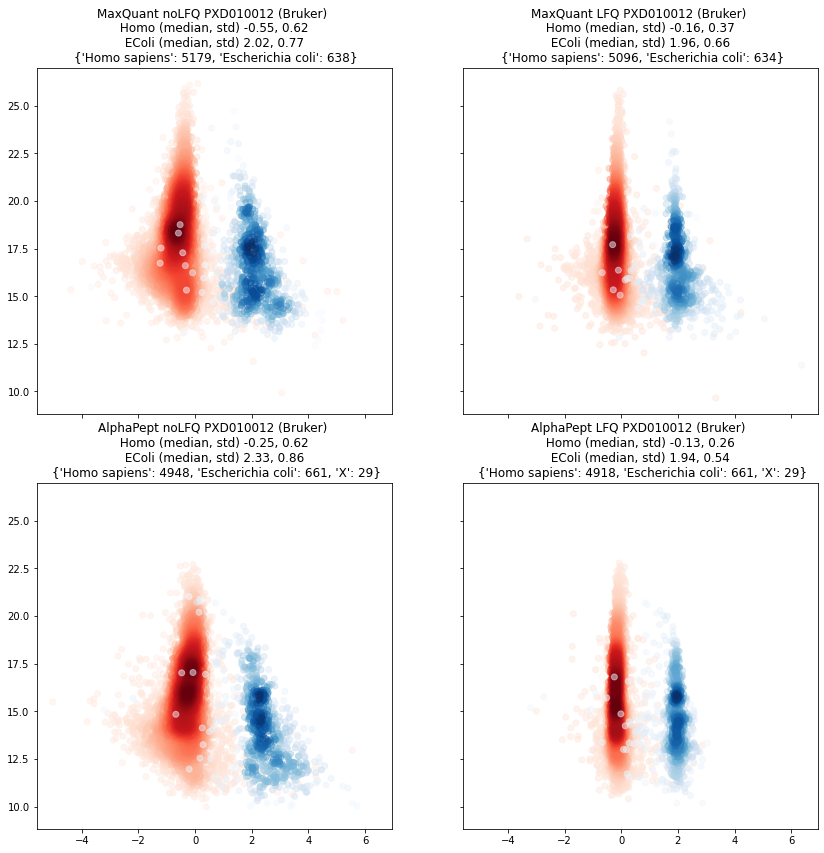

In [25]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2022-05-09 02:46:32> Loading files


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\quantification.py:617: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  evd = pd.read_csv(evidence_path, sep='\t')


2022-05-09 02:46:35> A total of 10 files.
2022-05-09 02:46:35> File does not contain Fractions. Setting Fractions to 1
2022-05-09 02:46:47> A total of 7,413 proteins.
2022-05-09 02:46:51> Setting minimum occurence to 10.0
2022-05-09 02:46:51> Delayed normalization with SLSQP on (1, 10, 13735)
2022-05-09 02:46:55> Preparing protein table for parallel processing.
2022-05-09 02:47:02> Starting protein extraction for 7413 proteins.
2022-05-09 02:47:02> AlphaPool was set to 24 processes. Setting max to 24.


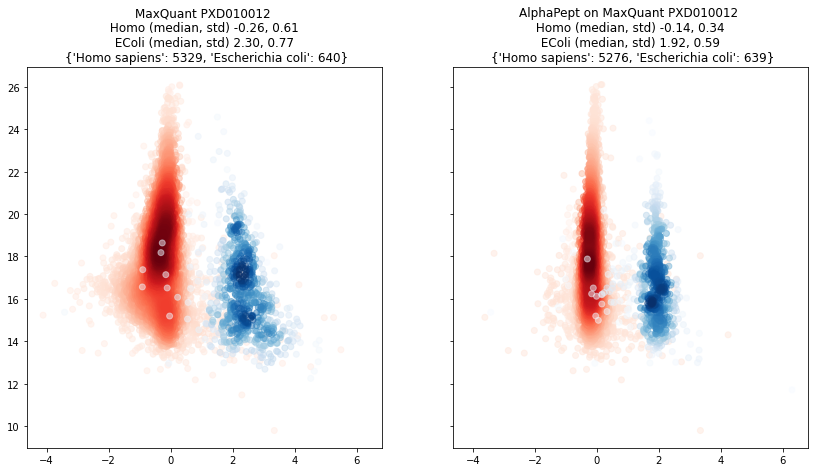

In [26]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

2022-05-09 02:49:49> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 02:49:56> No settings provided. Creating from default settings.
2022-05-09 02:49:56> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 02:49:56> Logging to C:\Users\admin\alphapept\logs\log_20220509024956.txt.
2022-05-09 02:49:56> Platform information:
2022-05-09 02:49:56> system     - Windows
2022-05-09 02:49:56> release    - 10
2022-05-09 02:49:56> version    - 10.0.19044
2022-05-09 02:49:56> machine    - AMD64
2022-05-09 02:49:56> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 02:49:56> cpu count  - 24
2022-05-09 02:49:56> ram memory - 119.5/127.7 Gb (available/total)
2022-05-09 02:49:56> 
2022-05-09 02:49:56> Python information:
2022-05-09 02:49:56> SQLAlchemy                    - 1.4.35
2022-05-09 02:49:56> alphapept                     - 0.4.6
2022-05-09 02:49:56> biopython                     - 1.79
2022-05-09 02:49:56> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:49:56> Processing 1 files for step raw_conversion
2022-05-09 02:49:56> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-05-09 02:51:55> File conversion complete. Extracted 120,226 precursors.
2022-05-09 02:51:57> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [02:00<?, ?it/s]

2022-05-09 02:51:57> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:51:57> Processing 1 files for step find_features
2022-05-09 02:51:57> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-05-09 02:51:57> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-05-09 02:51:57> Hill extraction with centroid_tol 8 and max_gap 2
2022-05-09 02:52:01> Number of hills 1,105,353, len = 17.35
2022-05-09 02:52:01> Repeating hill extraction with centroid_tol 5.87
2022-05-09 02:52:06> Number of hills 1,227,331, len = 19.44
2022-05-09 02:52:07> After duplicate removal of hills 1,025,845
2022-05-09 02:52:17> After split hill_ptrs 1,207,373
2022-05-09 02:52:17> After filter hill_ptrs 1,188,406
2022-05-09 02:54:32> Extracting hill stats complete
2022-05-09 02:54:42> Found 184,383 pre isotope patterns.
2022-05-09 02:55:20> Extracted 198,500 isotope patterns.
2022-05-09 02:55:24> Report complete.
2022-05-09 02:55:24> Matching features 

  0%|                                                                                            | 0/1 [03:29<?, ?it/s]

2022-05-09 02:55:26> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 02:55:26> Starting first search.
2022-05-09 02:55:39> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-05-09 02:55:39> Setting Process limit to 23
2022-05-09 02:55:39> AlphaPool was set to 23 processes. Setting max to 23.
2022-05-09 02:57:14> Block 1 of 565 complete - 0.18 % - created peptides 123,414 - total peptides 123,414 


  0%|                                                          | 0.0017699115044247787/1 [01:47<16:54:23, 60971.01s/it]

2022-05-09 02:57:16> Block 2 of 565 complete - 0.35 % - created peptides 127,088 - total peptides 250,502 


  0%|▏                                                          | 0.0035398230088495575/1 [01:50<7:12:51, 26063.65s/it]

2022-05-09 02:57:17> Block 3 of 565 complete - 0.53 % - created peptides 128,598 - total peptides 379,100 


  1%|▎                                                           | 0.005309734513274336/1 [01:52<4:03:34, 14692.23s/it]

2022-05-09 02:57:19> Block 4 of 565 complete - 0.71 % - created peptides 132,722 - total peptides 511,822 


  1%|▍                                                            | 0.007079646017699115/1 [01:55<2:35:33, 9399.55s/it]

2022-05-09 02:57:21> Block 5 of 565 complete - 0.88 % - created peptides 136,728 - total peptides 648,550 


  1%|▌                                                            | 0.008849557522123894/1 [01:59<1:53:09, 6850.44s/it]

2022-05-09 02:57:25> Block 6 of 565 complete - 1.06 % - created peptides 142,270 - total peptides 790,820 


  1%|▋                                                            | 0.010619469026548672/1 [02:02<1:23:42, 5076.12s/it]

2022-05-09 02:57:28> Block 7 of 565 complete - 1.24 % - created peptides 133,948 - total peptides 924,768 


  1%|▊                                                            | 0.012389380530973451/1 [02:06<1:08:23, 4154.82s/it]

2022-05-09 02:57:32> Block 8 of 565 complete - 1.42 % - created peptides 143,956 - total peptides 1,068,724 


  1%|▉                                                               | 0.01415929203539823/1 [02:08<53:16, 3242.03s/it]

2022-05-09 02:57:34> Block 9 of 565 complete - 1.59 % - created peptides 140,554 - total peptides 1,209,278 


  2%|█                                                               | 0.01592920353982301/1 [02:11<45:29, 2774.06s/it]

2022-05-09 02:57:37> Block 10 of 565 complete - 1.77 % - created peptides 149,714 - total peptides 1,358,992 


  2%|█                                                              | 0.017699115044247787/1 [02:13<38:28, 2350.39s/it]

2022-05-09 02:57:40> Block 11 of 565 complete - 1.95 % - created peptides 150,902 - total peptides 1,509,894 


  2%|█▏                                                             | 0.019469026548672566/1 [02:17<36:26, 2229.95s/it]

2022-05-09 02:57:43> Block 12 of 565 complete - 2.12 % - created peptides 161,018 - total peptides 1,670,912 


  2%|█▎                                                             | 0.021238938053097345/1 [02:20<33:40, 2064.12s/it]

2022-05-09 02:57:46> Block 13 of 565 complete - 2.30 % - created peptides 164,228 - total peptides 1,835,140 


  2%|█▍                                                             | 0.023008849557522124/1 [02:24<35:18, 2168.07s/it]

2022-05-09 02:57:51> Block 14 of 565 complete - 2.48 % - created peptides 159,688 - total peptides 1,994,828 


  2%|█▌                                                             | 0.024778761061946902/1 [02:28<33:58, 2090.75s/it]

2022-05-09 02:57:54> Block 15 of 565 complete - 2.65 % - created peptides 166,612 - total peptides 2,161,440 


  3%|█▋                                                              | 0.02654867256637168/1 [02:32<36:49, 2269.86s/it]

2022-05-09 02:57:59> Block 16 of 565 complete - 2.83 % - created peptides 165,944 - total peptides 2,327,384 


  3%|█▊                                                              | 0.02831858407079646/1 [02:38<40:37, 2508.72s/it]

2022-05-09 02:58:04> Block 17 of 565 complete - 3.01 % - created peptides 167,576 - total peptides 2,494,960 


  3%|█▉                                                              | 0.03008849557522124/1 [02:44<45:43, 2828.75s/it]

2022-05-09 02:58:10> Block 18 of 565 complete - 3.19 % - created peptides 166,654 - total peptides 2,661,614 


  3%|██                                                              | 0.03185840707964602/1 [02:51<50:42, 3142.60s/it]

2022-05-09 02:58:17> Block 19 of 565 complete - 3.36 % - created peptides 171,578 - total peptides 2,833,192 


  3%|██                                                             | 0.033628318584070796/1 [02:57<52:47, 3277.46s/it]

2022-05-09 02:58:24> Block 20 of 565 complete - 3.54 % - created peptides 173,356 - total peptides 3,006,548 


  4%|██▏                                                            | 0.035398230088495575/1 [03:05<58:04, 3612.42s/it]

2022-05-09 02:58:31> Block 21 of 565 complete - 3.72 % - created peptides 172,168 - total peptides 3,178,716 


  4%|██▍                                                             | 0.03716814159292035/1 [03:11<57:51, 3605.49s/it]

2022-05-09 02:58:38> Block 22 of 565 complete - 3.89 % - created peptides 183,578 - total peptides 3,362,294 


  4%|██▍                                                             | 0.03893805309734513/1 [03:18<57:59, 3620.87s/it]

2022-05-09 02:58:44> Block 23 of 565 complete - 4.07 % - created peptides 195,762 - total peptides 3,558,056 


  4%|██▌                                                             | 0.04070796460176991/1 [03:24<57:01, 3566.74s/it]

2022-05-09 02:58:50> Block 24 of 565 complete - 4.25 % - created peptides 125,084 - total peptides 3,683,140 


  4%|██▋                                                             | 0.04247787610619469/1 [03:30<57:11, 3583.28s/it]

2022-05-09 02:58:57> Block 25 of 565 complete - 4.42 % - created peptides 123,870 - total peptides 3,807,010 


  4%|██▊                                                             | 0.04424778761061947/1 [03:35<53:39, 3368.91s/it]

2022-05-09 02:59:02> Block 26 of 565 complete - 4.60 % - created peptides 127,222 - total peptides 3,934,232 


  5%|██▉                                                             | 0.04601769911504425/1 [03:42<55:38, 3499.88s/it]

2022-05-09 02:59:09> Block 27 of 565 complete - 4.78 % - created peptides 137,994 - total peptides 4,072,226 


  5%|███                                                            | 0.047787610619469026/1 [03:49<57:41, 3634.72s/it]

2022-05-09 02:59:16> Block 28 of 565 complete - 4.96 % - created peptides 165,874 - total peptides 4,238,100 


  5%|███                                                          | 0.049557522123893805/1 [03:57<1:02:11, 3926.58s/it]

2022-05-09 02:59:24> Block 29 of 565 complete - 5.13 % - created peptides 125,634 - total peptides 4,363,734 


  5%|███▎                                                            | 0.05132743362831858/1 [04:03<59:29, 3763.09s/it]

2022-05-09 02:59:30> Block 30 of 565 complete - 5.31 % - created peptides 121,136 - total peptides 4,484,870 


  5%|███▎                                                          | 0.05309734513274336/1 [04:11<1:02:08, 3937.94s/it]

2022-05-09 02:59:37> Block 31 of 565 complete - 5.49 % - created peptides 154,758 - total peptides 4,639,628 


  5%|███▍                                                          | 0.05486725663716814/1 [04:18<1:02:46, 3985.56s/it]

2022-05-09 02:59:45> Block 32 of 565 complete - 5.66 % - created peptides 137,790 - total peptides 4,777,418 


  6%|███▌                                                          | 0.05663716814159292/1 [04:26<1:03:41, 4050.88s/it]

2022-05-09 02:59:52> Block 33 of 565 complete - 5.84 % - created peptides 154,300 - total peptides 4,931,718 


  6%|███▋                                                           | 0.0584070796460177/1 [04:33<1:04:15, 4094.17s/it]

2022-05-09 03:00:00> Block 34 of 565 complete - 6.02 % - created peptides 170,866 - total peptides 5,102,584 


  6%|███▊                                                            | 0.06017699115044248/1 [04:39<59:35, 3804.17s/it]

2022-05-09 03:00:05> Block 35 of 565 complete - 6.19 % - created peptides 175,244 - total peptides 5,277,828 


  6%|███▊                                                         | 0.061946902654867256/1 [04:47<1:04:05, 4099.51s/it]

2022-05-09 03:00:14> Block 36 of 565 complete - 6.37 % - created peptides 163,048 - total peptides 5,440,876 


  6%|███▉                                                          | 0.06371681415929203/1 [04:53<1:00:37, 3885.11s/it]

2022-05-09 03:00:20> Block 37 of 565 complete - 6.55 % - created peptides 162,576 - total peptides 5,603,452 


  7%|████                                                          | 0.06548672566371681/1 [05:01<1:03:31, 4078.06s/it]

2022-05-09 03:00:28> Block 38 of 565 complete - 6.73 % - created peptides 213,430 - total peptides 5,816,882 


  7%|████▏                                                         | 0.06725663716814159/1 [05:10<1:08:52, 4430.02s/it]

2022-05-09 03:00:37> Block 39 of 565 complete - 6.90 % - created peptides 204,414 - total peptides 6,021,296 


  7%|████▎                                                         | 0.06902654867256637/1 [05:17<1:04:35, 4163.32s/it]

2022-05-09 03:00:43> Block 40 of 565 complete - 7.08 % - created peptides 195,068 - total peptides 6,216,364 


  7%|████▍                                                         | 0.07079646017699115/1 [05:25<1:07:04, 4330.91s/it]

2022-05-09 03:00:52> Block 41 of 565 complete - 7.26 % - created peptides 191,214 - total peptides 6,407,578 


  7%|████▍                                                         | 0.07256637168141593/1 [05:34<1:10:42, 4573.97s/it]

2022-05-09 03:01:01> Block 42 of 565 complete - 7.43 % - created peptides 196,864 - total peptides 6,604,442 


  7%|████▋                                                          | 0.0743362831858407/1 [05:41<1:07:45, 4392.15s/it]

2022-05-09 03:01:08> Block 43 of 565 complete - 7.61 % - created peptides 201,018 - total peptides 6,805,460 


  8%|████▋                                                         | 0.07610619469026549/1 [05:51<1:11:42, 4656.52s/it]

2022-05-09 03:01:17> Block 44 of 565 complete - 7.79 % - created peptides 187,616 - total peptides 6,993,076 


  8%|████▊                                                         | 0.07787610619469026/1 [05:57<1:07:03, 4363.29s/it]

2022-05-09 03:01:25> Block 45 of 565 complete - 7.96 % - created peptides 222,436 - total peptides 7,215,512 


  8%|████▉                                                         | 0.07964601769911504/1 [06:06<1:10:20, 4585.88s/it]

2022-05-09 03:01:32> Block 46 of 565 complete - 8.14 % - created peptides 202,470 - total peptides 7,417,982 


  8%|█████                                                         | 0.08141592920353982/1 [06:15<1:13:20, 4790.64s/it]

2022-05-09 03:01:42> Block 47 of 565 complete - 8.32 % - created peptides 140,236 - total peptides 7,558,218 


  8%|█████▏                                                         | 0.0831858407079646/1 [06:22<1:08:01, 4451.82s/it]

2022-05-09 03:01:48> Block 48 of 565 complete - 8.50 % - created peptides 130,982 - total peptides 7,689,200 


  8%|█████▎                                                        | 0.08495575221238938/1 [06:31<1:12:22, 4745.58s/it]

2022-05-09 03:01:58> Block 49 of 565 complete - 8.67 % - created peptides 141,322 - total peptides 7,830,522 


  9%|█████▍                                                        | 0.08672566371681416/1 [06:39<1:09:00, 4533.94s/it]

2022-05-09 03:02:05> Block 50 of 565 complete - 8.85 % - created peptides 171,728 - total peptides 8,002,250 


  9%|█████▍                                                        | 0.08849557522123894/1 [06:48<1:13:20, 4827.40s/it]

2022-05-09 03:02:15> Block 51 of 565 complete - 9.03 % - created peptides 133,064 - total peptides 8,135,314 


  9%|█████▌                                                        | 0.09026548672566372/1 [06:56<1:10:03, 4620.08s/it]

2022-05-09 03:02:22> Block 52 of 565 complete - 9.20 % - created peptides 152,268 - total peptides 8,287,582 


  9%|█████▊                                                         | 0.0920353982300885/1 [07:05<1:14:02, 4892.27s/it]

2022-05-09 03:02:32> Block 53 of 565 complete - 9.38 % - created peptides 189,826 - total peptides 8,477,408 


  9%|█████▊                                                        | 0.09380530973451327/1 [07:16<1:17:57, 5162.23s/it]

2022-05-09 03:02:42> Block 54 of 565 complete - 9.56 % - created peptides 165,186 - total peptides 8,642,594 


 10%|█████▉                                                        | 0.09557522123893805/1 [07:23<1:11:46, 4762.00s/it]

2022-05-09 03:02:49> Block 55 of 565 complete - 9.73 % - created peptides 143,892 - total peptides 8,786,486 


 10%|██████                                                        | 0.09734513274336283/1 [07:29<1:06:42, 4434.46s/it]

2022-05-09 03:02:55> Block 56 of 565 complete - 9.91 % - created peptides 161,246 - total peptides 8,947,732 


 10%|██████▏                                                       | 0.09911504424778761/1 [07:38<1:10:06, 4669.75s/it]

2022-05-09 03:03:05> Block 57 of 565 complete - 10.09 % - created peptides 199,296 - total peptides 9,147,028 


 10%|██████▎                                                       | 0.10088495575221239/1 [07:45<1:07:22, 4495.74s/it]

2022-05-09 03:03:12> Block 58 of 565 complete - 10.27 % - created peptides 182,464 - total peptides 9,329,492 


 10%|██████▎                                                       | 0.10265486725663717/1 [07:55<1:12:14, 4830.64s/it]

2022-05-09 03:03:22> Block 59 of 565 complete - 10.44 % - created peptides 135,004 - total peptides 9,464,496 


 10%|██████▍                                                       | 0.10442477876106195/1 [08:03<1:09:29, 4655.96s/it]

2022-05-09 03:03:29> Block 60 of 565 complete - 10.62 % - created peptides 189,334 - total peptides 9,653,830 


 11%|██████▌                                                       | 0.10619469026548672/1 [08:14<1:15:44, 5084.63s/it]

2022-05-09 03:03:40> Block 61 of 565 complete - 10.80 % - created peptides 156,708 - total peptides 9,810,538 


 11%|██████▊                                                        | 0.1079646017699115/1 [08:21<1:11:19, 4797.87s/it]

2022-05-09 03:03:47> Block 62 of 565 complete - 10.97 % - created peptides 174,664 - total peptides 9,985,202 


 11%|██████▊                                                       | 0.10973451327433628/1 [08:31<1:15:23, 5081.28s/it]

2022-05-09 03:03:58> Block 63 of 565 complete - 11.15 % - created peptides 160,398 - total peptides 10,145,600 


 11%|██████▉                                                       | 0.11150442477876106/1 [08:39<1:11:19, 4816.28s/it]

2022-05-09 03:04:05> Block 64 of 565 complete - 11.33 % - created peptides 165,648 - total peptides 10,311,248 


 11%|███████                                                       | 0.11327433628318584/1 [08:50<1:17:13, 5225.52s/it]

2022-05-09 03:04:16> Block 65 of 565 complete - 11.50 % - created peptides 173,966 - total peptides 10,485,214 


 12%|███████▏                                                      | 0.11504424778761062/1 [08:57<1:12:54, 4942.72s/it]

2022-05-09 03:04:24> Block 66 of 565 complete - 11.68 % - created peptides 190,250 - total peptides 10,675,464 


 12%|███████▎                                                       | 0.1168141592920354/1 [09:05<1:09:37, 4729.52s/it]

2022-05-09 03:04:31> Block 67 of 565 complete - 11.86 % - created peptides 215,492 - total peptides 10,890,956 


 12%|███████▎                                                      | 0.11858407079646018/1 [09:16<1:16:56, 5237.50s/it]

2022-05-09 03:04:42> Block 68 of 565 complete - 12.04 % - created peptides 200,822 - total peptides 11,091,778 


 12%|███████▍                                                      | 0.12035398230088495/1 [09:23<1:11:19, 4864.49s/it]

2022-05-09 03:04:49> Block 69 of 565 complete - 12.21 % - created peptides 158,858 - total peptides 11,250,636 


 12%|███████▌                                                      | 0.12212389380530973/1 [09:34<1:16:20, 5217.20s/it]

2022-05-09 03:05:00> Block 70 of 565 complete - 12.39 % - created peptides 138,144 - total peptides 11,388,780 


 12%|███████▋                                                      | 0.12389380530973451/1 [09:42<1:12:44, 4981.82s/it]

2022-05-09 03:05:08> Block 71 of 565 complete - 12.57 % - created peptides 222,302 - total peptides 11,611,082 


 13%|███████▉                                                       | 0.1256637168141593/1 [09:49<1:09:01, 4736.86s/it]

2022-05-09 03:05:15> Block 72 of 565 complete - 12.74 % - created peptides 143,006 - total peptides 11,754,088 


 13%|███████▉                                                      | 0.12743362831858407/1 [10:01<1:18:18, 5384.52s/it]

2022-05-09 03:05:28> Block 73 of 565 complete - 12.92 % - created peptides 183,610 - total peptides 11,937,698 


 13%|████████                                                      | 0.12920353982300886/1 [10:09<1:13:11, 5043.42s/it]

2022-05-09 03:05:35> Block 74 of 565 complete - 13.10 % - created peptides 173,962 - total peptides 12,111,660 


 13%|████████                                                      | 0.13097345132743363/1 [10:16<1:09:10, 4775.89s/it]

2022-05-09 03:05:42> Block 75 of 565 complete - 13.27 % - created peptides 142,022 - total peptides 12,253,682 


 13%|████████▏                                                     | 0.13274336283185842/1 [10:27<1:14:58, 5187.36s/it]

2022-05-09 03:05:53> Block 76 of 565 complete - 13.45 % - created peptides 187,876 - total peptides 12,441,558 


 13%|████████▎                                                     | 0.13451327433628318/1 [10:34<1:10:42, 4901.83s/it]

2022-05-09 03:06:01> Block 77 of 565 complete - 13.63 % - created peptides 140,854 - total peptides 12,582,412 


 14%|████████▍                                                     | 0.13628318584070798/1 [10:46<1:18:32, 5455.97s/it]

2022-05-09 03:06:13> Block 78 of 565 complete - 13.81 % - created peptides 184,144 - total peptides 12,766,556 


 14%|████████▌                                                     | 0.13805309734513274/1 [10:53<1:12:12, 5026.85s/it]

2022-05-09 03:06:20> Block 79 of 565 complete - 13.98 % - created peptides 216,502 - total peptides 12,983,058 


 14%|████████▋                                                     | 0.13982300884955753/1 [11:02<1:10:31, 4918.83s/it]

2022-05-09 03:06:28> Block 80 of 565 complete - 14.16 % - created peptides 161,898 - total peptides 13,144,956 


 14%|████████▉                                                      | 0.1415929203539823/1 [11:13<1:17:15, 5400.37s/it]

2022-05-09 03:06:40> Block 81 of 565 complete - 14.34 % - created peptides 168,010 - total peptides 13,312,966 


 14%|█████████                                                      | 0.1433628318584071/1 [11:22<1:13:57, 5179.82s/it]

2022-05-09 03:06:48> Block 82 of 565 complete - 14.51 % - created peptides 172,948 - total peptides 13,485,914 


 15%|████████▉                                                     | 0.14513274336283186/1 [11:30<1:11:03, 4987.23s/it]

2022-05-09 03:06:56> Block 83 of 565 complete - 14.69 % - created peptides 133,276 - total peptides 13,619,190 


 15%|█████████                                                     | 0.14690265486725665/1 [11:42<1:19:10, 5568.02s/it]

2022-05-09 03:07:08> Block 84 of 565 complete - 14.87 % - created peptides 188,838 - total peptides 13,808,028 


 15%|█████████▎                                                     | 0.1486725663716814/1 [11:50<1:14:26, 5246.86s/it]

2022-05-09 03:07:16> Block 85 of 565 complete - 15.04 % - created peptides 182,962 - total peptides 13,990,990 


 15%|█████████▍                                                     | 0.1504424778761062/1 [11:58<1:11:30, 5049.78s/it]

2022-05-09 03:07:24> Block 86 of 565 complete - 15.22 % - created peptides 188,166 - total peptides 14,179,156 


 15%|█████████▍                                                    | 0.15221238938053097/1 [12:10<1:20:00, 5662.31s/it]

2022-05-09 03:07:37> Block 87 of 565 complete - 15.40 % - created peptides 171,836 - total peptides 14,350,992 


 15%|█████████▌                                                    | 0.15398230088495576/1 [12:18<1:13:54, 5241.23s/it]

2022-05-09 03:07:44> Block 88 of 565 complete - 15.58 % - created peptides 206,480 - total peptides 14,557,472 


 16%|█████████▋                                                    | 0.15575221238938053/1 [12:27<1:12:05, 5123.68s/it]

2022-05-09 03:07:53> Block 89 of 565 complete - 15.75 % - created peptides 172,096 - total peptides 14,729,568 


 16%|█████████▊                                                    | 0.15752212389380532/1 [12:40<1:22:06, 5848.03s/it]

2022-05-09 03:08:06> Block 90 of 565 complete - 15.93 % - created peptides 189,902 - total peptides 14,919,470 


 16%|██████████                                                     | 0.1592920353982301/1 [12:48<1:17:07, 5504.66s/it]

2022-05-09 03:08:15> Block 91 of 565 complete - 16.11 % - created peptides 181,910 - total peptides 15,101,380 


 16%|█████████▉                                                    | 0.16106194690265488/1 [12:56<1:11:25, 5108.17s/it]

2022-05-09 03:08:22> Block 92 of 565 complete - 16.28 % - created peptides 218,424 - total peptides 15,319,804 


 16%|██████████                                                    | 0.16283185840707964/1 [13:04<1:10:20, 5041.10s/it]

2022-05-09 03:08:31> Block 93 of 565 complete - 16.46 % - created peptides 151,952 - total peptides 15,471,756 


 16%|██████████▏                                                   | 0.16460176991150444/1 [13:17<1:18:52, 5665.53s/it]

2022-05-09 03:08:43> Block 94 of 565 complete - 16.64 % - created peptides 180,032 - total peptides 15,651,788 


 17%|██████████▍                                                    | 0.1663716814159292/1 [13:26<1:15:29, 5433.29s/it]

2022-05-09 03:08:52> Block 95 of 565 complete - 16.81 % - created peptides 141,060 - total peptides 15,792,848 


 17%|██████████▊                                                     | 0.168141592920354/1 [13:33<1:11:16, 5141.14s/it]

2022-05-09 03:09:00> Block 96 of 565 complete - 16.99 % - created peptides 168,326 - total peptides 15,961,174 


 17%|██████████▌                                                   | 0.16991150442477876/1 [13:47<1:20:45, 5837.86s/it]

2022-05-09 03:09:13> Block 97 of 565 complete - 17.17 % - created peptides 140,828 - total peptides 16,102,002 


 17%|██████████▋                                                   | 0.17168141592920355/1 [13:54<1:14:21, 5386.09s/it]

2022-05-09 03:09:21> Block 98 of 565 complete - 17.35 % - created peptides 177,552 - total peptides 16,279,554 


 17%|██████████▊                                                   | 0.17345132743362832/1 [14:02<1:10:06, 5089.03s/it]

2022-05-09 03:09:29> Block 99 of 565 complete - 17.52 % - created peptides 135,948 - total peptides 16,415,502 


 18%|███████████                                                    | 0.1752212389380531/1 [14:15<1:19:41, 5797.75s/it]

2022-05-09 03:09:42> Block 100 of 565 complete - 17.70 % - created peptides 138,972 - total peptides 16,554,474 


 18%|██████████▉                                                   | 0.17699115044247787/1 [14:24<1:15:39, 5515.94s/it]

2022-05-09 03:09:50> Block 101 of 565 complete - 17.88 % - created peptides 176,630 - total peptides 16,731,104 


 18%|███████████                                                   | 0.17876106194690267/1 [14:32<1:12:43, 5313.47s/it]

2022-05-09 03:09:59> Block 102 of 565 complete - 18.05 % - created peptides 152,714 - total peptides 16,883,818 


 18%|███████████▏                                                  | 0.18053097345132743/1 [14:40<1:09:13, 5068.77s/it]

2022-05-09 03:10:07> Block 103 of 565 complete - 18.23 % - created peptides 189,776 - total peptides 17,073,594 


 18%|███████████▎                                                  | 0.18230088495575222/1 [14:55<1:22:31, 6055.74s/it]

2022-05-09 03:10:22> Block 104 of 565 complete - 18.41 % - created peptides 164,136 - total peptides 17,237,730 


 18%|███████████▊                                                    | 0.184070796460177/1 [15:04<1:17:25, 5693.53s/it]

2022-05-09 03:10:30> Block 105 of 565 complete - 18.58 % - created peptides 178,660 - total peptides 17,416,390 


 19%|███████████▌                                                  | 0.18584070796460178/1 [15:11<1:11:35, 5276.12s/it]

2022-05-09 03:10:38> Block 106 of 565 complete - 18.76 % - created peptides 171,656 - total peptides 17,588,046 


 19%|███████████▋                                                  | 0.18761061946902655/1 [15:20<1:08:49, 5082.72s/it]

2022-05-09 03:10:46> Block 107 of 565 complete - 18.94 % - created peptides 147,870 - total peptides 17,735,916 


 19%|███████████▋                                                  | 0.18938053097345134/1 [15:34<1:20:39, 5969.56s/it]

2022-05-09 03:11:00> Block 108 of 565 complete - 19.12 % - created peptides 148,240 - total peptides 17,884,156 


 19%|████████████                                                   | 0.1911504424778761/1 [15:42<1:14:49, 5550.32s/it]

2022-05-09 03:11:08> Block 109 of 565 complete - 19.29 % - created peptides 160,086 - total peptides 18,044,242 


 19%|████████████▏                                                  | 0.1929203539823009/1 [15:50<1:11:30, 5316.06s/it]

2022-05-09 03:11:17> Block 110 of 565 complete - 19.47 % - created peptides 150,876 - total peptides 18,195,118 


 19%|████████████                                                  | 0.19469026548672566/1 [15:59<1:09:13, 5157.28s/it]

2022-05-09 03:11:25> Block 111 of 565 complete - 19.65 % - created peptides 146,788 - total peptides 18,341,906 


 20%|████████████▏                                                 | 0.19646017699115045/1 [16:13<1:19:25, 5931.20s/it]

2022-05-09 03:11:39> Block 112 of 565 complete - 19.82 % - created peptides 139,898 - total peptides 18,481,804 


 20%|████████████▎                                                 | 0.19823008849557522/1 [16:21<1:13:34, 5505.74s/it]

2022-05-09 03:11:47> Block 113 of 565 complete - 20.00 % - created peptides 147,692 - total peptides 18,629,496 


 20%|███████████████▌                                                              | 0.2/1 [16:29<1:09:42, 5227.78s/it]

2022-05-09 03:11:55> Block 114 of 565 complete - 20.18 % - created peptides 199,310 - total peptides 18,828,806 


 20%|████████████▌                                                 | 0.20176991150442478/1 [16:37<1:06:56, 5031.44s/it]

2022-05-09 03:12:03> Block 115 of 565 complete - 20.35 % - created peptides 142,926 - total peptides 18,971,732 


 20%|████████████▌                                                 | 0.20353982300884957/1 [16:52<1:21:20, 6127.53s/it]

2022-05-09 03:12:19> Block 116 of 565 complete - 20.53 % - created peptides 170,276 - total peptides 19,142,008 


 21%|████████████▋                                                 | 0.20530973451327433/1 [17:00<1:15:28, 5698.20s/it]

2022-05-09 03:12:27> Block 117 of 565 complete - 20.71 % - created peptides 138,430 - total peptides 19,280,438 


 21%|████████████▊                                                 | 0.20707964601769913/1 [17:09<1:12:07, 5457.98s/it]

2022-05-09 03:12:36> Block 118 of 565 complete - 20.88 % - created peptides 211,128 - total peptides 19,491,566 


 21%|█████████████▏                                                 | 0.2088495575221239/1 [17:17<1:08:38, 5205.71s/it]

2022-05-09 03:12:44> Block 119 of 565 complete - 21.06 % - created peptides 229,916 - total peptides 19,721,482 


 21%|█████████████                                                 | 0.21061946902654868/1 [17:32<1:21:48, 6217.94s/it]

2022-05-09 03:12:59> Block 120 of 565 complete - 21.24 % - created peptides 145,702 - total peptides 19,867,184 


 21%|█████████████▏                                                | 0.21238938053097345/1 [17:40<1:14:34, 5681.21s/it]

2022-05-09 03:13:07> Block 121 of 565 complete - 21.42 % - created peptides 150,574 - total peptides 20,017,758 


 21%|█████████████▎                                                | 0.21415929203539824/1 [17:49<1:10:23, 5374.55s/it]

2022-05-09 03:13:15> Block 122 of 565 complete - 21.59 % - created peptides 110,270 - total peptides 20,128,028 


 22%|█████████████▊                                                  | 0.215929203539823/1 [17:57<1:08:32, 5245.07s/it]

2022-05-09 03:13:24> Block 123 of 565 complete - 21.77 % - created peptides 213,894 - total peptides 20,341,922 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [18:06<1:06:29, 5099.36s/it]

2022-05-09 03:13:32> Block 124 of 565 complete - 21.95 % - created peptides 184,132 - total peptides 20,526,054 


 22%|█████████████▌                                                | 0.21946902654867256/1 [18:21<1:20:50, 6214.44s/it]

2022-05-09 03:13:48> Block 125 of 565 complete - 22.12 % - created peptides 179,964 - total peptides 20,706,018 


 22%|█████████████▋                                                | 0.22123893805309736/1 [18:29<1:13:48, 5685.99s/it]

2022-05-09 03:13:56> Block 126 of 565 complete - 22.30 % - created peptides 166,116 - total peptides 20,872,134 


 22%|█████████████▊                                                | 0.22300884955752212/1 [18:37<1:09:36, 5375.38s/it]

2022-05-09 03:14:04> Block 127 of 565 complete - 22.48 % - created peptides 202,146 - total peptides 21,074,280 


 22%|██████████████▏                                                | 0.2247787610619469/1 [18:46<1:06:54, 5178.72s/it]

2022-05-09 03:14:12> Block 128 of 565 complete - 22.65 % - created peptides 171,646 - total peptides 21,245,926 


 23%|██████████████                                                | 0.22654867256637168/1 [18:54<1:04:35, 5010.27s/it]

2022-05-09 03:14:20> Block 129 of 565 complete - 22.83 % - created peptides 150,452 - total peptides 21,396,378 


 23%|██████████████▏                                               | 0.22831858407079647/1 [19:10<1:19:08, 6154.05s/it]

2022-05-09 03:14:36> Block 130 of 565 complete - 23.01 % - created peptides 180,832 - total peptides 21,577,210 


 23%|██████████████▎                                               | 0.23008849557522124/1 [19:19<1:15:10, 5858.80s/it]

2022-05-09 03:14:45> Block 131 of 565 complete - 23.19 % - created peptides 141,072 - total peptides 21,718,282 


 23%|██████████████▍                                               | 0.23185840707964603/1 [19:27<1:10:44, 5525.92s/it]

2022-05-09 03:14:54> Block 132 of 565 complete - 23.36 % - created peptides 173,392 - total peptides 21,891,674 


 23%|██████████████▋                                                | 0.2336283185840708/1 [19:35<1:06:44, 5225.87s/it]

2022-05-09 03:15:02> Block 133 of 565 complete - 23.54 % - created peptides 158,074 - total peptides 22,049,748 


 24%|██████████████▌                                               | 0.23539823008849559/1 [19:50<1:19:39, 6250.73s/it]

2022-05-09 03:15:17> Block 134 of 565 complete - 23.72 % - created peptides 166,492 - total peptides 22,216,240 


 24%|██████████████▋                                               | 0.23716814159292035/1 [19:59<1:13:06, 5750.73s/it]

2022-05-09 03:15:25> Block 135 of 565 complete - 23.89 % - created peptides 142,106 - total peptides 22,358,346 


 24%|██████████████▊                                               | 0.23893805309734514/1 [20:07<1:09:34, 5484.99s/it]

2022-05-09 03:15:34> Block 136 of 565 complete - 24.07 % - created peptides 181,378 - total peptides 22,539,724 


 24%|███████████████▏                                               | 0.2407079646017699/1 [20:16<1:08:35, 5419.59s/it]

2022-05-09 03:15:43> Block 137 of 565 complete - 24.25 % - created peptides 135,416 - total peptides 22,675,140 


 24%|███████████████▎                                               | 0.2424778761061947/1 [20:25<1:07:06, 5315.71s/it]

2022-05-09 03:15:52> Block 138 of 565 complete - 24.42 % - created peptides 177,656 - total peptides 22,852,796 


 24%|███████████████▏                                              | 0.24424778761061947/1 [20:42<1:21:29, 6469.96s/it]

2022-05-09 03:16:08> Block 139 of 565 complete - 24.60 % - created peptides 130,444 - total peptides 22,983,240 


 25%|███████████████▎                                              | 0.24601769911504426/1 [20:50<1:13:44, 5867.70s/it]

2022-05-09 03:16:16> Block 140 of 565 complete - 24.78 % - created peptides 134,494 - total peptides 23,117,734 


 25%|███████████████▎                                              | 0.24778761061946902/1 [20:57<1:08:02, 5427.32s/it]

2022-05-09 03:16:24> Block 141 of 565 complete - 24.96 % - created peptides 199,388 - total peptides 23,317,122 


 25%|███████████████▍                                              | 0.24955752212389382/1 [21:05<1:04:40, 5170.65s/it]

2022-05-09 03:16:32> Block 142 of 565 complete - 25.13 % - created peptides 155,574 - total peptides 23,472,696 


 25%|███████████████▊                                               | 0.2513274336283186/1 [21:14<1:03:01, 5050.73s/it]

2022-05-09 03:16:40> Block 143 of 565 complete - 25.31 % - created peptides 135,786 - total peptides 23,608,482 


 25%|███████████████▋                                              | 0.25309734513274335/1 [21:23<1:03:15, 5081.45s/it]

2022-05-09 03:16:49> Block 144 of 565 complete - 25.49 % - created peptides 139,174 - total peptides 23,747,656 


 25%|███████████████▊                                              | 0.25486725663716814/1 [21:40<1:19:50, 6428.93s/it]

2022-05-09 03:17:06> Block 145 of 565 complete - 25.66 % - created peptides 180,620 - total peptides 23,928,276 


 26%|███████████████▉                                              | 0.25663716814159293/1 [21:48<1:13:19, 5918.10s/it]

2022-05-09 03:17:15> Block 146 of 565 complete - 25.84 % - created peptides 175,664 - total peptides 24,103,940 


 26%|████████████████▎                                              | 0.2584070796460177/1 [21:56<1:07:37, 5471.26s/it]

2022-05-09 03:17:23> Block 147 of 565 complete - 26.02 % - created peptides 193,816 - total peptides 24,297,756 


 26%|████████████████▏                                             | 0.26017699115044246/1 [22:04<1:03:55, 5184.18s/it]

2022-05-09 03:17:31> Block 148 of 565 complete - 26.19 % - created peptides 205,200 - total peptides 24,502,956 


 26%|████████████████▏                                             | 0.26194690265486725/1 [22:12<1:00:53, 4950.51s/it]

2022-05-09 03:17:38> Block 149 of 565 complete - 26.37 % - created peptides 168,200 - total peptides 24,671,156 


 26%|████████████████▎                                             | 0.26371681415929205/1 [22:31<1:21:22, 6631.92s/it]

2022-05-09 03:17:57> Block 150 of 565 complete - 26.55 % - created peptides 166,650 - total peptides 24,837,806 


 27%|████████████████▍                                             | 0.26548672566371684/1 [22:40<1:16:28, 6246.75s/it]

2022-05-09 03:18:07> Block 151 of 565 complete - 26.73 % - created peptides 167,620 - total peptides 25,005,426 


 27%|████████████████▊                                              | 0.2672566371681416/1 [22:49<1:12:21, 5925.00s/it]

2022-05-09 03:18:16> Block 152 of 565 complete - 26.90 % - created peptides 162,748 - total peptides 25,168,174 


 27%|████████████████▋                                             | 0.26902654867256637/1 [22:57<1:06:59, 5498.83s/it]

2022-05-09 03:18:24> Block 153 of 565 complete - 27.08 % - created peptides 150,326 - total peptides 25,318,500 


 27%|████████████████▊                                             | 0.27079646017699116/1 [23:05<1:03:07, 5194.42s/it]

2022-05-09 03:18:32> Block 154 of 565 complete - 27.26 % - created peptides 196,858 - total peptides 25,515,358 


 27%|████████████████▉                                             | 0.27256637168141595/1 [23:22<1:18:23, 6466.54s/it]

2022-05-09 03:18:48> Block 155 of 565 complete - 27.43 % - created peptides 159,122 - total peptides 25,674,480 


 27%|█████████████████▎                                             | 0.2743362831858407/1 [23:31<1:13:58, 6116.30s/it]

2022-05-09 03:18:58> Block 156 of 565 complete - 27.61 % - created peptides 138,896 - total peptides 25,813,376 


 28%|█████████████████▍                                             | 0.2761061946902655/1 [23:41<1:11:21, 5914.04s/it]

2022-05-09 03:19:07> Block 157 of 565 complete - 27.79 % - created peptides 214,474 - total peptides 26,027,850 


 28%|█████████████████▌                                             | 0.2778761061946903/1 [23:50<1:09:22, 5764.90s/it]

2022-05-09 03:19:17> Block 158 of 565 complete - 27.96 % - created peptides 182,670 - total peptides 26,210,520 


 28%|█████████████████▎                                            | 0.27964601769911507/1 [23:59<1:06:21, 5527.36s/it]

2022-05-09 03:19:26> Block 159 of 565 complete - 28.14 % - created peptides 152,768 - total peptides 26,363,288 


 28%|█████████████████▋                                             | 0.2814159292035398/1 [24:07<1:02:25, 5212.67s/it]

2022-05-09 03:19:34> Block 160 of 565 complete - 28.32 % - created peptides 194,506 - total peptides 26,557,794 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [24:24<1:17:56, 6524.69s/it]

2022-05-09 03:19:51> Block 161 of 565 complete - 28.50 % - created peptides 165,790 - total peptides 26,723,584 


 28%|█████████████████▉                                             | 0.2849557522123894/1 [24:34<1:13:24, 6160.27s/it]

2022-05-09 03:20:00> Block 162 of 565 complete - 28.67 % - created peptides 153,212 - total peptides 26,876,796 


 29%|██████████████████                                             | 0.2867256637168142/1 [24:43<1:09:54, 5880.56s/it]

2022-05-09 03:20:09> Block 163 of 565 complete - 28.85 % - created peptides 167,066 - total peptides 27,043,862 


 29%|██████████████████▏                                            | 0.2884955752212389/1 [24:52<1:06:40, 5622.75s/it]

2022-05-09 03:20:18> Block 164 of 565 complete - 29.03 % - created peptides 182,578 - total peptides 27,226,440 


 29%|██████████████████▎                                            | 0.2902654867256637/1 [25:00<1:03:44, 5389.10s/it]

2022-05-09 03:20:27> Block 165 of 565 complete - 29.20 % - created peptides 162,810 - total peptides 27,389,250 


 29%|██████████████████▍                                            | 0.2920353982300885/1 [25:08<1:00:38, 5138.75s/it]

2022-05-09 03:20:35> Block 166 of 565 complete - 29.38 % - created peptides 138,888 - total peptides 27,528,138 


 29%|██████████████████▌                                            | 0.2938053097345133/1 [25:26<1:18:03, 6631.62s/it]

2022-05-09 03:20:53> Block 167 of 565 complete - 29.56 % - created peptides 140,120 - total peptides 27,668,258 


 30%|██████████████████▎                                           | 0.29557522123893804/1 [25:36<1:13:36, 6268.96s/it]

2022-05-09 03:21:02> Block 168 of 565 complete - 29.73 % - created peptides 145,140 - total peptides 27,813,398 


 30%|██████████████████▋                                            | 0.2973451327433628/1 [25:46<1:11:03, 6068.13s/it]

2022-05-09 03:21:12> Block 169 of 565 complete - 29.91 % - created peptides 202,984 - total peptides 28,016,382 


 30%|██████████████████▊                                            | 0.2991150442477876/1 [25:55<1:07:42, 5795.91s/it]

2022-05-09 03:21:21> Block 170 of 565 complete - 30.09 % - created peptides 161,368 - total peptides 28,177,750 


 30%|██████████████████▉                                            | 0.3008849557522124/1 [26:03<1:04:18, 5518.65s/it]

2022-05-09 03:21:30> Block 171 of 565 complete - 30.27 % - created peptides 170,784 - total peptides 28,348,534 


 30%|██████████████████▊                                           | 0.30265486725663715/1 [26:12<1:01:04, 5254.29s/it]

2022-05-09 03:21:38> Block 172 of 565 complete - 30.44 % - created peptides 146,884 - total peptides 28,495,418 


 30%|███████████████████▍                                            | 0.30442477876106194/1 [26:20<58:09, 5016.52s/it]

2022-05-09 03:21:46> Block 173 of 565 complete - 30.62 % - created peptides 138,080 - total peptides 28,633,498 


 31%|██████████████████▉                                           | 0.30619469026548674/1 [26:38<1:17:14, 6679.18s/it]

2022-05-09 03:22:05> Block 174 of 565 complete - 30.80 % - created peptides 164,074 - total peptides 28,797,572 


 31%|███████████████████                                           | 0.30796460176991153/1 [26:48<1:12:27, 6282.73s/it]

2022-05-09 03:22:14> Block 175 of 565 complete - 30.97 % - created peptides 196,242 - total peptides 28,993,814 


 31%|███████████████████▏                                          | 0.30973451327433627/1 [26:56<1:07:09, 5837.13s/it]

2022-05-09 03:22:23> Block 176 of 565 complete - 31.15 % - created peptides 137,356 - total peptides 29,131,170 


 31%|███████████████████▎                                          | 0.31150442477876106/1 [27:04<1:01:13, 5336.00s/it]

2022-05-09 03:22:30> Block 177 of 565 complete - 31.33 % - created peptides 151,144 - total peptides 29,282,314 


 31%|████████████████████                                            | 0.31327433628318585/1 [27:11<56:51, 4967.09s/it]

2022-05-09 03:22:37> Block 178 of 565 complete - 31.50 % - created peptides 131,868 - total peptides 29,414,182 


 32%|████████████████████▏                                           | 0.31504424778761064/1 [27:18<52:42, 4616.99s/it]

2022-05-09 03:22:44> Block 179 of 565 complete - 31.68 % - created peptides 139,992 - total peptides 29,554,174 


 32%|███████████████████▉                                           | 0.3168141592920354/1 [27:30<1:01:23, 5391.20s/it]

2022-05-09 03:22:57> Block 180 of 565 complete - 31.86 % - created peptides 179,752 - total peptides 29,733,926 


 32%|████████████████████▋                                            | 0.3185840707964602/1 [27:35<51:36, 4544.36s/it]

2022-05-09 03:23:01> Block 181 of 565 complete - 32.04 % - created peptides 130,312 - total peptides 29,864,238 


 32%|████████████████████▌                                           | 0.32035398230088497/1 [27:39<44:29, 3928.24s/it]

2022-05-09 03:23:06> Block 182 of 565 complete - 32.21 % - created peptides 189,966 - total peptides 30,054,204 


 32%|████████████████████▌                                           | 0.32212389380530976/1 [27:44<39:40, 3511.50s/it]

2022-05-09 03:23:10> Block 183 of 565 complete - 32.39 % - created peptides 131,530 - total peptides 30,185,734 


 32%|█████████████████████                                            | 0.3238938053097345/1 [27:48<36:14, 3216.76s/it]

2022-05-09 03:23:15> Block 184 of 565 complete - 32.57 % - created peptides 173,140 - total peptides 30,358,874 


 33%|█████████████████████▏                                           | 0.3256637168141593/1 [27:53<34:00, 3026.46s/it]

2022-05-09 03:23:19> Block 185 of 565 complete - 32.74 % - created peptides 165,448 - total peptides 30,524,322 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [27:57<32:20, 2885.95s/it]

2022-05-09 03:23:24> Block 186 of 565 complete - 32.92 % - created peptides 129,020 - total peptides 30,653,342 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [28:02<31:00, 2773.48s/it]

2022-05-09 03:23:28> Block 187 of 565 complete - 33.10 % - created peptides 164,108 - total peptides 30,817,450 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [28:06<30:11, 2707.17s/it]

2022-05-09 03:23:33> Block 188 of 565 complete - 33.27 % - created peptides 165,076 - total peptides 30,982,526 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [28:18<43:02, 3871.01s/it]

2022-05-09 03:23:44> Block 189 of 565 complete - 33.45 % - created peptides 185,214 - total peptides 31,167,740 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [28:23<38:34, 3478.02s/it]

2022-05-09 03:23:49> Block 190 of 565 complete - 33.63 % - created peptides 169,220 - total peptides 31,336,960 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [28:27<35:29, 3208.57s/it]

2022-05-09 03:23:54> Block 191 of 565 complete - 33.81 % - created peptides 145,644 - total peptides 31,482,604 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [28:32<33:13, 3011.61s/it]

2022-05-09 03:23:58> Block 192 of 565 complete - 33.98 % - created peptides 123,504 - total peptides 31,606,108 


 34%|██████████████████████                                           | 0.3398230088495575/1 [28:36<31:32, 2866.98s/it]

2022-05-09 03:24:03> Block 193 of 565 complete - 34.16 % - created peptides 171,852 - total peptides 31,777,960 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [28:41<30:29, 2778.26s/it]

2022-05-09 03:24:07> Block 194 of 565 complete - 34.34 % - created peptides 165,384 - total peptides 31,943,344 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [28:45<29:53, 2732.03s/it]

2022-05-09 03:24:12> Block 195 of 565 complete - 34.51 % - created peptides 180,122 - total peptides 32,123,466 


 35%|██████████████████████                                          | 0.34513274336283184/1 [28:50<29:23, 2692.96s/it]

2022-05-09 03:24:16> Block 196 of 565 complete - 34.69 % - created peptides 141,398 - total peptides 32,264,864 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [28:54<28:54, 2655.59s/it]

2022-05-09 03:24:21> Block 197 of 565 complete - 34.87 % - created peptides 151,990 - total peptides 32,416,854 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [29:06<41:16, 3802.48s/it]

2022-05-09 03:24:32> Block 198 of 565 complete - 35.04 % - created peptides 144,588 - total peptides 32,561,442 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [29:10<37:08, 3430.90s/it]

2022-05-09 03:24:37> Block 199 of 565 complete - 35.22 % - created peptides 164,426 - total peptides 32,725,868 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [29:15<34:15, 3173.84s/it]

2022-05-09 03:24:41> Block 200 of 565 complete - 35.40 % - created peptides 186,722 - total peptides 32,912,590 


 35%|██████████████████████▋                                         | 0.35398230088495575/1 [29:20<32:25, 3011.48s/it]

2022-05-09 03:24:46> Block 201 of 565 complete - 35.58 % - created peptides 155,678 - total peptides 33,068,268 


 36%|██████████████████████▊                                         | 0.35575221238938054/1 [29:24<31:03, 2892.08s/it]

2022-05-09 03:24:51> Block 202 of 565 complete - 35.75 % - created peptides 171,466 - total peptides 33,239,734 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [29:29<30:02, 2805.12s/it]

2022-05-09 03:24:55> Block 203 of 565 complete - 35.93 % - created peptides 173,406 - total peptides 33,413,140 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [29:34<29:20, 2748.30s/it]

2022-05-09 03:25:00> Block 204 of 565 complete - 36.11 % - created peptides 176,618 - total peptides 33,589,758 


 36%|███████████████████████                                         | 0.36106194690265486/1 [29:38<28:45, 2700.92s/it]

2022-05-09 03:25:05> Block 205 of 565 complete - 36.28 % - created peptides 144,526 - total peptides 33,734,284 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [29:43<28:14, 2659.48s/it]

2022-05-09 03:25:09> Block 206 of 565 complete - 36.46 % - created peptides 179,046 - total peptides 33,913,330 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [29:54<40:06, 3787.26s/it]

2022-05-09 03:25:20> Block 207 of 565 complete - 36.64 % - created peptides 166,436 - total peptides 34,079,766 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [29:59<36:14, 3432.25s/it]

2022-05-09 03:25:25> Block 208 of 565 complete - 36.81 % - created peptides 154,746 - total peptides 34,234,512 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [30:03<33:26, 3174.96s/it]

2022-05-09 03:25:30> Block 209 of 565 complete - 36.99 % - created peptides 166,372 - total peptides 34,400,884 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [30:08<31:43, 3020.37s/it]

2022-05-09 03:25:34> Block 210 of 565 complete - 37.17 % - created peptides 176,742 - total peptides 34,577,626 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [30:13<30:26, 2907.61s/it]

2022-05-09 03:25:39> Block 211 of 565 complete - 37.35 % - created peptides 189,460 - total peptides 34,767,086 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [30:17<29:34, 2832.89s/it]

2022-05-09 03:25:44> Block 212 of 565 complete - 37.52 % - created peptides 171,568 - total peptides 34,938,654 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [30:22<28:53, 2774.84s/it]

2022-05-09 03:25:48> Block 213 of 565 complete - 37.70 % - created peptides 176,020 - total peptides 35,114,674 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [30:27<28:25, 2737.93s/it]

2022-05-09 03:25:53> Block 214 of 565 complete - 37.88 % - created peptides 176,258 - total peptides 35,290,932 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [30:38<39:55, 3856.21s/it]

2022-05-09 03:26:04> Block 215 of 565 complete - 38.05 % - created peptides 188,670 - total peptides 35,479,602 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [30:43<36:16, 3513.40s/it]

2022-05-09 03:26:09> Block 216 of 565 complete - 38.23 % - created peptides 170,182 - total peptides 35,649,784 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [30:48<33:29, 3252.41s/it]

2022-05-09 03:26:14> Block 217 of 565 complete - 38.41 % - created peptides 176,730 - total peptides 35,826,514 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [30:52<31:40, 3086.12s/it]

2022-05-09 03:26:19> Block 218 of 565 complete - 38.58 % - created peptides 172,268 - total peptides 35,998,782 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [30:57<30:15, 2956.67s/it]

2022-05-09 03:26:23> Block 219 of 565 complete - 38.76 % - created peptides 173,880 - total peptides 36,172,662 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [31:02<29:13, 2863.35s/it]

2022-05-09 03:26:28> Block 220 of 565 complete - 38.94 % - created peptides 172,880 - total peptides 36,345,542 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [31:07<28:40, 2816.95s/it]

2022-05-09 03:26:33> Block 221 of 565 complete - 39.12 % - created peptides 189,392 - total peptides 36,534,934 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [31:11<28:11, 2777.89s/it]

2022-05-09 03:26:38> Block 222 of 565 complete - 39.29 % - created peptides 181,794 - total peptides 36,716,728 


 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [31:16<27:50, 2751.55s/it]

2022-05-09 03:26:42> Block 223 of 565 complete - 39.47 % - created peptides 155,094 - total peptides 36,871,822 


 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [31:27<37:59, 3766.00s/it]

2022-05-09 03:26:53> Block 224 of 565 complete - 39.65 % - created peptides 155,806 - total peptides 37,027,628 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [31:32<34:34, 3436.81s/it]

2022-05-09 03:26:58> Block 225 of 565 complete - 39.82 % - created peptides 179,426 - total peptides 37,207,054 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [31:36<32:09, 3206.72s/it]

2022-05-09 03:27:03> Block 226 of 565 complete - 40.00 % - created peptides 179,922 - total peptides 37,386,976 


 40%|████████████████████████████████                                                | 0.4/1 [31:41<30:27, 3045.65s/it]

2022-05-09 03:27:07> Block 227 of 565 complete - 40.18 % - created peptides 173,308 - total peptides 37,560,284 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [31:46<29:21, 2945.07s/it]

2022-05-09 03:27:12> Block 228 of 565 complete - 40.35 % - created peptides 177,216 - total peptides 37,737,500 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [31:51<28:35, 2876.70s/it]

2022-05-09 03:27:17> Block 229 of 565 complete - 40.53 % - created peptides 156,618 - total peptides 37,894,118 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [31:55<27:53, 2813.62s/it]

2022-05-09 03:27:22> Block 230 of 565 complete - 40.71 % - created peptides 191,732 - total peptides 38,085,850 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [32:07<38:07, 3857.97s/it]

2022-05-09 03:27:33> Block 231 of 565 complete - 40.88 % - created peptides 119,000 - total peptides 38,204,850 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [32:11<34:21, 3487.50s/it]

2022-05-09 03:27:38> Block 232 of 565 complete - 41.06 % - created peptides 162,098 - total peptides 38,366,948 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [32:16<31:51, 3243.71s/it]

2022-05-09 03:27:42> Block 233 of 565 complete - 41.24 % - created peptides 186,366 - total peptides 38,553,314 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [32:21<30:08, 3077.30s/it]

2022-05-09 03:27:47> Block 234 of 565 complete - 41.42 % - created peptides 133,630 - total peptides 38,686,944 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [32:25<28:57, 2965.03s/it]

2022-05-09 03:27:52> Block 235 of 565 complete - 41.59 % - created peptides 175,788 - total peptides 38,862,732 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [32:30<28:08, 2890.33s/it]

2022-05-09 03:27:57> Block 236 of 565 complete - 41.77 % - created peptides 174,374 - total peptides 39,037,106 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [32:35<27:31, 2836.01s/it]

2022-05-09 03:28:01> Block 237 of 565 complete - 41.95 % - created peptides 133,750 - total peptides 39,170,856 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [32:40<27:06, 2802.22s/it]

2022-05-09 03:28:06> Block 238 of 565 complete - 42.12 % - created peptides 146,930 - total peptides 39,317,786 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [32:51<36:59, 3834.09s/it]

2022-05-09 03:28:17> Block 239 of 565 complete - 42.30 % - created peptides 148,378 - total peptides 39,466,164 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [32:56<33:29, 3482.81s/it]

2022-05-09 03:28:22> Block 240 of 565 complete - 42.48 % - created peptides 197,878 - total peptides 39,664,042 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [33:01<31:17, 3264.10s/it]

2022-05-09 03:28:27> Block 241 of 565 complete - 42.65 % - created peptides 179,874 - total peptides 39,843,916 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [33:05<29:38, 3101.71s/it]

2022-05-09 03:28:32> Block 242 of 565 complete - 42.83 % - created peptides 170,828 - total peptides 40,014,744 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [33:10<28:26, 2985.33s/it]

2022-05-09 03:28:37> Block 243 of 565 complete - 43.01 % - created peptides 175,918 - total peptides 40,190,662 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [33:15<27:37, 2908.93s/it]

2022-05-09 03:28:41> Block 244 of 565 complete - 43.19 % - created peptides 220,544 - total peptides 40,411,206 


 43%|████████████████████████████▌                                     | 0.431858407079646/1 [33:20<27:07, 2864.73s/it]

2022-05-09 03:28:46> Block 245 of 565 complete - 43.36 % - created peptides 153,218 - total peptides 40,564,424 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [33:25<26:36, 2819.45s/it]

2022-05-09 03:28:51> Block 246 of 565 complete - 43.54 % - created peptides 159,180 - total peptides 40,723,604 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [33:35<35:49, 3807.43s/it]

2022-05-09 03:29:02> Block 247 of 565 complete - 43.72 % - created peptides 155,840 - total peptides 40,879,444 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [33:40<32:38, 3479.68s/it]

2022-05-09 03:29:07> Block 248 of 565 complete - 43.89 % - created peptides 172,706 - total peptides 41,052,150 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [33:45<30:25, 3253.63s/it]

2022-05-09 03:29:12> Block 249 of 565 complete - 44.07 % - created peptides 164,484 - total peptides 41,216,634 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [33:50<28:47, 3088.80s/it]

2022-05-09 03:29:16> Block 250 of 565 complete - 44.25 % - created peptides 143,908 - total peptides 41,360,542 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [33:55<27:35, 2970.06s/it]

2022-05-09 03:29:21> Block 251 of 565 complete - 44.42 % - created peptides 186,738 - total peptides 41,547,280 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [34:00<26:53, 2902.67s/it]

2022-05-09 03:29:26> Block 252 of 565 complete - 44.60 % - created peptides 165,146 - total peptides 41,712,426 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [34:04<26:15, 2843.30s/it]

2022-05-09 03:29:31> Block 253 of 565 complete - 44.78 % - created peptides 184,140 - total peptides 41,896,566 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [34:15<35:14, 3828.70s/it]

2022-05-09 03:29:42> Block 254 of 565 complete - 44.96 % - created peptides 166,356 - total peptides 42,062,922 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [34:20<32:04, 3496.76s/it]

2022-05-09 03:29:46> Block 255 of 565 complete - 45.13 % - created peptides 162,624 - total peptides 42,225,546 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [34:25<29:49, 3262.03s/it]

2022-05-09 03:29:51> Block 256 of 565 complete - 45.31 % - created peptides 148,450 - total peptides 42,373,996 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [34:29<28:07, 3085.73s/it]

2022-05-09 03:29:56> Block 257 of 565 complete - 45.49 % - created peptides 187,798 - total peptides 42,561,794 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [34:34<27:02, 2975.75s/it]

2022-05-09 03:30:01> Block 258 of 565 complete - 45.66 % - created peptides 164,788 - total peptides 42,726,582 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [34:39<26:24, 2916.26s/it]

2022-05-09 03:30:06> Block 259 of 565 complete - 45.84 % - created peptides 174,324 - total peptides 42,900,906 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [34:44<25:51, 2865.15s/it]

2022-05-09 03:30:10> Block 260 of 565 complete - 46.02 % - created peptides 160,512 - total peptides 43,061,418 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [34:55<34:15, 3807.82s/it]

2022-05-09 03:30:21> Block 261 of 565 complete - 46.19 % - created peptides 176,564 - total peptides 43,237,982 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [35:00<31:14, 3484.18s/it]

2022-05-09 03:30:26> Block 262 of 565 complete - 46.37 % - created peptides 163,532 - total peptides 43,401,514 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [35:04<29:07, 3259.18s/it]

2022-05-09 03:30:31> Block 263 of 565 complete - 46.55 % - created peptides 154,130 - total peptides 43,555,644 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [35:09<27:34, 3095.89s/it]

2022-05-09 03:30:36> Block 264 of 565 complete - 46.73 % - created peptides 147,988 - total peptides 43,703,632 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [35:14<26:28, 2981.77s/it]

2022-05-09 03:30:40> Block 265 of 565 complete - 46.90 % - created peptides 187,946 - total peptides 43,891,578 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [35:19<25:54, 2928.42s/it]

2022-05-09 03:30:45> Block 266 of 565 complete - 47.08 % - created peptides 187,416 - total peptides 44,078,994 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [35:24<25:26, 2885.16s/it]

2022-05-09 03:30:50> Block 267 of 565 complete - 47.26 % - created peptides 161,400 - total peptides 44,240,394 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [35:34<33:31, 3813.04s/it]

2022-05-09 03:31:01> Block 268 of 565 complete - 47.43 % - created peptides 161,424 - total peptides 44,401,818 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [35:39<30:38, 3496.78s/it]

2022-05-09 03:31:06> Block 269 of 565 complete - 47.61 % - created peptides 157,934 - total peptides 44,559,752 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [35:44<28:35, 3274.06s/it]

2022-05-09 03:31:11> Block 270 of 565 complete - 47.79 % - created peptides 180,830 - total peptides 44,740,582 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [35:49<27:07, 3117.30s/it]

2022-05-09 03:31:16> Block 271 of 565 complete - 47.96 % - created peptides 163,458 - total peptides 44,904,040 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [35:54<26:09, 3016.64s/it]

2022-05-09 03:31:20> Block 272 of 565 complete - 48.14 % - created peptides 176,698 - total peptides 45,080,738 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [35:59<25:25, 2941.69s/it]

2022-05-09 03:31:25> Block 273 of 565 complete - 48.32 % - created peptides 175,630 - total peptides 45,256,368 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [36:04<24:53, 2888.90s/it]

2022-05-09 03:31:30> Block 274 of 565 complete - 48.50 % - created peptides 165,406 - total peptides 45,421,774 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [36:14<32:35, 3797.44s/it]

2022-05-09 03:31:41> Block 275 of 565 complete - 48.67 % - created peptides 180,032 - total peptides 45,601,806 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [36:19<29:56, 3500.74s/it]

2022-05-09 03:31:46> Block 276 of 565 complete - 48.85 % - created peptides 166,234 - total peptides 45,768,040 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [36:24<27:57, 3278.71s/it]

2022-05-09 03:31:51> Block 277 of 565 complete - 49.03 % - created peptides 162,542 - total peptides 45,930,582 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [36:29<26:31, 3122.25s/it]

2022-05-09 03:31:55> Block 278 of 565 complete - 49.20 % - created peptides 180,046 - total peptides 46,110,628 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [36:34<25:34, 3021.01s/it]

2022-05-09 03:32:00> Block 279 of 565 complete - 49.38 % - created peptides 178,046 - total peptides 46,288,674 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [36:39<24:54, 2951.66s/it]

2022-05-09 03:32:05> Block 280 of 565 complete - 49.56 % - created peptides 173,486 - total peptides 46,462,160 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [36:44<24:27, 2909.71s/it]

2022-05-09 03:32:10> Block 281 of 565 complete - 49.73 % - created peptides 166,848 - total peptides 46,629,008 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [36:54<31:30, 3760.75s/it]

2022-05-09 03:32:20> Block 282 of 565 complete - 49.91 % - created peptides 182,582 - total peptides 46,811,590 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [36:59<28:57, 3468.13s/it]

2022-05-09 03:32:25> Block 283 of 565 complete - 50.09 % - created peptides 170,362 - total peptides 46,981,952 


 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [37:04<27:09, 3265.49s/it]

2022-05-09 03:32:30> Block 284 of 565 complete - 50.27 % - created peptides 165,924 - total peptides 47,147,876 


 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [37:09<25:47, 3110.63s/it]

2022-05-09 03:32:35> Block 285 of 565 complete - 50.44 % - created peptides 164,216 - total peptides 47,312,092 


 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [37:14<24:53, 3013.55s/it]

2022-05-09 03:32:40> Block 286 of 565 complete - 50.62 % - created peptides 182,556 - total peptides 47,494,648 


 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [37:19<24:19, 2956.08s/it]

2022-05-09 03:32:45> Block 287 of 565 complete - 50.80 % - created peptides 188,464 - total peptides 47,683,112 


 51%|█████████████████████████████████                                | 0.5079646017699115/1 [37:29<31:24, 3830.39s/it]

2022-05-09 03:32:56> Block 288 of 565 complete - 50.97 % - created peptides 184,948 - total peptides 47,868,060 


 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [37:34<28:45, 3519.24s/it]

2022-05-09 03:33:00> Block 289 of 565 complete - 51.15 % - created peptides 165,394 - total peptides 48,033,454 


 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [37:39<26:56, 3308.20s/it]

2022-05-09 03:33:05> Block 290 of 565 complete - 51.33 % - created peptides 164,938 - total peptides 48,198,392 


 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [37:44<25:35, 3154.73s/it]

2022-05-09 03:33:10> Block 291 of 565 complete - 51.50 % - created peptides 165,144 - total peptides 48,363,536 


 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [37:49<24:34, 3040.19s/it]

2022-05-09 03:33:15> Block 292 of 565 complete - 51.68 % - created peptides 156,556 - total peptides 48,520,092 


 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [37:54<23:46, 2952.75s/it]

2022-05-09 03:33:20> Block 293 of 565 complete - 51.86 % - created peptides 181,712 - total peptides 48,701,804 


 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [38:04<30:51, 3846.01s/it]

2022-05-09 03:33:31> Block 294 of 565 complete - 52.04 % - created peptides 188,184 - total peptides 48,889,988 


 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [38:09<28:13, 3531.53s/it]

2022-05-09 03:33:36> Block 295 of 565 complete - 52.21 % - created peptides 173,302 - total peptides 49,063,290 


 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [38:14<26:34, 3336.38s/it]

2022-05-09 03:33:41> Block 296 of 565 complete - 52.39 % - created peptides 179,338 - total peptides 49,242,628 


 52%|██████████████████████████████████                               | 0.5238938053097345/1 [38:19<25:15, 3184.16s/it]

2022-05-09 03:33:46> Block 297 of 565 complete - 52.57 % - created peptides 188,870 - total peptides 49,431,498 


 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [38:24<24:20, 3078.04s/it]

2022-05-09 03:33:51> Block 298 of 565 complete - 52.74 % - created peptides 181,956 - total peptides 49,613,454 


 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [38:29<23:32, 2989.56s/it]

2022-05-09 03:33:56> Block 299 of 565 complete - 52.92 % - created peptides 169,488 - total peptides 49,782,942 


 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [38:40<30:20, 3866.92s/it]

2022-05-09 03:34:06> Block 300 of 565 complete - 53.10 % - created peptides 176,162 - total peptides 49,959,104 


 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [38:45<27:45, 3550.42s/it]

2022-05-09 03:34:11> Block 301 of 565 complete - 53.27 % - created peptides 164,634 - total peptides 50,123,738 


 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [38:50<25:53, 3323.97s/it]

2022-05-09 03:34:16> Block 302 of 565 complete - 53.45 % - created peptides 179,786 - total peptides 50,303,524 


 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [38:55<24:40, 3181.15s/it]

2022-05-09 03:34:21> Block 303 of 565 complete - 53.63 % - created peptides 148,462 - total peptides 50,451,986 


 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [39:00<23:44, 3071.08s/it]

2022-05-09 03:34:26> Block 304 of 565 complete - 53.81 % - created peptides 141,970 - total peptides 50,593,956 


 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [39:05<23:00, 2987.76s/it]

2022-05-09 03:34:31> Block 305 of 565 complete - 53.98 % - created peptides 170,556 - total peptides 50,764,512 


 54%|███████████████████████████████████                              | 0.5398230088495575/1 [39:15<29:31, 3849.72s/it]

2022-05-09 03:34:41> Block 306 of 565 complete - 54.16 % - created peptides 170,908 - total peptides 50,935,420 


 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [39:20<27:01, 3538.18s/it]

2022-05-09 03:34:46> Block 307 of 565 complete - 54.34 % - created peptides 180,000 - total peptides 51,115,420 


 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [39:25<25:21, 3332.45s/it]

2022-05-09 03:34:51> Block 308 of 565 complete - 54.51 % - created peptides 172,792 - total peptides 51,288,212 


 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [39:30<24:01, 3169.50s/it]

2022-05-09 03:34:56> Block 309 of 565 complete - 54.69 % - created peptides 170,328 - total peptides 51,458,540 


 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [39:35<23:08, 3065.24s/it]

2022-05-09 03:35:01> Block 310 of 565 complete - 54.87 % - created peptides 176,460 - total peptides 51,635,000 


 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [39:40<22:34, 3002.23s/it]

2022-05-09 03:35:06> Block 311 of 565 complete - 55.04 % - created peptides 191,162 - total peptides 51,826,162 


 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [39:50<28:36, 3817.44s/it]

2022-05-09 03:35:17> Block 312 of 565 complete - 55.22 % - created peptides 116,384 - total peptides 51,942,546 


 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [39:55<26:14, 3517.28s/it]

2022-05-09 03:35:21> Block 313 of 565 complete - 55.40 % - created peptides 116,148 - total peptides 52,058,694 


 55%|████████████████████████████████████                             | 0.5539823008849557/1 [40:00<24:33, 3302.77s/it]

2022-05-09 03:35:26> Block 314 of 565 complete - 55.58 % - created peptides 154,638 - total peptides 52,213,332 


 56%|████████████████████████████████████                             | 0.5557522123893806/1 [40:05<23:23, 3159.88s/it]

2022-05-09 03:35:31> Block 315 of 565 complete - 55.75 % - created peptides 169,578 - total peptides 52,382,910 


 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [40:10<22:31, 3055.13s/it]

2022-05-09 03:35:36> Block 316 of 565 complete - 55.93 % - created peptides 192,284 - total peptides 52,575,194 


 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [40:15<22:00, 2996.53s/it]

2022-05-09 03:35:41> Block 317 of 565 complete - 56.11 % - created peptides 175,306 - total peptides 52,750,500 


 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [40:25<28:03, 3834.87s/it]

2022-05-09 03:35:52> Block 318 of 565 complete - 56.28 % - created peptides 175,896 - total peptides 52,926,396 


 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [40:30<25:45, 3535.56s/it]

2022-05-09 03:35:57> Block 319 of 565 complete - 56.46 % - created peptides 191,408 - total peptides 53,117,804 


 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [40:35<24:13, 3338.55s/it]

2022-05-09 03:36:02> Block 320 of 565 complete - 56.64 % - created peptides 165,282 - total peptides 53,283,086 


 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [40:41<23:15, 3218.40s/it]

2022-05-09 03:36:07> Block 321 of 565 complete - 56.81 % - created peptides 180,596 - total peptides 53,463,682 


 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [40:46<22:21, 3106.24s/it]

2022-05-09 03:36:12> Block 322 of 565 complete - 56.99 % - created peptides 173,232 - total peptides 53,636,914 


 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [40:51<21:41, 3025.57s/it]

2022-05-09 03:36:17> Block 323 of 565 complete - 57.17 % - created peptides 180,916 - total peptides 53,817,830 


 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [41:01<27:04, 3793.50s/it]

2022-05-09 03:36:27> Block 324 of 565 complete - 57.35 % - created peptides 196,676 - total peptides 54,014,506 


 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [41:06<24:57, 3510.66s/it]

2022-05-09 03:36:32> Block 325 of 565 complete - 57.52 % - created peptides 181,472 - total peptides 54,195,978 


 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [41:11<23:36, 3335.33s/it]

2022-05-09 03:36:37> Block 326 of 565 complete - 57.70 % - created peptides 163,186 - total peptides 54,359,164 


 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [41:16<22:33, 3199.10s/it]

2022-05-09 03:36:42> Block 327 of 565 complete - 57.88 % - created peptides 171,560 - total peptides 54,530,724 


 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [41:21<21:43, 3094.61s/it]

2022-05-09 03:36:47> Block 328 of 565 complete - 58.05 % - created peptides 167,256 - total peptides 54,697,980 


 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [41:31<27:01, 3865.88s/it]

2022-05-09 03:36:57> Block 329 of 565 complete - 58.23 % - created peptides 169,494 - total peptides 54,867,474 


 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [41:36<24:49, 3566.23s/it]

2022-05-09 03:37:02> Block 330 of 565 complete - 58.41 % - created peptides 189,962 - total peptides 55,057,436 


 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [41:41<23:18, 3361.21s/it]

2022-05-09 03:37:08> Block 331 of 565 complete - 58.58 % - created peptides 185,706 - total peptides 55,243,142 


 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [41:46<22:08, 3208.06s/it]

2022-05-09 03:37:13> Block 332 of 565 complete - 58.76 % - created peptides 172,384 - total peptides 55,415,526 


 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [41:51<21:24, 3114.54s/it]

2022-05-09 03:37:18> Block 333 of 565 complete - 58.94 % - created peptides 184,252 - total peptides 55,599,778 


 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [41:56<20:52, 3050.11s/it]

2022-05-09 03:37:23> Block 334 of 565 complete - 59.12 % - created peptides 188,104 - total peptides 55,787,882 


 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [42:06<25:43, 3775.01s/it]

2022-05-09 03:37:33> Block 335 of 565 complete - 59.29 % - created peptides 179,610 - total peptides 55,967,492 


 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [42:11<23:49, 3512.76s/it]

2022-05-09 03:37:38> Block 336 of 565 complete - 59.47 % - created peptides 178,572 - total peptides 56,146,064 


 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [42:16<22:27, 3323.64s/it]

2022-05-09 03:37:43> Block 337 of 565 complete - 59.65 % - created peptides 185,934 - total peptides 56,331,998 


 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [42:21<21:27, 3189.71s/it]

2022-05-09 03:37:48> Block 338 of 565 complete - 59.82 % - created peptides 153,378 - total peptides 56,485,376 


 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [42:27<20:41, 3090.71s/it]

2022-05-09 03:37:53> Block 339 of 565 complete - 60.00 % - created peptides 176,548 - total peptides 56,661,924 


 60%|████████████████████████████████████████████████                                | 0.6/1 [42:36<25:23, 3809.01s/it]

2022-05-09 03:38:03> Block 340 of 565 complete - 60.18 % - created peptides 188,972 - total peptides 56,850,896 


 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [42:41<23:24, 3526.25s/it]

2022-05-09 03:38:08> Block 341 of 565 complete - 60.35 % - created peptides 178,800 - total peptides 57,029,696 


 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [42:46<22:01, 3332.41s/it]

2022-05-09 03:38:13> Block 342 of 565 complete - 60.53 % - created peptides 168,838 - total peptides 57,198,534 


 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [42:52<21:04, 3203.62s/it]

2022-05-09 03:38:18> Block 343 of 565 complete - 60.71 % - created peptides 168,666 - total peptides 57,367,200 


 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [42:57<20:20, 3106.87s/it]

2022-05-09 03:38:23> Block 344 of 565 complete - 60.88 % - created peptides 173,494 - total peptides 57,540,694 


 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [43:06<24:41, 3786.85s/it]

2022-05-09 03:38:33> Block 345 of 565 complete - 61.06 % - created peptides 158,722 - total peptides 57,699,416 


 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [43:11<22:49, 3516.83s/it]

2022-05-09 03:38:38> Block 346 of 565 complete - 61.24 % - created peptides 158,220 - total peptides 57,857,636 


 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [43:16<21:30, 3329.38s/it]

2022-05-09 03:38:43> Block 347 of 565 complete - 61.42 % - created peptides 169,380 - total peptides 58,027,016 


 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [43:21<20:30, 3190.34s/it]

2022-05-09 03:38:48> Block 348 of 565 complete - 61.59 % - created peptides 188,174 - total peptides 58,215,190 


 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [43:27<19:48, 3095.10s/it]

2022-05-09 03:38:53> Block 349 of 565 complete - 61.77 % - created peptides 176,276 - total peptides 58,391,466 


 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [43:36<24:10, 3795.18s/it]

2022-05-09 03:39:03> Block 350 of 565 complete - 61.95 % - created peptides 182,286 - total peptides 58,573,752 


 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [43:41<22:17, 3515.89s/it]

2022-05-09 03:39:08> Block 351 of 565 complete - 62.12 % - created peptides 167,380 - total peptides 58,741,132 


 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [43:46<20:57, 3320.23s/it]

2022-05-09 03:39:13> Block 352 of 565 complete - 62.30 % - created peptides 162,012 - total peptides 58,903,144 


 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [43:51<20:05, 3198.85s/it]

2022-05-09 03:39:18> Block 353 of 565 complete - 62.48 % - created peptides 192,790 - total peptides 59,095,934 


 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [43:57<19:32, 3126.12s/it]

2022-05-09 03:39:23> Block 354 of 565 complete - 62.65 % - created peptides 175,070 - total peptides 59,271,004 


 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [44:06<23:25, 3762.65s/it]

2022-05-09 03:39:32> Block 355 of 565 complete - 62.83 % - created peptides 177,034 - total peptides 59,448,038 


 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [44:11<21:41, 3502.61s/it]

2022-05-09 03:39:38> Block 356 of 565 complete - 63.01 % - created peptides 178,536 - total peptides 59,626,574 


 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [44:16<20:39, 3351.00s/it]

2022-05-09 03:39:43> Block 357 of 565 complete - 63.19 % - created peptides 161,350 - total peptides 59,787,924 


 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [44:21<19:39, 3204.12s/it]

2022-05-09 03:39:48> Block 358 of 565 complete - 63.36 % - created peptides 164,210 - total peptides 59,952,134 


 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [44:27<18:56, 3101.48s/it]

2022-05-09 03:39:53> Block 359 of 565 complete - 63.54 % - created peptides 157,960 - total peptides 60,110,094 


 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [44:36<22:45, 3745.88s/it]

2022-05-09 03:40:02> Block 360 of 565 complete - 63.72 % - created peptides 186,728 - total peptides 60,296,822 


 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [44:41<21:04, 3486.46s/it]

2022-05-09 03:40:07> Block 361 of 565 complete - 63.89 % - created peptides 178,898 - total peptides 60,475,720 


 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [44:46<19:57, 3315.68s/it]

2022-05-09 03:40:12> Block 362 of 565 complete - 64.07 % - created peptides 173,392 - total peptides 60,649,112 


 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [44:51<19:07, 3193.78s/it]

2022-05-09 03:40:18> Block 363 of 565 complete - 64.25 % - created peptides 189,724 - total peptides 60,838,836 


 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [45:01<22:55, 3846.33s/it]

2022-05-09 03:40:27> Block 364 of 565 complete - 64.42 % - created peptides 168,208 - total peptides 61,007,044 


 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [45:06<21:08, 3565.05s/it]

2022-05-09 03:40:32> Block 365 of 565 complete - 64.60 % - created peptides 177,452 - total peptides 61,184,496 


 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [45:11<19:50, 3362.92s/it]

2022-05-09 03:40:37> Block 366 of 565 complete - 64.78 % - created peptides 178,448 - total peptides 61,362,944 


 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [45:16<19:03, 3245.29s/it]

2022-05-09 03:40:43> Block 367 of 565 complete - 64.96 % - created peptides 176,578 - total peptides 61,539,522 


 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [45:21<18:18, 3134.02s/it]

2022-05-09 03:40:48> Block 368 of 565 complete - 65.13 % - created peptides 188,840 - total peptides 61,728,362 


 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [45:31<21:53, 3767.65s/it]

2022-05-09 03:40:57> Block 369 of 565 complete - 65.31 % - created peptides 174,126 - total peptides 61,902,488 


 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [45:36<20:21, 3521.63s/it]

2022-05-09 03:41:02> Block 370 of 565 complete - 65.49 % - created peptides 167,232 - total peptides 62,069,720 


 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [45:41<19:10, 3334.39s/it]

2022-05-09 03:41:07> Block 371 of 565 complete - 65.66 % - created peptides 176,530 - total peptides 62,246,250 


 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [45:46<18:18, 3199.60s/it]

2022-05-09 03:41:12> Block 372 of 565 complete - 65.84 % - created peptides 191,286 - total peptides 62,437,536 


 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [45:56<21:50, 3837.60s/it]

2022-05-09 03:41:22> Block 373 of 565 complete - 66.02 % - created peptides 192,410 - total peptides 62,629,946 


 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [46:01<20:10, 3562.66s/it]

2022-05-09 03:41:27> Block 374 of 565 complete - 66.19 % - created peptides 184,936 - total peptides 62,814,882 


 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [46:06<18:56, 3362.26s/it]

2022-05-09 03:41:32> Block 375 of 565 complete - 66.37 % - created peptides 171,750 - total peptides 62,986,632 


 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [46:11<18:08, 3238.21s/it]

2022-05-09 03:41:37> Block 376 of 565 complete - 66.55 % - created peptides 175,264 - total peptides 63,161,896 


 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [46:16<17:33, 3149.03s/it]

2022-05-09 03:41:43> Block 377 of 565 complete - 66.73 % - created peptides 171,660 - total peptides 63,333,556 


 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [46:25<20:35, 3713.24s/it]

2022-05-09 03:41:52> Block 378 of 565 complete - 66.90 % - created peptides 177,902 - total peptides 63,511,458 


 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [46:30<19:13, 3484.57s/it]

2022-05-09 03:41:57> Block 379 of 565 complete - 67.08 % - created peptides 191,514 - total peptides 63,702,972 


 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [46:36<18:17, 3333.06s/it]

2022-05-09 03:42:02> Block 380 of 565 complete - 67.26 % - created peptides 167,472 - total peptides 63,870,444 


 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [46:41<17:27, 3198.19s/it]

2022-05-09 03:42:07> Block 381 of 565 complete - 67.43 % - created peptides 185,302 - total peptides 64,055,746 


 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [46:50<20:29, 3776.25s/it]

2022-05-09 03:42:16> Block 382 of 565 complete - 67.61 % - created peptides 202,376 - total peptides 64,258,122 


 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [46:55<19:06, 3539.47s/it]

2022-05-09 03:42:21> Block 383 of 565 complete - 67.79 % - created peptides 196,000 - total peptides 64,454,122 


 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [47:00<17:58, 3349.24s/it]

2022-05-09 03:42:27> Block 384 of 565 complete - 67.96 % - created peptides 167,104 - total peptides 64,621,226 


 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [47:05<17:09, 3212.69s/it]

2022-05-09 03:42:32> Block 385 of 565 complete - 68.14 % - created peptides 171,626 - total peptides 64,792,852 


 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [47:14<20:04, 3781.64s/it]

2022-05-09 03:42:41> Block 386 of 565 complete - 68.32 % - created peptides 168,126 - total peptides 64,960,978 


 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [47:20<18:34, 3516.90s/it]

2022-05-09 03:42:46> Block 387 of 565 complete - 68.50 % - created peptides 161,840 - total peptides 65,122,818 


 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [47:25<17:27, 3326.17s/it]

2022-05-09 03:42:51> Block 388 of 565 complete - 68.67 % - created peptides 174,092 - total peptides 65,296,910 


 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [47:30<16:48, 3220.05s/it]

2022-05-09 03:42:56> Block 389 of 565 complete - 68.85 % - created peptides 184,772 - total peptides 65,481,682 


 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [47:39<19:37, 3780.20s/it]

2022-05-09 03:43:05> Block 390 of 565 complete - 69.03 % - created peptides 198,958 - total peptides 65,680,640 


 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [47:44<18:12, 3526.03s/it]

2022-05-09 03:43:10> Block 391 of 565 complete - 69.20 % - created peptides 196,162 - total peptides 65,876,802 


 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [47:49<17:14, 3358.76s/it]

2022-05-09 03:43:16> Block 392 of 565 complete - 69.38 % - created peptides 149,802 - total peptides 66,026,604 


 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [47:55<16:29, 3231.39s/it]

2022-05-09 03:43:21> Block 393 of 565 complete - 69.56 % - created peptides 182,036 - total peptides 66,208,640 


 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [48:03<19:09, 3774.61s/it]

2022-05-09 03:43:30> Block 394 of 565 complete - 69.73 % - created peptides 197,778 - total peptides 66,406,418 


 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [48:09<17:49, 3533.79s/it]

2022-05-09 03:43:35> Block 395 of 565 complete - 69.91 % - created peptides 183,626 - total peptides 66,590,044 


 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [48:14<16:49, 3355.23s/it]

2022-05-09 03:43:40> Block 396 of 565 complete - 70.09 % - created peptides 185,768 - total peptides 66,775,812 


 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [48:19<16:03, 3222.68s/it]

2022-05-09 03:43:45> Block 397 of 565 complete - 70.27 % - created peptides 174,826 - total peptides 66,950,638 


 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [48:28<18:36, 3754.82s/it]

2022-05-09 03:43:54> Block 398 of 565 complete - 70.44 % - created peptides 168,426 - total peptides 67,119,064 


 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [48:33<17:17, 3509.64s/it]

2022-05-09 03:44:00> Block 399 of 565 complete - 70.62 % - created peptides 170,718 - total peptides 67,289,782 


 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [48:38<16:19, 3333.77s/it]

2022-05-09 03:44:05> Block 400 of 565 complete - 70.80 % - created peptides 178,114 - total peptides 67,467,896 


 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [48:44<15:41, 3225.36s/it]

2022-05-09 03:44:10> Block 401 of 565 complete - 70.97 % - created peptides 192,198 - total peptides 67,660,094 


 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [48:52<18:01, 3726.61s/it]

2022-05-09 03:44:19> Block 402 of 565 complete - 71.15 % - created peptides 201,454 - total peptides 67,861,548 


 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [48:57<16:46, 3489.20s/it]

2022-05-09 03:44:24> Block 403 of 565 complete - 71.33 % - created peptides 190,380 - total peptides 68,051,928 


 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [49:03<15:54, 3329.77s/it]

2022-05-09 03:44:29> Block 404 of 565 complete - 71.50 % - created peptides 170,986 - total peptides 68,222,914 


 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [49:08<15:18, 3223.24s/it]

2022-05-09 03:44:34> Block 405 of 565 complete - 71.68 % - created peptides 181,596 - total peptides 68,404,510 


 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [49:16<17:26, 3695.47s/it]

2022-05-09 03:44:43> Block 406 of 565 complete - 71.86 % - created peptides 168,360 - total peptides 68,572,870 


 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [49:22<16:15, 3467.32s/it]

2022-05-09 03:44:48> Block 407 of 565 complete - 72.04 % - created peptides 185,408 - total peptides 68,758,278 


 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [49:27<15:27, 3315.31s/it]

2022-05-09 03:44:53> Block 408 of 565 complete - 72.21 % - created peptides 167,382 - total peptides 68,925,660 


 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [49:35<17:31, 3784.23s/it]

2022-05-09 03:45:02> Block 409 of 565 complete - 72.39 % - created peptides 177,216 - total peptides 69,102,876 


 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [49:41<16:13, 3525.98s/it]

2022-05-09 03:45:07> Block 410 of 565 complete - 72.57 % - created peptides 173,590 - total peptides 69,276,466 


 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [49:46<15:23, 3367.53s/it]

2022-05-09 03:45:12> Block 411 of 565 complete - 72.74 % - created peptides 159,784 - total peptides 69,436,250 


 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [49:51<14:43, 3241.05s/it]

2022-05-09 03:45:18> Block 412 of 565 complete - 72.92 % - created peptides 162,540 - total peptides 69,598,790 


 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [49:59<16:31, 3661.01s/it]

2022-05-09 03:45:26> Block 413 of 565 complete - 73.10 % - created peptides 183,926 - total peptides 69,782,716 


 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [50:05<15:29, 3455.45s/it]

2022-05-09 03:45:31> Block 414 of 565 complete - 73.27 % - created peptides 175,474 - total peptides 69,958,190 


 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [50:10<14:44, 3307.84s/it]

2022-05-09 03:45:36> Block 415 of 565 complete - 73.45 % - created peptides 182,714 - total peptides 70,140,904 


 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [50:18<16:34, 3744.28s/it]

2022-05-09 03:45:45> Block 416 of 565 complete - 73.63 % - created peptides 161,086 - total peptides 70,301,990 


 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [50:24<15:26, 3511.37s/it]

2022-05-09 03:45:50> Block 417 of 565 complete - 73.81 % - created peptides 169,902 - total peptides 70,471,892 


 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [50:29<14:36, 3346.30s/it]

2022-05-09 03:45:55> Block 418 of 565 complete - 73.98 % - created peptides 166,682 - total peptides 70,638,574 


 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [50:37<16:25, 3788.95s/it]

2022-05-09 03:46:04> Block 419 of 565 complete - 74.16 % - created peptides 170,958 - total peptides 70,809,532 


 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [50:43<15:16, 3545.52s/it]

2022-05-09 03:46:09> Block 420 of 565 complete - 74.34 % - created peptides 181,740 - total peptides 70,991,272 


 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [50:48<14:25, 3370.55s/it]

2022-05-09 03:46:14> Block 421 of 565 complete - 74.51 % - created peptides 160,710 - total peptides 71,151,982 


 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [50:53<13:46, 3241.98s/it]

2022-05-09 03:46:19> Block 422 of 565 complete - 74.69 % - created peptides 176,388 - total peptides 71,328,370 


 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [51:01<15:31, 3679.75s/it]

2022-05-09 03:46:28> Block 423 of 565 complete - 74.87 % - created peptides 173,324 - total peptides 71,501,694 


 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [51:07<14:31, 3469.41s/it]

2022-05-09 03:46:33> Block 424 of 565 complete - 75.04 % - created peptides 161,270 - total peptides 71,662,964 


 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [51:12<13:45, 3307.47s/it]

2022-05-09 03:46:38> Block 425 of 565 complete - 75.22 % - created peptides 186,032 - total peptides 71,848,996 


 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [51:20<15:24, 3731.85s/it]

2022-05-09 03:46:47> Block 426 of 565 complete - 75.40 % - created peptides 189,888 - total peptides 72,038,884 


 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [51:26<14:25, 3516.87s/it]

2022-05-09 03:46:52> Block 427 of 565 complete - 75.58 % - created peptides 165,598 - total peptides 72,204,482 


 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [51:31<13:38, 3350.83s/it]

2022-05-09 03:46:57> Block 428 of 565 complete - 75.75 % - created peptides 178,990 - total peptides 72,383,472 


 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [51:39<15:13, 3766.93s/it]

2022-05-09 03:47:06> Block 429 of 565 complete - 75.93 % - created peptides 160,542 - total peptides 72,544,014 


 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [51:44<14:08, 3524.35s/it]

2022-05-09 03:47:11> Block 430 of 565 complete - 76.11 % - created peptides 176,546 - total peptides 72,720,560 


 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [51:50<13:21, 3356.07s/it]

2022-05-09 03:47:16> Block 431 of 565 complete - 76.28 % - created peptides 177,074 - total peptides 72,897,634 


 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [51:58<14:57, 3785.92s/it]

2022-05-09 03:47:25> Block 432 of 565 complete - 76.46 % - created peptides 188,304 - total peptides 73,085,938 


 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [52:03<13:54, 3543.56s/it]

2022-05-09 03:47:30> Block 433 of 565 complete - 76.64 % - created peptides 180,436 - total peptides 73,266,374 


 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [52:09<13:07, 3372.05s/it]

2022-05-09 03:47:35> Block 434 of 565 complete - 76.81 % - created peptides 167,210 - total peptides 73,433,584 


 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [52:14<12:33, 3251.15s/it]

2022-05-09 03:47:40> Block 435 of 565 complete - 76.99 % - created peptides 165,010 - total peptides 73,598,594 


 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [52:22<13:57, 3641.88s/it]

2022-05-09 03:47:48> Block 436 of 565 complete - 77.17 % - created peptides 176,602 - total peptides 73,775,196 


 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [52:27<13:06, 3446.79s/it]

2022-05-09 03:47:54> Block 437 of 565 complete - 77.35 % - created peptides 176,706 - total peptides 73,951,902 


 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [52:36<14:25, 3819.57s/it]

2022-05-09 03:48:02> Block 438 of 565 complete - 77.52 % - created peptides 161,744 - total peptides 74,113,646 


 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [52:41<13:21, 3565.59s/it]

2022-05-09 03:48:07> Block 439 of 565 complete - 77.70 % - created peptides 162,904 - total peptides 74,276,550 


 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [52:46<12:37, 3395.93s/it]

2022-05-09 03:48:13> Block 440 of 565 complete - 77.88 % - created peptides 173,666 - total peptides 74,450,216 


 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [52:51<12:01, 3260.25s/it]

2022-05-09 03:48:18> Block 441 of 565 complete - 78.05 % - created peptides 174,048 - total peptides 74,624,264 


 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [52:59<13:13, 3614.61s/it]

2022-05-09 03:48:26> Block 442 of 565 complete - 78.23 % - created peptides 160,524 - total peptides 74,784,788 


 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [53:05<12:26, 3426.86s/it]

2022-05-09 03:48:31> Block 443 of 565 complete - 78.41 % - created peptides 197,658 - total peptides 74,982,446 


 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [53:13<13:38, 3791.62s/it]

2022-05-09 03:48:39> Block 444 of 565 complete - 78.58 % - created peptides 175,402 - total peptides 75,157,848 


 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [53:18<12:38, 3543.15s/it]

2022-05-09 03:48:44> Block 445 of 565 complete - 78.76 % - created peptides 174,982 - total peptides 75,332,830 


 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [53:23<11:59, 3385.82s/it]

2022-05-09 03:48:50> Block 446 of 565 complete - 78.94 % - created peptides 171,090 - total peptides 75,503,920 


 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [53:31<13:11, 3756.35s/it]

2022-05-09 03:48:58> Block 447 of 565 complete - 79.12 % - created peptides 169,044 - total peptides 75,672,964 


 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [53:37<12:14, 3515.42s/it]

2022-05-09 03:49:03> Block 448 of 565 complete - 79.29 % - created peptides 166,978 - total peptides 75,839,942 


 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [53:42<11:34, 3354.89s/it]

2022-05-09 03:49:08> Block 449 of 565 complete - 79.47 % - created peptides 175,732 - total peptides 76,015,674 


 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [53:50<12:41, 3710.98s/it]

2022-05-09 03:49:16> Block 450 of 565 complete - 79.65 % - created peptides 169,870 - total peptides 76,185,544 


 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [53:55<11:50, 3488.73s/it]

2022-05-09 03:49:22> Block 451 of 565 complete - 79.82 % - created peptides 171,540 - total peptides 76,357,084 


 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [54:01<11:13, 3337.12s/it]

2022-05-09 03:49:27> Block 452 of 565 complete - 80.00 % - created peptides 176,794 - total peptides 76,533,878 


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [54:08<12:14, 3672.82s/it]

2022-05-09 03:49:35> Block 453 of 565 complete - 80.18 % - created peptides 104,604 - total peptides 76,638,482 


 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [54:14<11:23, 3449.01s/it]

2022-05-09 03:49:40> Block 454 of 565 complete - 80.35 % - created peptides 178,022 - total peptides 76,816,504 


 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [54:22<12:25, 3793.40s/it]

2022-05-09 03:49:48> Block 455 of 565 complete - 80.53 % - created peptides 177,552 - total peptides 76,994,056 


 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [54:27<11:31, 3551.33s/it]

2022-05-09 03:49:53> Block 456 of 565 complete - 80.71 % - created peptides 181,852 - total peptides 77,175,908 


 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [54:32<10:52, 3380.14s/it]

2022-05-09 03:49:59> Block 457 of 565 complete - 80.88 % - created peptides 181,172 - total peptides 77,357,080 


 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [54:40<11:48, 3705.62s/it]

2022-05-09 03:50:07> Block 458 of 565 complete - 81.06 % - created peptides 164,706 - total peptides 77,521,786 


 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [54:46<11:00, 3488.24s/it]

2022-05-09 03:50:12> Block 459 of 565 complete - 81.24 % - created peptides 185,540 - total peptides 77,707,326 


 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [54:51<10:26, 3336.71s/it]

2022-05-09 03:50:17> Block 460 of 565 complete - 81.42 % - created peptides 167,852 - total peptides 77,875,178 


 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [54:58<11:13, 3621.47s/it]

2022-05-09 03:50:25> Block 461 of 565 complete - 81.59 % - created peptides 180,890 - total peptides 78,056,068 


 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [55:04<10:33, 3440.79s/it]

2022-05-09 03:50:30> Block 462 of 565 complete - 81.77 % - created peptides 172,582 - total peptides 78,228,650 


 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [55:11<11:17, 3716.30s/it]

2022-05-09 03:50:38> Block 463 of 565 complete - 81.95 % - created peptides 178,896 - total peptides 78,407,546 


 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [55:17<10:31, 3499.56s/it]

2022-05-09 03:50:43> Block 464 of 565 complete - 82.12 % - created peptides 160,356 - total peptides 78,567,902 


 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [55:25<11:18, 3794.99s/it]

2022-05-09 03:50:51> Block 465 of 565 complete - 82.30 % - created peptides 179,826 - total peptides 78,747,728 


 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [55:30<10:27, 3546.70s/it]

2022-05-09 03:50:56> Block 466 of 565 complete - 82.48 % - created peptides 171,080 - total peptides 78,918,808 


 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [55:35<09:56, 3403.83s/it]

2022-05-09 03:51:02> Block 467 of 565 complete - 82.65 % - created peptides 169,092 - total peptides 79,087,900 


 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [55:43<10:45, 3720.35s/it]

2022-05-09 03:51:10> Block 468 of 565 complete - 82.83 % - created peptides 170,448 - total peptides 79,258,348 


 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [55:48<09:59, 3492.60s/it]

2022-05-09 03:51:15> Block 469 of 565 complete - 83.01 % - created peptides 162,104 - total peptides 79,420,452 


 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [55:56<10:41, 3777.08s/it]

2022-05-09 03:51:23> Block 470 of 565 complete - 83.19 % - created peptides 173,296 - total peptides 79,593,748 


 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [56:02<09:55, 3539.57s/it]

2022-05-09 03:51:28> Block 471 of 565 complete - 83.36 % - created peptides 189,090 - total peptides 79,782,838 


 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [56:07<09:21, 3377.04s/it]

2022-05-09 03:51:33> Block 472 of 565 complete - 83.54 % - created peptides 176,972 - total peptides 79,959,810 


 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [56:14<09:55, 3618.94s/it]

2022-05-09 03:51:41> Block 473 of 565 complete - 83.72 % - created peptides 161,166 - total peptides 80,120,976 


 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [56:20<09:23, 3463.01s/it]

2022-05-09 03:51:46> Block 474 of 565 complete - 83.89 % - created peptides 147,876 - total peptides 80,268,852 


 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [56:27<09:56, 3701.58s/it]

2022-05-09 03:51:54> Block 475 of 565 complete - 84.07 % - created peptides 161,792 - total peptides 80,430,644 


 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [56:33<09:14, 3479.62s/it]

2022-05-09 03:51:59> Block 476 of 565 complete - 84.25 % - created peptides 176,992 - total peptides 80,607,636 


 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [56:40<09:48, 3735.37s/it]

2022-05-09 03:52:07> Block 477 of 565 complete - 84.42 % - created peptides 180,662 - total peptides 80,788,298 


 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [56:46<09:06, 3509.19s/it]

2022-05-09 03:52:12> Block 478 of 565 complete - 84.60 % - created peptides 170,088 - total peptides 80,958,386 


 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [56:53<09:36, 3744.75s/it]

2022-05-09 03:52:20> Block 479 of 565 complete - 84.78 % - created peptides 168,302 - total peptides 81,126,688 


 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [56:59<08:57, 3531.31s/it]

2022-05-09 03:52:25> Block 480 of 565 complete - 84.96 % - created peptides 169,372 - total peptides 81,296,060 


 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [57:06<09:29, 3784.91s/it]

2022-05-09 03:52:33> Block 481 of 565 complete - 85.13 % - created peptides 183,710 - total peptides 81,479,770 


 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [57:12<08:47, 3544.98s/it]

2022-05-09 03:52:38> Block 482 of 565 complete - 85.31 % - created peptides 188,022 - total peptides 81,667,792 


 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [57:17<08:17, 3389.26s/it]

2022-05-09 03:52:43> Block 483 of 565 complete - 85.49 % - created peptides 168,666 - total peptides 81,836,458 


 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [57:24<08:44, 3616.20s/it]

2022-05-09 03:52:51> Block 484 of 565 complete - 85.66 % - created peptides 179,286 - total peptides 82,015,744 


 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [57:29<08:10, 3422.56s/it]

2022-05-09 03:52:56> Block 485 of 565 complete - 85.84 % - created peptides 175,314 - total peptides 82,191,058 


 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [57:37<08:35, 3642.76s/it]

2022-05-09 03:53:03> Block 486 of 565 complete - 86.02 % - created peptides 172,834 - total peptides 82,363,892 


 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [57:42<08:03, 3455.69s/it]

2022-05-09 03:53:09> Block 487 of 565 complete - 86.19 % - created peptides 171,778 - total peptides 82,535,670 


 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [57:49<08:20, 3623.28s/it]

2022-05-09 03:53:16> Block 488 of 565 complete - 86.37 % - created peptides 171,168 - total peptides 82,706,838 


 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [57:57<08:42, 3835.43s/it]

2022-05-09 03:53:23> Block 489 of 565 complete - 86.55 % - created peptides 191,588 - total peptides 82,898,426 


 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [58:02<08:02, 3587.01s/it]

2022-05-09 03:53:29> Block 490 of 565 complete - 86.73 % - created peptides 171,524 - total peptides 83,069,950 


 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [58:10<08:22, 3781.81s/it]

2022-05-09 03:53:36> Block 491 of 565 complete - 86.90 % - created peptides 171,322 - total peptides 83,241,272 


 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [58:15<07:45, 3555.55s/it]

2022-05-09 03:53:42> Block 492 of 565 complete - 87.08 % - created peptides 160,536 - total peptides 83,401,808 


 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [58:23<08:05, 3756.57s/it]

2022-05-09 03:53:49> Block 493 of 565 complete - 87.26 % - created peptides 173,632 - total peptides 83,575,440 


 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [58:28<07:29, 3523.86s/it]

2022-05-09 03:53:54> Block 494 of 565 complete - 87.43 % - created peptides 146,188 - total peptides 83,721,628 


 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [58:35<07:47, 3722.05s/it]

2022-05-09 03:54:02> Block 495 of 565 complete - 87.61 % - created peptides 162,994 - total peptides 83,884,622 


 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [58:41<07:14, 3510.52s/it]

2022-05-09 03:54:07> Block 496 of 565 complete - 87.79 % - created peptides 160,770 - total peptides 84,045,392 


 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [58:48<07:32, 3702.40s/it]

2022-05-09 03:54:14> Block 497 of 565 complete - 87.96 % - created peptides 179,006 - total peptides 84,224,398 


 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [58:53<07:02, 3509.44s/it]

2022-05-09 03:54:20> Block 498 of 565 complete - 88.14 % - created peptides 165,784 - total peptides 84,390,182 


 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [59:01<07:18, 3694.54s/it]

2022-05-09 03:54:27> Block 499 of 565 complete - 88.32 % - created peptides 113,892 - total peptides 84,504,074 


 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [59:06<06:45, 3467.09s/it]

2022-05-09 03:54:32> Block 500 of 565 complete - 88.50 % - created peptides 167,022 - total peptides 84,671,096 


 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [59:13<06:57, 3629.23s/it]

2022-05-09 03:54:39> Block 501 of 565 complete - 88.67 % - created peptides 173,960 - total peptides 84,845,056 


 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [59:19<06:33, 3472.76s/it]

2022-05-09 03:54:45> Block 502 of 565 complete - 88.85 % - created peptides 153,556 - total peptides 84,998,612 


 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [59:26<06:44, 3631.17s/it]

2022-05-09 03:54:52> Block 503 of 565 complete - 89.03 % - created peptides 184,776 - total peptides 85,183,388 


 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [59:33<06:56, 3797.84s/it]

2022-05-09 03:54:59> Block 504 of 565 complete - 89.20 % - created peptides 167,376 - total peptides 85,350,764 


 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [59:38<06:27, 3591.47s/it]

2022-05-09 03:55:05> Block 505 of 565 complete - 89.38 % - created peptides 165,952 - total peptides 85,516,716 


 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [59:46<06:37, 3744.52s/it]

2022-05-09 03:55:12> Block 506 of 565 complete - 89.56 % - created peptides 185,192 - total peptides 85,701,908 


 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [59:53<06:47, 3904.90s/it]

2022-05-09 03:55:20> Block 507 of 565 complete - 89.73 % - created peptides 174,624 - total peptides 85,876,532 


 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [59:59<06:16, 3664.93s/it]

2022-05-09 03:55:25> Block 508 of 565 complete - 89.91 % - created peptides 163,840 - total peptides 86,040,372 


 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:00:06<06:22, 3790.23s/it]

2022-05-09 03:55:32> Block 509 of 565 complete - 90.09 % - created peptides 181,952 - total peptides 86,222,324 


 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:00:12<05:56, 3593.91s/it]

2022-05-09 03:55:38> Block 510 of 565 complete - 90.27 % - created peptides 171,150 - total peptides 86,393,474 


 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:00:19<06:00, 3699.91s/it]

2022-05-09 03:55:45> Block 511 of 565 complete - 90.44 % - created peptides 170,734 - total peptides 86,564,208 


 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:00:26<06:01, 3779.35s/it]

2022-05-09 03:55:52> Block 512 of 565 complete - 90.62 % - created peptides 175,082 - total peptides 86,739,290 


 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:00:33<06:04, 3888.89s/it]

2022-05-09 03:55:59> Block 513 of 565 complete - 90.80 % - created peptides 192,990 - total peptides 86,932,280 


 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:00:38<05:34, 3637.28s/it]

2022-05-09 03:56:05> Block 514 of 565 complete - 90.97 % - created peptides 170,590 - total peptides 87,102,870 


 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:00:45<05:37, 3733.49s/it]

2022-05-09 03:56:12> Block 515 of 565 complete - 91.15 % - created peptides 149,582 - total peptides 87,252,452 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:00:51<05:11, 3516.83s/it]

2022-05-09 03:56:17> Block 516 of 565 complete - 91.33 % - created peptides 176,848 - total peptides 87,429,300 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:00:58<05:14, 3622.48s/it]

2022-05-09 03:56:24> Block 517 of 565 complete - 91.50 % - created peptides 193,320 - total peptides 87,622,620 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:01:04<05:14, 3704.36s/it]

2022-05-09 03:56:31> Block 518 of 565 complete - 91.68 % - created peptides 181,442 - total peptides 87,804,062 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:01:12<05:17, 3813.93s/it]

2022-05-09 03:56:38> Block 519 of 565 complete - 91.86 % - created peptides 160,378 - total peptides 87,964,440 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:01:17<04:53, 3601.88s/it]

2022-05-09 03:56:44> Block 520 of 565 complete - 92.04 % - created peptides 149,742 - total peptides 88,114,182 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:01:24<04:54, 3694.51s/it]

2022-05-09 03:56:50> Block 521 of 565 complete - 92.21 % - created peptides 178,160 - total peptides 88,292,342 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:01:31<04:54, 3782.84s/it]

2022-05-09 03:56:58> Block 522 of 565 complete - 92.39 % - created peptides 143,122 - total peptides 88,435,464 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:01:38<04:54, 3867.84s/it]

2022-05-09 03:57:05> Block 523 of 565 complete - 92.57 % - created peptides 154,686 - total peptides 88,590,150 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:01:46<04:52, 3941.03s/it]

2022-05-09 03:57:12> Block 524 of 565 complete - 92.74 % - created peptides 190,912 - total peptides 88,781,062 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:01:51<04:28, 3705.05s/it]

2022-05-09 03:57:18> Block 525 of 565 complete - 92.92 % - created peptides 205,926 - total peptides 88,986,988 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:01:58<04:29, 3800.36s/it]

2022-05-09 03:57:25> Block 526 of 565 complete - 93.10 % - created peptides 142,578 - total peptides 89,129,566 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:02:05<04:25, 3843.93s/it]

2022-05-09 03:57:32> Block 527 of 565 complete - 93.27 % - created peptides 173,692 - total peptides 89,303,258 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:02:13<04:24, 3929.19s/it]

2022-05-09 03:57:39> Block 528 of 565 complete - 93.45 % - created peptides 157,008 - total peptides 89,460,266 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:02:18<04:02, 3700.15s/it]

2022-05-09 03:57:45> Block 529 of 565 complete - 93.63 % - created peptides 149,452 - total peptides 89,609,718 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:02:25<03:58, 3749.94s/it]

2022-05-09 03:57:51> Block 530 of 565 complete - 93.81 % - created peptides 184,540 - total peptides 89,794,258 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:02:32<03:56, 3810.21s/it]

2022-05-09 03:57:58> Block 531 of 565 complete - 93.98 % - created peptides 168,528 - total peptides 89,962,786 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:02:39<03:51, 3851.44s/it]

2022-05-09 03:58:05> Block 532 of 565 complete - 94.16 % - created peptides 137,432 - total peptides 90,100,218 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:02:46<03:45, 3859.72s/it]

2022-05-09 03:58:12> Block 533 of 565 complete - 94.34 % - created peptides 161,382 - total peptides 90,261,600 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:02:53<03:40, 3892.41s/it]

2022-05-09 03:58:19> Block 534 of 565 complete - 94.51 % - created peptides 126,930 - total peptides 90,388,530 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:03:00<03:34, 3901.93s/it]

2022-05-09 03:58:26> Block 535 of 565 complete - 94.69 % - created peptides 125,894 - total peptides 90,514,424 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:03:07<03:27, 3903.19s/it]

2022-05-09 03:58:33> Block 536 of 565 complete - 94.87 % - created peptides 141,800 - total peptides 90,656,224 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:03:14<03:21, 3921.99s/it]

2022-05-09 03:58:40> Block 537 of 565 complete - 95.04 % - created peptides 132,404 - total peptides 90,788,628 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:03:21<03:14, 3920.64s/it]

2022-05-09 03:58:47> Block 538 of 565 complete - 95.22 % - created peptides 169,904 - total peptides 90,958,532 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:03:28<03:07, 3931.18s/it]

2022-05-09 03:58:54> Block 539 of 565 complete - 95.40 % - created peptides 133,970 - total peptides 91,092,502 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:03:35<03:01, 3935.67s/it]

2022-05-09 03:59:01> Block 540 of 565 complete - 95.58 % - created peptides 132,258 - total peptides 91,224,760 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:03:42<02:53, 3924.78s/it]

2022-05-09 03:59:08> Block 541 of 565 complete - 95.75 % - created peptides 135,644 - total peptides 91,360,404 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:03:49<02:46, 3928.65s/it]

2022-05-09 03:59:15> Block 542 of 565 complete - 95.93 % - created peptides 141,066 - total peptides 91,501,470 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:03:56<02:40, 3937.13s/it]

2022-05-09 03:59:22> Block 543 of 565 complete - 96.11 % - created peptides 138,306 - total peptides 91,639,776 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:04:02<02:32, 3926.82s/it]

2022-05-09 03:59:29> Block 544 of 565 complete - 96.28 % - created peptides 130,040 - total peptides 91,769,816 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:04:09<02:26, 3935.32s/it]

2022-05-09 03:59:36> Block 545 of 565 complete - 96.46 % - created peptides 152,056 - total peptides 91,921,872 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:04:16<02:19, 3939.07s/it]

2022-05-09 03:59:43> Block 546 of 565 complete - 96.64 % - created peptides 186,952 - total peptides 92,108,824 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:04:23<02:12, 3931.89s/it]

2022-05-09 03:59:50> Block 547 of 565 complete - 96.81 % - created peptides 135,316 - total peptides 92,244,140 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:04:30<02:05, 3925.52s/it]

2022-05-09 03:59:57> Block 548 of 565 complete - 96.99 % - created peptides 162,856 - total peptides 92,406,996 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:04:37<01:57, 3910.57s/it]

2022-05-09 04:00:04> Block 549 of 565 complete - 97.17 % - created peptides 182,570 - total peptides 92,589,566 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:04:44<01:49, 3879.49s/it]

2022-05-09 04:00:10> Block 550 of 565 complete - 97.35 % - created peptides 153,930 - total peptides 92,743,496 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:04:52<01:48, 4075.12s/it]

2022-05-09 04:00:18> Block 551 of 565 complete - 97.52 % - created peptides 203,298 - total peptides 92,946,794 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:04:59<01:39, 4032.03s/it]

2022-05-09 04:00:25> Block 552 of 565 complete - 97.70 % - created peptides 162,482 - total peptides 93,109,276 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:05:06<01:31, 3970.76s/it]

2022-05-09 04:00:32> Block 553 of 565 complete - 97.88 % - created peptides 190,298 - total peptides 93,299,574 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:05:12<01:23, 3933.85s/it]

2022-05-09 04:00:39> Block 554 of 565 complete - 98.05 % - created peptides 187,358 - total peptides 93,486,932 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:05:20<01:19, 4101.91s/it]

2022-05-09 04:00:47> Block 555 of 565 complete - 98.23 % - created peptides 185,836 - total peptides 93,672,768 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:05:27<01:11, 4029.88s/it]

2022-05-09 04:00:54> Block 556 of 565 complete - 98.41 % - created peptides 140,108 - total peptides 93,812,876 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:05:34<01:02, 3950.36s/it]

2022-05-09 04:01:00> Block 557 of 565 complete - 98.58 % - created peptides 211,550 - total peptides 94,024,426 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:05:42<00:57, 4079.09s/it]

2022-05-09 04:01:08> Block 558 of 565 complete - 98.76 % - created peptides 95,990 - total peptides 94,120,416 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:05:48<00:49, 3981.22s/it]

2022-05-09 04:01:15> Block 559 of 565 complete - 98.94 % - created peptides 136,628 - total peptides 94,257,044 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:05:56<00:43, 4078.37s/it]

2022-05-09 04:01:22> Block 560 of 565 complete - 99.12 % - created peptides 143,800 - total peptides 94,400,844 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:06:04<00:36, 4165.32s/it]

2022-05-09 04:01:30> Block 561 of 565 complete - 99.29 % - created peptides 173,272 - total peptides 94,574,116 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:06:10<00:28, 4051.72s/it]

2022-05-09 04:01:37> Block 562 of 565 complete - 99.47 % - created peptides 227,428 - total peptides 94,801,544 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:06:17<00:20, 3947.53s/it]

2022-05-09 04:01:43> Block 563 of 565 complete - 99.65 % - created peptides 160,634 - total peptides 94,962,178 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:06:24<00:14, 3986.84s/it]

2022-05-09 04:01:51> Block 564 of 565 complete - 99.82 % - created peptides 170,758 - total peptides 95,132,936 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:06:32<00:07, 4051.54s/it]

2022-05-09 04:01:58> Block 565 of 565 complete - 100.00 % - created peptides 141,764 - total peptides 95,274,700 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:06:39<00:00, 4105.80s/it]

2022-05-09 04:02:08> Saving as first_search
2022-05-09 04:03:30> Complete. Created peptides 95,274,700
2022-05-09 04:03:32> First search complete.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:08:06<00:00, 4086.23s/it]

2022-05-09 04:03:32> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 04:03:32> Processing 1 files for step calibrate_hdf
2022-05-09 04:03:32> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 04:03:34> Scoring using X-Tandem
2022-05-09 04:03:36> 30,940 target (309 decoy) of 133846 PSMs. fdr 0.009987 for a cutoff of 30.24 (set fdr was 0.01)
2022-05-09 04:03:36> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 04:03:39> Precursor calibration std 0.90, 0.20
2022-05-09 04:03:39> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-05-09 04:03:39> Starting fragment calibration.
2022-05-09 04:03:39> Calibrating fragments with neighbors
2022-05-09 04:03:41> Scoring using X-Tandem
2022-05-09 04:03:43> 30,940 target (309 decoy) of 133846 PSMs. fdr 0.009987 for a cutoff of 30.24 (set fdr was 0.01)
2022-05-09 04:03:44> Minimum hits for fragments before score 7.00.
2022-05-09 04:03:44> Minimum 


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 04:04:46> Starting second search with DB.
2022-05-09 04:04:46> Starting second search.


  0%|                                                                                            | 0/1 [01:18<?, ?it/s]


2022-05-09 04:04:59> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-05-09 04:04:59> Setting Process limit to 23
2022-05-09 04:04:59> AlphaPool was set to 23 processes. Setting max to 23.
2022-05-09 04:06:29> Block 1 of 565 complete - 0.18 % - created peptides 123,414 - total peptides 123,414 



  0%|                                                          | 0.0017699115044247787/1 [01:43<16:11:20, 58383.88s/it]

2022-05-09 04:06:29> Block 2 of 565 complete - 0.35 % - created peptides 128,598 - total peptides 252,012 



  0%|▏                                                          | 0.0035398230088495575/1 [01:43<6:42:48, 24254.55s/it]

2022-05-09 04:06:30> Block 3 of 565 complete - 0.53 % - created peptides 127,088 - total peptides 379,100 



  1%|▎                                                           | 0.005309734513274336/1 [01:45<3:43:55, 13507.51s/it]

2022-05-09 04:06:32> Block 4 of 565 complete - 0.71 % - created peptides 133,948 - total peptides 513,048 



  1%|▍                                                            | 0.007079646017699115/1 [01:46<2:19:41, 8441.40s/it]

2022-05-09 04:06:32> Block 5 of 565 complete - 0.88 % - created peptides 132,722 - total peptides 645,770 



  1%|▌                                                            | 0.008849557522123894/1 [01:47<1:32:09, 5579.28s/it]

2022-05-09 04:06:33> Block 6 of 565 complete - 1.06 % - created peptides 140,554 - total peptides 786,324 



  1%|▋                                                            | 0.010619469026548672/1 [01:49<1:06:44, 4047.34s/it]

2022-05-09 04:06:35> Block 7 of 565 complete - 1.24 % - created peptides 143,956 - total peptides 930,280 



  1%|▊                                                              | 0.012389380530973451/1 [01:51<50:27, 3065.57s/it]

2022-05-09 04:06:37> Block 8 of 565 complete - 1.42 % - created peptides 142,270 - total peptides 1,072,550 



  1%|▉                                                               | 0.01415929203539823/1 [01:52<38:37, 2351.19s/it]

2022-05-09 04:06:38> Block 9 of 565 complete - 1.59 % - created peptides 149,714 - total peptides 1,222,264 



  2%|█                                                               | 0.01592920353982301/1 [01:55<33:38, 2051.45s/it]

2022-05-09 04:06:41> Block 10 of 565 complete - 1.77 % - created peptides 150,902 - total peptides 1,373,166 



  2%|█                                                              | 0.017699115044247787/1 [01:57<30:27, 1860.51s/it]

2022-05-09 04:06:43> Block 11 of 565 complete - 1.95 % - created peptides 165,944 - total peptides 1,539,110 



  2%|█▏                                                             | 0.019469026548672566/1 [01:59<27:58, 1712.07s/it]

2022-05-09 04:06:46> Block 12 of 565 complete - 2.12 % - created peptides 161,018 - total peptides 1,700,128 



  2%|█▎                                                             | 0.021238938053097345/1 [02:02<25:54, 1587.74s/it]

2022-05-09 04:06:48> Block 13 of 565 complete - 2.30 % - created peptides 166,612 - total peptides 1,866,740 



  2%|█▍                                                             | 0.023008849557522124/1 [02:04<23:53, 1467.11s/it]

2022-05-09 04:06:50> Block 14 of 565 complete - 2.48 % - created peptides 167,576 - total peptides 2,034,316 



  2%|█▌                                                             | 0.024778761061946902/1 [02:06<23:45, 1461.22s/it]

2022-05-09 04:06:53> Block 15 of 565 complete - 2.65 % - created peptides 159,688 - total peptides 2,194,004 



  3%|█▋                                                              | 0.02654867256637168/1 [02:09<23:49, 1468.50s/it]

2022-05-09 04:06:55> Block 16 of 565 complete - 2.83 % - created peptides 166,654 - total peptides 2,360,658 



  3%|█▊                                                              | 0.02831858407079646/1 [02:11<22:23, 1382.38s/it]

2022-05-09 04:06:58> Block 17 of 565 complete - 3.01 % - created peptides 164,228 - total peptides 2,524,886 



  3%|█▉                                                              | 0.03008849557522124/1 [02:14<24:08, 1493.91s/it]

2022-05-09 04:07:01> Block 18 of 565 complete - 3.19 % - created peptides 171,578 - total peptides 2,696,464 



  3%|██                                                              | 0.03185840707964602/1 [02:18<27:22, 1696.77s/it]

2022-05-09 04:07:04> Block 19 of 565 complete - 3.36 % - created peptides 172,168 - total peptides 2,868,632 



  3%|██                                                             | 0.033628318584070796/1 [02:22<29:03, 1804.49s/it]

2022-05-09 04:07:08> Block 20 of 565 complete - 3.54 % - created peptides 173,356 - total peptides 3,041,988 



  4%|██▏                                                            | 0.035398230088495575/1 [02:25<29:04, 1808.07s/it]

2022-05-09 04:07:11> Block 21 of 565 complete - 3.72 % - created peptides 183,578 - total peptides 3,225,566 



  4%|██▍                                                             | 0.03716814159292035/1 [02:30<33:34, 2092.18s/it]

2022-05-09 04:07:16> Block 22 of 565 complete - 3.89 % - created peptides 195,762 - total peptides 3,421,328 



  4%|██▍                                                             | 0.03893805309734513/1 [02:34<35:21, 2206.97s/it]

2022-05-09 04:07:21> Block 23 of 565 complete - 4.07 % - created peptides 136,728 - total peptides 3,558,056 



  4%|██▌                                                             | 0.04070796460176991/1 [02:38<34:24, 2152.04s/it]

2022-05-09 04:07:24> Block 24 of 565 complete - 4.25 % - created peptides 123,870 - total peptides 3,681,926 



  4%|██▋                                                             | 0.04247787610619469/1 [02:44<39:36, 2481.41s/it]

2022-05-09 04:07:30> Block 25 of 565 complete - 4.42 % - created peptides 125,084 - total peptides 3,807,010 



  4%|██▊                                                             | 0.04424778761061947/1 [02:48<39:20, 2469.58s/it]

2022-05-09 04:07:34> Block 26 of 565 complete - 4.60 % - created peptides 127,222 - total peptides 3,934,232 



  5%|██▉                                                             | 0.04601769911504425/1 [02:52<39:51, 2507.32s/it]

2022-05-09 04:07:39> Block 27 of 565 complete - 4.78 % - created peptides 137,994 - total peptides 4,072,226 



  5%|███                                                            | 0.047787610619469026/1 [02:58<41:52, 2639.12s/it]

2022-05-09 04:07:44> Block 28 of 565 complete - 4.96 % - created peptides 165,874 - total peptides 4,238,100 



  5%|███                                                            | 0.049557522123893805/1 [03:03<43:12, 2727.57s/it]

2022-05-09 04:07:49> Block 29 of 565 complete - 5.13 % - created peptides 125,634 - total peptides 4,363,734 



  5%|███▎                                                            | 0.05132743362831858/1 [03:08<43:05, 2725.02s/it]

2022-05-09 04:07:54> Block 30 of 565 complete - 5.31 % - created peptides 121,136 - total peptides 4,484,870 



  5%|███▍                                                            | 0.05309734513274336/1 [03:11<39:07, 2479.64s/it]

2022-05-09 04:07:57> Block 31 of 565 complete - 5.49 % - created peptides 154,758 - total peptides 4,639,628 



  5%|███▌                                                            | 0.05486725663716814/1 [03:16<40:32, 2573.64s/it]

2022-05-09 04:08:02> Block 32 of 565 complete - 5.66 % - created peptides 137,790 - total peptides 4,777,418 



  6%|███▌                                                            | 0.05663716814159292/1 [03:21<40:43, 2589.90s/it]

2022-05-09 04:08:07> Block 33 of 565 complete - 5.84 % - created peptides 154,300 - total peptides 4,931,718 



  6%|███▊                                                             | 0.0584070796460177/1 [03:25<41:17, 2630.73s/it]

2022-05-09 04:08:12> Block 34 of 565 complete - 6.02 % - created peptides 170,866 - total peptides 5,102,584 



  6%|███▊                                                            | 0.06017699115044248/1 [03:31<42:41, 2725.47s/it]

2022-05-09 04:08:17> Block 35 of 565 complete - 6.19 % - created peptides 175,244 - total peptides 5,277,828 



  6%|███▉                                                           | 0.061946902654867256/1 [03:36<44:15, 2831.01s/it]

2022-05-09 04:08:23> Block 36 of 565 complete - 6.37 % - created peptides 162,576 - total peptides 5,440,404 



  6%|████                                                            | 0.06371681415929203/1 [03:42<46:16, 2965.11s/it]

2022-05-09 04:08:28> Block 37 of 565 complete - 6.55 % - created peptides 213,430 - total peptides 5,653,834 



  7%|████▏                                                           | 0.06548672566371681/1 [03:48<47:36, 3056.94s/it]

2022-05-09 04:08:34> Block 38 of 565 complete - 6.73 % - created peptides 191,214 - total peptides 5,845,048 



  7%|████▎                                                           | 0.06725663716814159/1 [03:53<47:57, 3085.28s/it]

2022-05-09 04:08:40> Block 39 of 565 complete - 6.90 % - created peptides 163,048 - total peptides 6,008,096 



  7%|████▍                                                           | 0.06902654867256637/1 [03:59<49:00, 3158.13s/it]

2022-05-09 04:08:46> Block 40 of 565 complete - 7.08 % - created peptides 204,414 - total peptides 6,212,510 



  7%|████▌                                                           | 0.07079646017699115/1 [04:05<50:08, 3238.00s/it]

2022-05-09 04:08:52> Block 41 of 565 complete - 7.26 % - created peptides 195,068 - total peptides 6,407,578 



  7%|████▋                                                           | 0.07256637168141593/1 [04:11<51:16, 3317.42s/it]

2022-05-09 04:08:58> Block 42 of 565 complete - 7.43 % - created peptides 196,864 - total peptides 6,604,442 



  7%|████▊                                                            | 0.0743362831858407/1 [04:17<49:12, 3189.46s/it]

2022-05-09 04:09:03> Block 43 of 565 complete - 7.61 % - created peptides 222,436 - total peptides 6,826,878 



  8%|████▊                                                           | 0.07610619469026549/1 [04:23<50:03, 3250.86s/it]

2022-05-09 04:09:09> Block 44 of 565 complete - 7.79 % - created peptides 201,018 - total peptides 7,027,896 



  8%|████▉                                                           | 0.07787610619469026/1 [04:29<51:58, 3381.56s/it]

2022-05-09 04:09:15> Block 45 of 565 complete - 7.96 % - created peptides 202,470 - total peptides 7,230,366 



  8%|█████                                                           | 0.07964601769911504/1 [04:36<52:57, 3452.32s/it]

2022-05-09 04:09:22> Block 46 of 565 complete - 8.14 % - created peptides 187,616 - total peptides 7,417,982 



  8%|█████▏                                                          | 0.08141592920353982/1 [04:41<52:26, 3425.32s/it]

2022-05-09 04:09:28> Block 47 of 565 complete - 8.32 % - created peptides 140,236 - total peptides 7,558,218 



  8%|█████▍                                                           | 0.0831858407079646/1 [04:48<53:02, 3471.22s/it]

2022-05-09 04:09:34> Block 48 of 565 complete - 8.50 % - created peptides 141,322 - total peptides 7,699,540 



  8%|█████▍                                                          | 0.08495575221238938/1 [04:55<54:57, 3603.65s/it]

2022-05-09 04:09:41> Block 49 of 565 complete - 8.67 % - created peptides 171,728 - total peptides 7,871,268 



  9%|█████▌                                                          | 0.08672566371681416/1 [05:01<55:32, 3648.58s/it]

2022-05-09 04:09:48> Block 50 of 565 complete - 8.85 % - created peptides 130,982 - total peptides 8,002,250 



  9%|█████▋                                                          | 0.08849557522123894/1 [05:07<52:13, 3438.16s/it]

2022-05-09 04:09:53> Block 51 of 565 complete - 9.03 % - created peptides 133,064 - total peptides 8,135,314 



  9%|█████▊                                                          | 0.09026548672566372/1 [05:13<53:06, 3502.25s/it]

2022-05-09 04:09:59> Block 52 of 565 complete - 9.20 % - created peptides 152,268 - total peptides 8,287,582 



  9%|█████▉                                                           | 0.0920353982300885/1 [05:20<55:24, 3661.05s/it]

2022-05-09 04:10:07> Block 53 of 565 complete - 9.38 % - created peptides 189,826 - total peptides 8,477,408 



  9%|██████                                                          | 0.09380530973451327/1 [05:27<57:10, 3785.38s/it]

2022-05-09 04:10:14> Block 54 of 565 complete - 9.56 % - created peptides 165,186 - total peptides 8,642,594 



 10%|██████                                                          | 0.09557522123893805/1 [05:33<53:30, 3549.45s/it]

2022-05-09 04:10:19> Block 55 of 565 complete - 9.73 % - created peptides 161,246 - total peptides 8,803,840 



 10%|██████▏                                                         | 0.09734513274336283/1 [05:40<54:49, 3644.25s/it]

2022-05-09 04:10:26> Block 56 of 565 complete - 9.91 % - created peptides 182,464 - total peptides 8,986,304 



 10%|██████▎                                                         | 0.09911504424778761/1 [05:47<56:37, 3770.89s/it]

2022-05-09 04:10:33> Block 57 of 565 complete - 10.09 % - created peptides 143,892 - total peptides 9,130,196 



 10%|██████▍                                                         | 0.10088495575221239/1 [05:52<52:16, 3487.98s/it]

2022-05-09 04:10:38> Block 58 of 565 complete - 10.27 % - created peptides 189,334 - total peptides 9,319,530 



 10%|██████▌                                                         | 0.10265486725663717/1 [05:59<54:56, 3673.74s/it]

2022-05-09 04:10:45> Block 59 of 565 complete - 10.44 % - created peptides 135,004 - total peptides 9,454,534 



 10%|██████▋                                                         | 0.10442477876106195/1 [06:06<57:09, 3829.11s/it]

2022-05-09 04:10:53> Block 60 of 565 complete - 10.62 % - created peptides 199,296 - total peptides 9,653,830 



 11%|██████▊                                                         | 0.10619469026548672/1 [06:12<53:47, 3611.06s/it]

2022-05-09 04:10:58> Block 61 of 565 complete - 10.80 % - created peptides 156,708 - total peptides 9,810,538 



 11%|███████                                                          | 0.1079646017699115/1 [06:19<56:07, 3775.48s/it]

2022-05-09 04:11:06> Block 62 of 565 complete - 10.97 % - created peptides 174,664 - total peptides 9,985,202 



 11%|███████                                                         | 0.10973451327433628/1 [06:27<57:21, 3865.86s/it]

2022-05-09 04:11:13> Block 63 of 565 complete - 11.15 % - created peptides 160,398 - total peptides 10,145,600 



 11%|██████▉                                                       | 0.11150442477876106/1 [06:35<1:00:48, 4106.52s/it]

2022-05-09 04:11:21> Block 64 of 565 complete - 11.33 % - created peptides 173,966 - total peptides 10,319,566 



 11%|███████▏                                                        | 0.11327433628318584/1 [06:41<56:56, 3852.48s/it]

2022-05-09 04:11:27> Block 65 of 565 complete - 11.50 % - created peptides 165,648 - total peptides 10,485,214 



 12%|███████▎                                                        | 0.11504424778761062/1 [06:48<58:34, 3971.12s/it]

2022-05-09 04:11:34> Block 66 of 565 complete - 11.68 % - created peptides 215,492 - total peptides 10,700,706 



 12%|███████▎                                                       | 0.1168141592920354/1 [06:56<1:00:21, 4100.16s/it]

2022-05-09 04:11:42> Block 67 of 565 complete - 11.86 % - created peptides 190,250 - total peptides 10,890,956 



 12%|███████▌                                                        | 0.11858407079646018/1 [07:02<56:53, 3872.28s/it]

2022-05-09 04:11:48> Block 68 of 565 complete - 12.04 % - created peptides 200,822 - total peptides 11,091,778 



 12%|███████▋                                                        | 0.12035398230088495/1 [07:10<59:43, 4073.89s/it]

2022-05-09 04:11:56> Block 69 of 565 complete - 12.21 % - created peptides 158,858 - total peptides 11,250,636 



 12%|███████▊                                                        | 0.12212389380530973/1 [07:16<56:22, 3853.32s/it]

2022-05-09 04:12:02> Block 70 of 565 complete - 12.39 % - created peptides 138,144 - total peptides 11,388,780 



 12%|███████▉                                                        | 0.12389380530973451/1 [07:23<58:17, 3992.16s/it]

2022-05-09 04:12:10> Block 71 of 565 complete - 12.57 % - created peptides 222,302 - total peptides 11,611,082 



 13%|███████▉                                                       | 0.1256637168141593/1 [07:32<1:01:50, 4243.72s/it]

2022-05-09 04:12:18> Block 72 of 565 complete - 12.74 % - created peptides 143,006 - total peptides 11,754,088 



 13%|████████▏                                                       | 0.12743362831858407/1 [07:38<57:40, 3965.83s/it]

2022-05-09 04:12:24> Block 73 of 565 complete - 12.92 % - created peptides 183,610 - total peptides 11,937,698 



 13%|████████                                                      | 0.12920353982300886/1 [07:46<1:00:05, 4140.48s/it]

2022-05-09 04:12:32> Block 74 of 565 complete - 13.10 % - created peptides 173,962 - total peptides 12,111,660 



 13%|████████▍                                                       | 0.13097345132743363/1 [07:52<56:43, 3915.93s/it]

2022-05-09 04:12:38> Block 75 of 565 complete - 13.27 % - created peptides 142,022 - total peptides 12,253,682 



 13%|████████▍                                                       | 0.13274336283185842/1 [08:00<59:11, 4095.18s/it]

2022-05-09 04:12:46> Block 76 of 565 complete - 13.45 % - created peptides 140,854 - total peptides 12,394,536 



 13%|████████▎                                                     | 0.13451327433628318/1 [08:08<1:01:11, 4242.04s/it]

2022-05-09 04:12:54> Block 77 of 565 complete - 13.63 % - created peptides 187,876 - total peptides 12,582,412 



 14%|████████▋                                                       | 0.13628318584070798/1 [08:14<57:47, 4014.27s/it]

2022-05-09 04:13:00> Block 78 of 565 complete - 13.81 % - created peptides 216,502 - total peptides 12,798,914 



 14%|████████▌                                                     | 0.13805309734513274/1 [08:22<1:00:03, 4181.09s/it]

2022-05-09 04:13:09> Block 79 of 565 complete - 13.98 % - created peptides 184,144 - total peptides 12,983,058 



 14%|████████▉                                                       | 0.13982300884955753/1 [08:29<57:18, 3997.06s/it]

2022-05-09 04:13:15> Block 80 of 565 complete - 14.16 % - created peptides 168,010 - total peptides 13,151,068 



 14%|█████████▏                                                       | 0.1415929203539823/1 [08:37<59:34, 4164.66s/it]

2022-05-09 04:13:23> Block 81 of 565 complete - 14.34 % - created peptides 172,948 - total peptides 13,324,016 



 14%|█████████▎                                                       | 0.1433628318584071/1 [08:43<56:37, 3966.39s/it]

2022-05-09 04:13:29> Block 82 of 565 complete - 14.51 % - created peptides 161,898 - total peptides 13,485,914 



 15%|█████████▎                                                      | 0.14513274336283186/1 [08:51<58:21, 4096.23s/it]

2022-05-09 04:13:37> Block 83 of 565 complete - 14.69 % - created peptides 133,276 - total peptides 13,619,190 



 15%|█████████                                                     | 0.14690265486725665/1 [09:00<1:02:46, 4414.55s/it]

2022-05-09 04:13:46> Block 84 of 565 complete - 14.87 % - created peptides 188,838 - total peptides 13,808,028 



 15%|█████████▋                                                       | 0.1486725663716814/1 [09:06<59:24, 4187.01s/it]

2022-05-09 04:13:53> Block 85 of 565 complete - 15.04 % - created peptides 182,962 - total peptides 13,990,990 



 15%|█████████▍                                                     | 0.1504424778761062/1 [09:15<1:03:39, 4496.13s/it]

2022-05-09 04:14:02> Block 86 of 565 complete - 15.22 % - created peptides 188,166 - total peptides 14,179,156 



 15%|█████████▍                                                    | 0.15221238938053097/1 [09:22<1:00:09, 4257.11s/it]

2022-05-09 04:14:08> Block 87 of 565 complete - 15.40 % - created peptides 171,836 - total peptides 14,350,992 



 15%|█████████▌                                                    | 0.15398230088495576/1 [09:30<1:02:20, 4420.78s/it]

2022-05-09 04:14:17> Block 88 of 565 complete - 15.58 % - created peptides 206,480 - total peptides 14,557,472 



 16%|█████████▉                                                      | 0.15575221238938053/1 [09:37<59:07, 4202.39s/it]

2022-05-09 04:14:23> Block 89 of 565 complete - 15.75 % - created peptides 189,902 - total peptides 14,747,374 



 16%|█████████▊                                                    | 0.15752212389380532/1 [09:46<1:03:27, 4519.56s/it]

2022-05-09 04:14:33> Block 90 of 565 complete - 15.93 % - created peptides 218,424 - total peptides 14,965,798 



 16%|██████████                                                     | 0.1592920353982301/1 [09:53<1:00:59, 4352.84s/it]

2022-05-09 04:14:40> Block 91 of 565 complete - 16.11 % - created peptides 172,096 - total peptides 15,137,894 



 16%|█████████▉                                                    | 0.16106194690265488/1 [10:02<1:02:24, 4463.86s/it]

2022-05-09 04:14:48> Block 92 of 565 complete - 16.28 % - created peptides 181,910 - total peptides 15,319,804 



 16%|██████████▍                                                     | 0.16283185840707964/1 [10:08<58:50, 4217.03s/it]

2022-05-09 04:14:55> Block 93 of 565 complete - 16.46 % - created peptides 180,032 - total peptides 15,499,836 



 16%|██████████▏                                                   | 0.16460176991150444/1 [10:18<1:03:41, 4573.87s/it]

2022-05-09 04:15:04> Block 94 of 565 complete - 16.64 % - created peptides 141,060 - total peptides 15,640,896 



 17%|██████████▊                                                      | 0.1663716814159292/1 [10:24<59:52, 4309.31s/it]

2022-05-09 04:15:11> Block 95 of 565 complete - 16.81 % - created peptides 168,326 - total peptides 15,809,222 



 17%|███████████                                                       | 0.168141592920354/1 [10:31<56:50, 4099.70s/it]

2022-05-09 04:15:17> Block 96 of 565 complete - 16.99 % - created peptides 151,952 - total peptides 15,961,174 



 17%|██████████▌                                                   | 0.16991150442477876/1 [10:40<1:01:09, 4420.03s/it]

2022-05-09 04:15:26> Block 97 of 565 complete - 17.17 % - created peptides 140,828 - total peptides 16,102,002 



 17%|██████████▉                                                     | 0.17168141592920355/1 [10:47<59:27, 4306.88s/it]

2022-05-09 04:15:33> Block 98 of 565 complete - 17.35 % - created peptides 135,948 - total peptides 16,237,950 



 17%|██████████▊                                                   | 0.17345132743362832/1 [10:56<1:02:43, 4553.33s/it]

2022-05-09 04:15:42> Block 99 of 565 complete - 17.52 % - created peptides 177,552 - total peptides 16,415,502 



 18%|███████████▍                                                     | 0.1752212389380531/1 [11:03<59:30, 4328.58s/it]

2022-05-09 04:15:49> Block 100 of 565 complete - 17.70 % - created peptides 152,714 - total peptides 16,568,216 



 18%|██████████▉                                                   | 0.17699115044247787/1 [11:12<1:03:43, 4645.93s/it]

2022-05-09 04:15:59> Block 101 of 565 complete - 17.88 % - created peptides 176,630 - total peptides 16,744,846 



 18%|███████████                                                   | 0.17876106194690267/1 [11:19<1:00:44, 4438.26s/it]

2022-05-09 04:16:06> Block 102 of 565 complete - 18.05 % - created peptides 138,972 - total peptides 16,883,818 



 18%|███████████▏                                                  | 0.18053097345132743/1 [11:28<1:03:18, 4634.87s/it]

2022-05-09 04:16:15> Block 103 of 565 complete - 18.23 % - created peptides 189,776 - total peptides 17,073,594 



 18%|███████████▎                                                  | 0.18230088495575222/1 [11:35<1:00:43, 4455.32s/it]

2022-05-09 04:16:22> Block 104 of 565 complete - 18.41 % - created peptides 178,660 - total peptides 17,252,254 



 18%|███████████▊                                                    | 0.184070796460177/1 [11:45<1:05:27, 4814.05s/it]

2022-05-09 04:16:32> Block 105 of 565 complete - 18.58 % - created peptides 164,136 - total peptides 17,416,390 



 19%|███████████▌                                                  | 0.18584070796460178/1 [11:53<1:02:15, 4587.90s/it]

2022-05-09 04:16:39> Block 106 of 565 complete - 18.76 % - created peptides 147,870 - total peptides 17,564,260 



 19%|████████████                                                    | 0.18761061946902655/1 [11:59<58:24, 4313.36s/it]

2022-05-09 04:16:45> Block 107 of 565 complete - 18.94 % - created peptides 171,656 - total peptides 17,735,916 



 19%|███████████▋                                                  | 0.18938053097345134/1 [12:08<1:02:10, 4601.74s/it]

2022-05-09 04:16:55> Block 108 of 565 complete - 19.12 % - created peptides 148,240 - total peptides 17,884,156 



 19%|████████████▍                                                    | 0.1911504424778761/1 [12:15<58:55, 4370.82s/it]

2022-05-09 04:17:02> Block 109 of 565 complete - 19.29 % - created peptides 160,086 - total peptides 18,044,242 



 19%|████████████▏                                                  | 0.1929203539823009/1 [12:25<1:02:41, 4660.01s/it]

2022-05-09 04:17:11> Block 110 of 565 complete - 19.47 % - created peptides 146,788 - total peptides 18,191,030 



 19%|████████████                                                  | 0.19469026548672566/1 [12:32<1:00:10, 4483.23s/it]

2022-05-09 04:17:18> Block 111 of 565 complete - 19.65 % - created peptides 150,876 - total peptides 18,341,906 



 20%|████████████▏                                                 | 0.19646017699115045/1 [12:42<1:04:18, 4802.10s/it]

2022-05-09 04:17:28> Block 112 of 565 complete - 19.82 % - created peptides 139,898 - total peptides 18,481,804 



 20%|████████████▎                                                 | 0.19823008849557522/1 [12:48<1:00:19, 4513.83s/it]

2022-05-09 04:17:35> Block 113 of 565 complete - 20.00 % - created peptides 199,310 - total peptides 18,681,114 



 20%|████████████████                                                                | 0.2/1 [12:56<58:22, 4377.67s/it]

2022-05-09 04:17:42> Block 114 of 565 complete - 20.18 % - created peptides 147,692 - total peptides 18,828,806 



 20%|████████████▌                                                 | 0.20176991150442478/1 [13:05<1:02:37, 4707.48s/it]

2022-05-09 04:17:52> Block 115 of 565 complete - 20.35 % - created peptides 142,926 - total peptides 18,971,732 



 20%|█████████████                                                   | 0.20353982300884957/1 [13:12<59:12, 4460.97s/it]

2022-05-09 04:17:59> Block 116 of 565 complete - 20.53 % - created peptides 170,276 - total peptides 19,142,008 



 21%|████████████▋                                                 | 0.20530973451327433/1 [13:22<1:02:48, 4741.86s/it]

2022-05-09 04:18:08> Block 117 of 565 complete - 20.71 % - created peptides 138,430 - total peptides 19,280,438 



 21%|█████████████▎                                                  | 0.20707964601769913/1 [13:29<59:41, 4517.37s/it]

2022-05-09 04:18:15> Block 118 of 565 complete - 20.88 % - created peptides 150,574 - total peptides 19,431,012 



 21%|█████████████▌                                                   | 0.2088495575221239/1 [13:36<57:03, 4327.39s/it]

2022-05-09 04:18:22> Block 119 of 565 complete - 21.06 % - created peptides 145,702 - total peptides 19,576,714 



 21%|█████████████                                                 | 0.21061946902654868/1 [13:46<1:03:41, 4841.31s/it]

2022-05-09 04:18:33> Block 120 of 565 complete - 21.24 % - created peptides 229,916 - total peptides 19,806,630 



 21%|█████████████▌                                                  | 0.21238938053097345/1 [13:53<58:18, 4441.68s/it]

2022-05-09 04:18:39> Block 121 of 565 complete - 21.42 % - created peptides 211,128 - total peptides 20,017,758 



 21%|█████████████▋                                                  | 0.21415929203539824/1 [14:00<56:03, 4280.70s/it]

2022-05-09 04:18:46> Block 122 of 565 complete - 21.59 % - created peptides 110,270 - total peptides 20,128,028 



 22%|█████████████▊                                                  | 0.215929203539823/1 [14:10<1:01:23, 4698.04s/it]

2022-05-09 04:18:56> Block 123 of 565 complete - 21.77 % - created peptides 184,132 - total peptides 20,312,160 



 22%|██████████████▏                                                  | 0.2176991150442478/1 [14:16<57:50, 4436.03s/it]

2022-05-09 04:19:03> Block 124 of 565 complete - 21.95 % - created peptides 213,894 - total peptides 20,526,054 



 22%|█████████████▌                                                | 0.21946902654867256/1 [14:27<1:04:47, 4980.16s/it]

2022-05-09 04:19:14> Block 125 of 565 complete - 22.12 % - created peptides 202,146 - total peptides 20,728,200 



 22%|█████████████▋                                                | 0.22123893805309736/1 [14:35<1:01:54, 4770.30s/it]

2022-05-09 04:19:21> Block 126 of 565 complete - 22.30 % - created peptides 179,964 - total peptides 20,908,164 



 22%|██████████████▎                                                 | 0.22300884955752212/1 [14:42<58:44, 4536.17s/it]

2022-05-09 04:19:28> Block 127 of 565 complete - 22.48 % - created peptides 166,116 - total peptides 21,074,280 



 22%|██████████████▏                                                | 0.2247787610619469/1 [14:52<1:02:49, 4862.45s/it]

2022-05-09 04:19:38> Block 128 of 565 complete - 22.65 % - created peptides 171,646 - total peptides 21,245,926 



 23%|██████████████▍                                                 | 0.22654867256637168/1 [14:59<59:52, 4644.26s/it]

2022-05-09 04:19:46> Block 129 of 565 complete - 22.83 % - created peptides 150,452 - total peptides 21,396,378 



 23%|██████████████▌                                                 | 0.22831858407079647/1 [15:06<56:17, 4377.33s/it]

2022-05-09 04:19:52> Block 130 of 565 complete - 23.01 % - created peptides 180,832 - total peptides 21,577,210 



 23%|██████████████▎                                               | 0.23008849557522124/1 [15:17<1:03:01, 4911.19s/it]

2022-05-09 04:20:03> Block 131 of 565 complete - 23.19 % - created peptides 173,392 - total peptides 21,750,602 



 23%|██████████████▊                                                 | 0.23185840707964603/1 [15:24<59:15, 4628.70s/it]

2022-05-09 04:20:10> Block 132 of 565 complete - 23.36 % - created peptides 141,072 - total peptides 21,891,674 



 23%|███████████████▏                                                 | 0.2336283185840708/1 [15:31<57:02, 4466.35s/it]

2022-05-09 04:20:17> Block 133 of 565 complete - 23.54 % - created peptides 158,074 - total peptides 22,049,748 



 24%|██████████████▌                                               | 0.23539823008849559/1 [15:42<1:02:24, 4896.69s/it]

2022-05-09 04:20:28> Block 134 of 565 complete - 23.72 % - created peptides 166,492 - total peptides 22,216,240 



 24%|███████████████▏                                                | 0.23716814159292035/1 [15:49<58:34, 4606.82s/it]

2022-05-09 04:20:35> Block 135 of 565 complete - 23.89 % - created peptides 142,106 - total peptides 22,358,346 



 24%|███████████████▎                                                | 0.23893805309734514/1 [15:55<54:47, 4320.24s/it]

2022-05-09 04:20:41> Block 136 of 565 complete - 24.07 % - created peptides 181,378 - total peptides 22,539,724 



 24%|███████████████▏                                               | 0.2407079646017699/1 [16:06<1:02:04, 4904.96s/it]

2022-05-09 04:20:52> Block 137 of 565 complete - 24.25 % - created peptides 177,656 - total peptides 22,717,380 



 24%|███████████████▊                                                 | 0.2424778761061947/1 [16:13<58:59, 4672.42s/it]

2022-05-09 04:21:00> Block 138 of 565 complete - 24.42 % - created peptides 135,416 - total peptides 22,852,796 



 24%|███████████████▋                                                | 0.24424778761061947/1 [16:20<55:50, 4433.45s/it]

2022-05-09 04:21:07> Block 139 of 565 complete - 24.60 % - created peptides 130,444 - total peptides 22,983,240 



 25%|███████████████▎                                              | 0.24601769911504426/1 [16:31<1:01:23, 4885.20s/it]

2022-05-09 04:21:17> Block 140 of 565 complete - 24.78 % - created peptides 199,388 - total peptides 23,182,628 



 25%|███████████████▊                                                | 0.24778761061946902/1 [16:37<57:11, 4562.30s/it]

2022-05-09 04:21:24> Block 141 of 565 complete - 24.96 % - created peptides 155,574 - total peptides 23,338,202 



 25%|███████████████▍                                              | 0.24955752212389382/1 [16:49<1:04:08, 5128.41s/it]

2022-05-09 04:21:35> Block 142 of 565 complete - 25.13 % - created peptides 134,494 - total peptides 23,472,696 



 25%|███████████████▊                                               | 0.2513274336283186/1 [16:56<1:00:08, 4819.78s/it]

2022-05-09 04:21:43> Block 143 of 565 complete - 25.31 % - created peptides 135,786 - total peptides 23,608,482 



 25%|████████████████▏                                               | 0.25309734513274335/1 [17:03<57:09, 4591.24s/it]

2022-05-09 04:21:50> Block 144 of 565 complete - 25.49 % - created peptides 180,620 - total peptides 23,789,102 



 25%|████████████████▎                                               | 0.25486725663716814/1 [17:11<55:03, 4433.55s/it]

2022-05-09 04:21:57> Block 145 of 565 complete - 25.66 % - created peptides 139,174 - total peptides 23,928,276 



 26%|███████████████▉                                              | 0.25663716814159293/1 [17:22<1:03:20, 5112.02s/it]

2022-05-09 04:22:09> Block 146 of 565 complete - 25.84 % - created peptides 175,664 - total peptides 24,103,940 



 26%|████████████████▊                                                | 0.2584070796460177/1 [17:29<57:35, 4659.73s/it]

2022-05-09 04:22:15> Block 147 of 565 complete - 26.02 % - created peptides 193,816 - total peptides 24,297,756 



 26%|████████████████▋                                               | 0.26017699115044246/1 [17:36<55:07, 4470.83s/it]

2022-05-09 04:22:22> Block 148 of 565 complete - 26.19 % - created peptides 168,200 - total peptides 24,465,956 



 26%|████████████████▏                                             | 0.26194690265486725/1 [17:47<1:02:39, 5093.43s/it]

2022-05-09 04:22:34> Block 149 of 565 complete - 26.37 % - created peptides 205,200 - total peptides 24,671,156 



 26%|████████████████▉                                               | 0.26371681415929205/1 [17:54<57:41, 4701.38s/it]

2022-05-09 04:22:41> Block 150 of 565 complete - 26.55 % - created peptides 167,620 - total peptides 24,838,776 



 27%|████████████████▉                                               | 0.26548672566371684/1 [18:01<55:14, 4512.99s/it]

2022-05-09 04:22:48> Block 151 of 565 complete - 26.73 % - created peptides 166,650 - total peptides 25,005,426 



 27%|████████████████▊                                              | 0.2672566371681416/1 [18:13<1:02:52, 5147.92s/it]

2022-05-09 04:22:59> Block 152 of 565 complete - 26.90 % - created peptides 196,858 - total peptides 25,202,284 



 27%|█████████████████▏                                              | 0.26902654867256637/1 [18:21<59:59, 4924.86s/it]

2022-05-09 04:23:07> Block 153 of 565 complete - 27.08 % - created peptides 150,326 - total peptides 25,352,610 



 27%|█████████████████▎                                              | 0.27079646017699116/1 [18:27<55:11, 4541.06s/it]

2022-05-09 04:23:14> Block 154 of 565 complete - 27.26 % - created peptides 162,748 - total peptides 25,515,358 



 27%|████████████████▉                                             | 0.27256637168141595/1 [18:39<1:02:39, 5168.73s/it]

2022-05-09 04:23:25> Block 155 of 565 complete - 27.43 % - created peptides 159,122 - total peptides 25,674,480 



 27%|█████████████████▊                                               | 0.2743362831858407/1 [18:47<58:58, 4876.35s/it]

2022-05-09 04:23:33> Block 156 of 565 complete - 27.61 % - created peptides 138,896 - total peptides 25,813,376 



 28%|█████████████████▉                                               | 0.2761061946902655/1 [18:53<54:33, 4522.51s/it]

2022-05-09 04:23:39> Block 157 of 565 complete - 27.79 % - created peptides 214,474 - total peptides 26,027,850 



 28%|██████████████████                                               | 0.2778761061946903/1 [19:00<52:43, 4380.80s/it]

2022-05-09 04:23:47> Block 158 of 565 complete - 27.96 % - created peptides 182,670 - total peptides 26,210,520 



 28%|█████████████████▎                                            | 0.27964601769911507/1 [19:13<1:01:58, 5162.56s/it]

2022-05-09 04:23:59> Block 159 of 565 complete - 28.14 % - created peptides 152,768 - total peptides 26,363,288 



 28%|██████████████████▎                                              | 0.2814159292035398/1 [19:20<57:29, 4800.96s/it]

2022-05-09 04:24:06> Block 160 of 565 complete - 28.32 % - created peptides 194,506 - total peptides 26,557,794 



 28%|██████████████████▍                                              | 0.2831858407079646/1 [19:27<55:47, 4670.15s/it]

2022-05-09 04:24:14> Block 161 of 565 complete - 28.50 % - created peptides 182,578 - total peptides 26,740,372 



 28%|██████████████████▌                                              | 0.2849557522123894/1 [19:34<51:54, 4355.64s/it]

2022-05-09 04:24:20> Block 162 of 565 complete - 28.67 % - created peptides 165,790 - total peptides 26,906,162 



 29%|██████████████████▋                                              | 0.2867256637168142/1 [19:45<58:28, 4918.83s/it]

2022-05-09 04:24:31> Block 163 of 565 complete - 28.85 % - created peptides 153,212 - total peptides 27,059,374 



 29%|██████████████████▊                                              | 0.2884955752212389/1 [19:52<55:37, 4690.52s/it]

2022-05-09 04:24:39> Block 164 of 565 complete - 29.03 % - created peptides 162,810 - total peptides 27,222,184 



 29%|██████████████████▊                                              | 0.2902654867256637/1 [19:59<53:23, 4513.77s/it]

2022-05-09 04:24:46> Block 165 of 565 complete - 29.20 % - created peptides 202,984 - total peptides 27,425,168 



 29%|██████████████████▍                                            | 0.2920353982300885/1 [20:11<1:01:08, 5182.13s/it]

2022-05-09 04:24:58> Block 166 of 565 complete - 29.38 % - created peptides 167,066 - total peptides 27,592,234 



 29%|███████████████████                                              | 0.2938053097345133/1 [20:19<57:08, 4854.39s/it]

2022-05-09 04:25:05> Block 167 of 565 complete - 29.56 % - created peptides 138,888 - total peptides 27,731,122 



 30%|██████████████████▉                                             | 0.29557522123893804/1 [20:26<53:43, 4576.37s/it]

2022-05-09 04:25:12> Block 168 of 565 complete - 29.73 % - created peptides 140,120 - total peptides 27,871,242 



 30%|███████████████████▎                                             | 0.2973451327433628/1 [20:33<52:58, 4523.05s/it]

2022-05-09 04:25:20> Block 169 of 565 complete - 29.91 % - created peptides 145,140 - total peptides 28,016,382 



 30%|███████████████████▍                                             | 0.2991150442477876/1 [20:45<59:34, 5099.78s/it]

2022-05-09 04:25:31> Block 170 of 565 complete - 30.09 % - created peptides 170,784 - total peptides 28,187,166 



 30%|███████████████████▌                                             | 0.3008849557522124/1 [20:53<57:33, 4939.79s/it]

2022-05-09 04:25:39> Block 171 of 565 complete - 30.27 % - created peptides 161,368 - total peptides 28,348,534 



 30%|███████████████████▎                                            | 0.30265486725663715/1 [21:00<54:47, 4713.67s/it]

2022-05-09 04:25:47> Block 172 of 565 complete - 30.44 % - created peptides 146,884 - total peptides 28,495,418 



 30%|██████████████████▊                                           | 0.30442477876106194/1 [21:13<1:02:54, 5426.48s/it]

2022-05-09 04:25:59> Block 173 of 565 complete - 30.62 % - created peptides 138,080 - total peptides 28,633,498 



 31%|███████████████████▌                                            | 0.30619469026548674/1 [21:20<58:15, 5038.04s/it]

2022-05-09 04:26:06> Block 174 of 565 complete - 30.80 % - created peptides 196,242 - total peptides 28,829,740 



 31%|███████████████████▋                                            | 0.30796460176991153/1 [21:27<54:26, 4720.56s/it]

2022-05-09 04:26:13> Block 175 of 565 complete - 30.97 % - created peptides 137,356 - total peptides 28,967,096 



 31%|███████████████████▊                                            | 0.30973451327433627/1 [21:35<53:13, 4626.12s/it]

2022-05-09 04:26:21> Block 176 of 565 complete - 31.15 % - created peptides 151,144 - total peptides 29,118,240 



 31%|███████████████████▉                                            | 0.31150442477876106/1 [21:42<51:49, 4516.35s/it]

2022-05-09 04:26:29> Block 177 of 565 complete - 31.33 % - created peptides 164,074 - total peptides 29,282,314 



 31%|███████████████████▍                                          | 0.31327433628318585/1 [21:55<1:00:07, 5253.39s/it]

2022-05-09 04:26:41> Block 178 of 565 complete - 31.50 % - created peptides 131,868 - total peptides 29,414,182 



 32%|████████████████████▏                                           | 0.31504424778761064/1 [22:03<56:53, 4983.80s/it]

2022-05-09 04:26:49> Block 179 of 565 complete - 31.68 % - created peptides 139,992 - total peptides 29,554,174 



 32%|████████████████████▌                                            | 0.3168141592920354/1 [22:09<53:12, 4672.32s/it]

2022-05-09 04:26:56> Block 180 of 565 complete - 31.86 % - created peptides 179,752 - total peptides 29,733,926 



 32%|████████████████████▋                                            | 0.3185840707964602/1 [22:21<59:48, 5266.89s/it]

2022-05-09 04:27:08> Block 181 of 565 complete - 32.04 % - created peptides 189,966 - total peptides 29,923,892 



 32%|████████████████████▌                                           | 0.32035398230088497/1 [22:29<56:28, 4985.20s/it]

2022-05-09 04:27:15> Block 182 of 565 complete - 32.21 % - created peptides 130,312 - total peptides 30,054,204 



 32%|████████████████████▌                                           | 0.32212389380530976/1 [22:37<55:16, 4892.51s/it]

2022-05-09 04:27:24> Block 183 of 565 complete - 32.39 % - created peptides 173,140 - total peptides 30,227,344 



 32%|█████████████████████                                            | 0.3238938053097345/1 [22:44<52:15, 4637.90s/it]

2022-05-09 04:27:31> Block 184 of 565 complete - 32.57 % - created peptides 165,448 - total peptides 30,392,792 



 33%|█████████████████████▏                                           | 0.3256637168141593/1 [22:55<55:51, 4970.46s/it]

2022-05-09 04:27:41> Block 185 of 565 complete - 32.74 % - created peptides 129,020 - total peptides 30,521,812 



 33%|█████████████████████▎                                           | 0.3274336283185841/1 [23:00<49:07, 4383.16s/it]

2022-05-09 04:27:46> Block 186 of 565 complete - 32.92 % - created peptides 131,530 - total peptides 30,653,342 



 33%|█████████████████████▍                                           | 0.3292035398230089/1 [23:07<46:58, 4201.86s/it]

2022-05-09 04:27:53> Block 187 of 565 complete - 33.10 % - created peptides 164,108 - total peptides 30,817,450 



 33%|█████████████████████▌                                           | 0.3309734513274336/1 [23:12<42:57, 3852.46s/it]

2022-05-09 04:27:58> Block 188 of 565 complete - 33.27 % - created peptides 165,076 - total peptides 30,982,526 



 33%|█████████████████████▋                                           | 0.3327433628318584/1 [23:17<38:48, 3490.15s/it]

2022-05-09 04:28:03> Block 189 of 565 complete - 33.45 % - created peptides 185,214 - total peptides 31,167,740 



 33%|█████████████████████▋                                           | 0.3345132743362832/1 [23:24<41:25, 3734.40s/it]

2022-05-09 04:28:11> Block 190 of 565 complete - 33.63 % - created peptides 145,644 - total peptides 31,313,384 



 34%|██████████████████████▏                                           | 0.336283185840708/1 [23:28<36:22, 3288.24s/it]

2022-05-09 04:28:15> Block 191 of 565 complete - 33.81 % - created peptides 169,220 - total peptides 31,482,604 



 34%|█████████████████████▉                                           | 0.3380530973451327/1 [23:32<32:49, 2974.75s/it]

2022-05-09 04:28:19> Block 192 of 565 complete - 33.98 % - created peptides 123,504 - total peptides 31,606,108 



 34%|██████████████████████                                           | 0.3398230088495575/1 [23:36<30:19, 2755.81s/it]

2022-05-09 04:28:23> Block 193 of 565 complete - 34.16 % - created peptides 171,852 - total peptides 31,777,960 



 34%|██████████████████████▏                                          | 0.3415929203539823/1 [23:44<35:59, 3279.42s/it]

2022-05-09 04:28:30> Block 194 of 565 complete - 34.34 % - created peptides 180,122 - total peptides 31,958,082 



 34%|██████████████████████▎                                          | 0.3433628318584071/1 [23:48<32:36, 2978.89s/it]

2022-05-09 04:28:35> Block 195 of 565 complete - 34.51 % - created peptides 141,398 - total peptides 32,099,480 



 35%|██████████████████████                                          | 0.34513274336283184/1 [23:52<30:07, 2759.89s/it]

2022-05-09 04:28:38> Block 196 of 565 complete - 34.69 % - created peptides 165,384 - total peptides 32,264,864 



 35%|██████████████████████▏                                         | 0.34690265486725663/1 [23:56<28:24, 2609.75s/it]

2022-05-09 04:28:42> Block 197 of 565 complete - 34.87 % - created peptides 151,990 - total peptides 32,416,854 



 35%|██████████████████████▋                                          | 0.3486725663716814/1 [24:00<27:11, 2505.55s/it]

2022-05-09 04:28:46> Block 198 of 565 complete - 35.04 % - created peptides 144,588 - total peptides 32,561,442 



 35%|██████████████████████▊                                          | 0.3504424778761062/1 [24:08<33:39, 3108.91s/it]

2022-05-09 04:28:54> Block 199 of 565 complete - 35.22 % - created peptides 164,426 - total peptides 32,725,868 



 35%|██████████████████████▌                                         | 0.35221238938053095/1 [24:12<30:55, 2864.09s/it]

2022-05-09 04:28:59> Block 200 of 565 complete - 35.40 % - created peptides 155,678 - total peptides 32,881,546 



 35%|██████████████████████▋                                         | 0.35398230088495575/1 [24:16<29:00, 2694.75s/it]

2022-05-09 04:29:03> Block 201 of 565 complete - 35.58 % - created peptides 186,722 - total peptides 33,068,268 



 36%|██████████████████████▊                                         | 0.35575221238938054/1 [24:20<27:40, 2577.05s/it]

2022-05-09 04:29:07> Block 202 of 565 complete - 35.75 % - created peptides 171,466 - total peptides 33,239,734 



 36%|██████████████████████▉                                         | 0.35752212389380533/1 [24:24<26:49, 2505.66s/it]

2022-05-09 04:29:11> Block 203 of 565 complete - 35.93 % - created peptides 173,406 - total peptides 33,413,140 



 36%|██████████████████████▉                                         | 0.35929203539823007/1 [24:32<32:44, 3065.42s/it]

2022-05-09 04:29:19> Block 204 of 565 complete - 36.11 % - created peptides 144,526 - total peptides 33,557,666 



 36%|███████████████████████                                         | 0.36106194690265486/1 [24:36<30:03, 2822.67s/it]

2022-05-09 04:29:23> Block 205 of 565 complete - 36.28 % - created peptides 179,046 - total peptides 33,736,712 



 36%|███████████████████████▏                                        | 0.36283185840707965/1 [24:40<28:21, 2669.98s/it]

2022-05-09 04:29:27> Block 206 of 565 complete - 36.46 % - created peptides 176,618 - total peptides 33,913,330 



 36%|███████████████████████▎                                        | 0.36460176991150445/1 [24:44<27:10, 2565.63s/it]

2022-05-09 04:29:31> Block 207 of 565 complete - 36.64 % - created peptides 166,436 - total peptides 34,079,766 



 37%|███████████████████████▊                                         | 0.3663716814159292/1 [24:49<26:18, 2490.73s/it]

2022-05-09 04:29:35> Block 208 of 565 complete - 36.81 % - created peptides 154,746 - total peptides 34,234,512 



 37%|████████████████████████▎                                         | 0.368141592920354/1 [24:56<32:26, 3080.00s/it]

2022-05-09 04:29:43> Block 209 of 565 complete - 36.99 % - created peptides 166,372 - total peptides 34,400,884 



 37%|███████████████████████▋                                        | 0.36991150442477877/1 [25:01<30:01, 2859.07s/it]

2022-05-09 04:29:47> Block 210 of 565 complete - 37.17 % - created peptides 176,742 - total peptides 34,577,626 



 37%|███████████████████████▊                                        | 0.37168141592920356/1 [25:05<28:21, 2707.97s/it]

2022-05-09 04:29:51> Block 211 of 565 complete - 37.35 % - created peptides 171,568 - total peptides 34,749,194 



 37%|████████████████████████▎                                        | 0.3734513274336283/1 [25:09<27:07, 2597.80s/it]

2022-05-09 04:29:55> Block 212 of 565 complete - 37.52 % - created peptides 189,460 - total peptides 34,938,654 



 38%|████████████████████████▍                                        | 0.3752212389380531/1 [25:13<26:14, 2520.64s/it]

2022-05-09 04:29:59> Block 213 of 565 complete - 37.70 % - created peptides 176,258 - total peptides 35,114,912 



 38%|████████████████████████▌                                        | 0.3769911504424779/1 [25:21<32:06, 3092.51s/it]

2022-05-09 04:30:07> Block 214 of 565 complete - 37.88 % - created peptides 188,670 - total peptides 35,303,582 



 38%|████████████████████████▌                                        | 0.3787610619469027/1 [25:25<29:46, 2875.77s/it]

2022-05-09 04:30:11> Block 215 of 565 complete - 38.05 % - created peptides 176,020 - total peptides 35,479,602 



 38%|████████████████████████▋                                        | 0.3805309734513274/1 [25:29<28:01, 2714.42s/it]

2022-05-09 04:30:16> Block 216 of 565 complete - 38.23 % - created peptides 170,182 - total peptides 35,649,784 



 38%|████████████████████████▊                                        | 0.3823008849557522/1 [25:33<26:50, 2607.39s/it]

2022-05-09 04:30:20> Block 217 of 565 complete - 38.41 % - created peptides 189,392 - total peptides 35,839,176 



 38%|█████████████████████████▎                                        | 0.384070796460177/1 [25:41<32:28, 3162.85s/it]

2022-05-09 04:30:28> Block 218 of 565 complete - 38.58 % - created peptides 173,880 - total peptides 36,013,056 



 39%|█████████████████████████                                        | 0.3858407079646018/1 [25:45<29:51, 2917.57s/it]

2022-05-09 04:30:32> Block 219 of 565 complete - 38.76 % - created peptides 172,268 - total peptides 36,185,324 



 39%|████████████████████████▊                                       | 0.38761061946902653/1 [25:50<28:01, 2746.04s/it]

2022-05-09 04:30:36> Block 220 of 565 complete - 38.94 % - created peptides 172,880 - total peptides 36,358,204 



 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [25:54<26:46, 2630.20s/it]

2022-05-09 04:30:40> Block 221 of 565 complete - 39.12 % - created peptides 176,730 - total peptides 36,534,934 



 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [25:58<25:52, 2550.13s/it]

2022-05-09 04:30:44> Block 222 of 565 complete - 39.29 % - created peptides 155,094 - total peptides 36,690,028 



 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [26:06<31:13, 3085.91s/it]

2022-05-09 04:30:52> Block 223 of 565 complete - 39.47 % - created peptides 181,794 - total peptides 36,871,822 



 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [26:10<28:58, 2872.34s/it]

2022-05-09 04:30:56> Block 224 of 565 complete - 39.65 % - created peptides 179,426 - total peptides 37,051,248 



 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [26:14<27:21, 2720.30s/it]

2022-05-09 04:31:00> Block 225 of 565 complete - 39.82 % - created peptides 173,308 - total peptides 37,224,556 



 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [26:18<26:14, 2615.90s/it]

2022-05-09 04:31:05> Block 226 of 565 complete - 40.00 % - created peptides 179,922 - total peptides 37,404,478 



 40%|████████████████████████████████                                                | 0.4/1 [26:26<31:34, 3156.80s/it]

2022-05-09 04:31:12> Block 227 of 565 complete - 40.18 % - created peptides 155,806 - total peptides 37,560,284 



 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [26:30<29:08, 2922.81s/it]

2022-05-09 04:31:17> Block 228 of 565 complete - 40.35 % - created peptides 191,732 - total peptides 37,752,016 



 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [26:34<27:28, 2764.08s/it]

2022-05-09 04:31:21> Block 229 of 565 complete - 40.53 % - created peptides 177,216 - total peptides 37,929,232 



 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [26:39<26:17, 2653.48s/it]

2022-05-09 04:31:25> Block 230 of 565 complete - 40.71 % - created peptides 156,618 - total peptides 38,085,850 



 41%|██████████████████████████                                      | 0.40707964601769914/1 [26:47<31:37, 3200.86s/it]

2022-05-09 04:31:33> Block 231 of 565 complete - 40.88 % - created peptides 162,098 - total peptides 38,247,948 



 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [26:51<29:06, 2955.16s/it]

2022-05-09 04:31:37> Block 232 of 565 complete - 41.06 % - created peptides 119,000 - total peptides 38,366,948 



 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [26:55<27:20, 2784.19s/it]

2022-05-09 04:31:41> Block 233 of 565 complete - 41.24 % - created peptides 133,630 - total peptides 38,500,578 



 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [26:59<26:07, 2666.88s/it]

2022-05-09 04:31:46> Block 234 of 565 complete - 41.42 % - created peptides 186,366 - total peptides 38,686,944 



 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [27:04<25:17, 2590.17s/it]

2022-05-09 04:31:50> Block 235 of 565 complete - 41.59 % - created peptides 197,878 - total peptides 38,884,822 



 42%|███████████████████████████▍                                      | 0.415929203539823/1 [27:11<30:26, 3126.79s/it]

2022-05-09 04:31:58> Block 236 of 565 complete - 41.77 % - created peptides 175,788 - total peptides 39,060,610 



 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [27:16<28:13, 2908.73s/it]

2022-05-09 04:32:02> Block 237 of 565 complete - 41.95 % - created peptides 146,930 - total peptides 39,207,540 



 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [27:20<26:37, 2751.69s/it]

2022-05-09 04:32:06> Block 238 of 565 complete - 42.12 % - created peptides 174,374 - total peptides 39,381,914 



 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [27:24<25:32, 2648.02s/it]

2022-05-09 04:32:10> Block 239 of 565 complete - 42.30 % - created peptides 133,750 - total peptides 39,515,664 



 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [27:32<30:22, 3157.81s/it]

2022-05-09 04:32:18> Block 240 of 565 complete - 42.48 % - created peptides 148,378 - total peptides 39,664,042 



 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [27:36<28:07, 2934.16s/it]

2022-05-09 04:32:22> Block 241 of 565 complete - 42.65 % - created peptides 179,874 - total peptides 39,843,916 



 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [27:40<26:37, 2785.72s/it]

2022-05-09 04:32:27> Block 242 of 565 complete - 42.83 % - created peptides 175,918 - total peptides 40,019,834 



 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [27:45<25:30, 2677.59s/it]

2022-05-09 04:32:31> Block 243 of 565 complete - 43.01 % - created peptides 170,828 - total peptides 40,190,662 



 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [27:52<30:19, 3192.21s/it]

2022-05-09 04:32:39> Block 244 of 565 complete - 43.19 % - created peptides 153,218 - total peptides 40,343,880 



 43%|████████████████████████████▌                                     | 0.431858407079646/1 [27:57<28:06, 2969.32s/it]

2022-05-09 04:32:43> Block 245 of 565 complete - 43.36 % - created peptides 172,706 - total peptides 40,516,586 



 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [28:01<26:31, 2810.03s/it]

2022-05-09 04:32:47> Block 246 of 565 complete - 43.54 % - created peptides 164,484 - total peptides 40,681,070 



 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [28:05<25:20, 2693.93s/it]

2022-05-09 04:32:52> Block 247 of 565 complete - 43.72 % - created peptides 186,738 - total peptides 40,867,808 



 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [28:13<30:08, 3213.79s/it]

2022-05-09 04:32:59> Block 248 of 565 complete - 43.89 % - created peptides 220,544 - total peptides 41,088,352 



 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [28:18<28:01, 2996.51s/it]

2022-05-09 04:33:04> Block 249 of 565 complete - 44.07 % - created peptides 155,840 - total peptides 41,244,192 



 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [28:22<26:22, 2829.36s/it]

2022-05-09 04:33:08> Block 250 of 565 complete - 44.25 % - created peptides 159,180 - total peptides 41,403,372 



 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [28:26<25:11, 2711.51s/it]

2022-05-09 04:33:13> Block 251 of 565 complete - 44.42 % - created peptides 165,146 - total peptides 41,568,518 



 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [28:34<29:54, 3228.13s/it]

2022-05-09 04:33:20> Block 252 of 565 complete - 44.60 % - created peptides 143,908 - total peptides 41,712,426 



 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [28:38<27:38, 2994.37s/it]

2022-05-09 04:33:25> Block 253 of 565 complete - 44.78 % - created peptides 184,140 - total peptides 41,896,566 



 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [28:43<26:06, 2836.83s/it]

2022-05-09 04:33:29> Block 254 of 565 complete - 44.96 % - created peptides 162,624 - total peptides 42,059,190 



 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [28:47<24:56, 2719.45s/it]

2022-05-09 04:33:33> Block 255 of 565 complete - 45.13 % - created peptides 166,356 - total peptides 42,225,546 



 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [28:55<29:34, 3234.67s/it]

2022-05-09 04:33:41> Block 256 of 565 complete - 45.31 % - created peptides 148,450 - total peptides 42,373,996 



 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [28:59<27:21, 3001.53s/it]

2022-05-09 04:33:46> Block 257 of 565 complete - 45.49 % - created peptides 187,798 - total peptides 42,561,794 



 45%|█████████████████████████████                                   | 0.45486725663716815/1 [29:04<25:48, 2840.65s/it]

2022-05-09 04:33:50> Block 258 of 565 complete - 45.66 % - created peptides 164,788 - total peptides 42,726,582 



 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [29:08<24:39, 2722.12s/it]

2022-05-09 04:33:54> Block 259 of 565 complete - 45.84 % - created peptides 174,324 - total peptides 42,900,906 



 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [29:16<29:20, 3250.10s/it]

2022-05-09 04:34:02> Block 260 of 565 complete - 46.02 % - created peptides 154,130 - total peptides 43,055,036 



 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [29:20<27:09, 3018.87s/it]

2022-05-09 04:34:07> Block 261 of 565 complete - 46.19 % - created peptides 163,532 - total peptides 43,218,568 



 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [29:25<25:33, 2850.26s/it]

2022-05-09 04:34:11> Block 262 of 565 complete - 46.37 % - created peptides 176,564 - total peptides 43,395,132 



 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [29:29<24:25, 2733.41s/it]

2022-05-09 04:34:15> Block 263 of 565 complete - 46.55 % - created peptides 160,512 - total peptides 43,555,644 



 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [29:33<23:35, 2647.56s/it]

2022-05-09 04:34:20> Block 264 of 565 complete - 46.73 % - created peptides 187,946 - total peptides 43,743,590 



 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [29:41<27:51, 3138.06s/it]

2022-05-09 04:34:27> Block 265 of 565 complete - 46.90 % - created peptides 147,988 - total peptides 43,891,578 



 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [29:45<25:58, 2935.38s/it]

2022-05-09 04:34:32> Block 266 of 565 complete - 47.08 % - created peptides 187,416 - total peptides 44,078,994 



 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [29:50<24:40, 2798.24s/it]

2022-05-09 04:34:36> Block 267 of 565 complete - 47.26 % - created peptides 161,400 - total peptides 44,240,394 



 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [29:57<28:47, 3275.99s/it]

2022-05-09 04:34:44> Block 268 of 565 complete - 47.43 % - created peptides 157,934 - total peptides 44,398,328 



 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [30:02<26:47, 3057.96s/it]

2022-05-09 04:34:48> Block 269 of 565 complete - 47.61 % - created peptides 161,424 - total peptides 44,559,752 



 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [30:06<25:08, 2879.14s/it]

2022-05-09 04:34:53> Block 270 of 565 complete - 47.79 % - created peptides 163,458 - total peptides 44,723,210 



 48%|███████████████████████████████                                  | 0.4778761061946903/1 [30:11<24:03, 2765.47s/it]

2022-05-09 04:34:57> Block 271 of 565 complete - 47.96 % - created peptides 176,698 - total peptides 44,899,908 



 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [30:19<28:18, 3264.88s/it]

2022-05-09 04:35:05> Block 272 of 565 complete - 48.14 % - created peptides 180,830 - total peptides 45,080,738 



 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [30:23<26:13, 3034.13s/it]

2022-05-09 04:35:09> Block 273 of 565 complete - 48.32 % - created peptides 175,630 - total peptides 45,256,368 



 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [30:27<24:42, 2868.88s/it]

2022-05-09 04:35:14> Block 274 of 565 complete - 48.50 % - created peptides 165,406 - total peptides 45,421,774 



 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [30:32<23:37, 2752.81s/it]

2022-05-09 04:35:18> Block 275 of 565 complete - 48.67 % - created peptides 180,032 - total peptides 45,601,806 



 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [30:39<27:34, 3222.88s/it]

2022-05-09 04:35:26> Block 276 of 565 complete - 48.85 % - created peptides 166,234 - total peptides 45,768,040 



 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [30:44<25:35, 3002.16s/it]

2022-05-09 04:35:30> Block 277 of 565 complete - 49.03 % - created peptides 162,542 - total peptides 45,930,582 



 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [30:48<24:11, 2847.52s/it]

2022-05-09 04:35:35> Block 278 of 565 complete - 49.20 % - created peptides 180,046 - total peptides 46,110,628 



 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [30:53<23:14, 2744.68s/it]

2022-05-09 04:35:39> Block 279 of 565 complete - 49.38 % - created peptides 178,046 - total peptides 46,288,674 



 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [31:00<26:56, 3193.19s/it]

2022-05-09 04:35:46> Block 280 of 565 complete - 49.56 % - created peptides 173,486 - total peptides 46,462,160 



 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [31:05<25:07, 2989.19s/it]

2022-05-09 04:35:51> Block 281 of 565 complete - 49.73 % - created peptides 170,362 - total peptides 46,632,522 



 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [31:09<23:51, 2848.41s/it]

2022-05-09 04:35:55> Block 282 of 565 complete - 49.91 % - created peptides 166,848 - total peptides 46,799,370 



 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [31:17<27:41, 3317.20s/it]

2022-05-09 04:36:03> Block 283 of 565 complete - 50.09 % - created peptides 182,582 - total peptides 46,981,952 



 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [31:21<25:36, 3079.03s/it]

2022-05-09 04:36:08> Block 284 of 565 complete - 50.27 % - created peptides 184,948 - total peptides 47,166,900 



 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [31:26<24:10, 2916.71s/it]

2022-05-09 04:36:12> Block 285 of 565 complete - 50.44 % - created peptides 182,556 - total peptides 47,349,456 



 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [31:30<23:10, 2806.81s/it]

2022-05-09 04:36:17> Block 286 of 565 complete - 50.62 % - created peptides 164,216 - total peptides 47,513,672 



 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [31:38<26:43, 3247.33s/it]

2022-05-09 04:36:24> Block 287 of 565 complete - 50.80 % - created peptides 188,464 - total peptides 47,702,136 



 51%|█████████████████████████████████                                | 0.5079646017699115/1 [31:42<24:53, 3034.35s/it]

2022-05-09 04:36:29> Block 288 of 565 complete - 50.97 % - created peptides 165,924 - total peptides 47,868,060 



 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [31:47<23:31, 2878.34s/it]

2022-05-09 04:36:33> Block 289 of 565 complete - 51.15 % - created peptides 165,394 - total peptides 48,033,454 



 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [31:55<27:14, 3345.92s/it]

2022-05-09 04:36:41> Block 290 of 565 complete - 51.33 % - created peptides 181,712 - total peptides 48,215,166 



 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [31:59<25:13, 3109.62s/it]

2022-05-09 04:36:46> Block 291 of 565 complete - 51.50 % - created peptides 164,938 - total peptides 48,380,104 



 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [32:04<23:43, 2934.58s/it]

2022-05-09 04:36:50> Block 292 of 565 complete - 51.68 % - created peptides 165,144 - total peptides 48,545,248 



 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [32:08<22:41, 2816.95s/it]

2022-05-09 04:36:55> Block 293 of 565 complete - 51.86 % - created peptides 179,338 - total peptides 48,724,586 



 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [32:16<26:09, 3260.85s/it]

2022-05-09 04:37:02> Block 294 of 565 complete - 52.04 % - created peptides 173,302 - total peptides 48,897,888 



 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [32:20<24:20, 3045.17s/it]

2022-05-09 04:37:07> Block 295 of 565 complete - 52.21 % - created peptides 188,184 - total peptides 49,086,072 



 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [32:25<23:02, 2893.69s/it]

2022-05-09 04:37:11> Block 296 of 565 complete - 52.39 % - created peptides 188,870 - total peptides 49,274,942 



 52%|██████████████████████████████████                               | 0.5238938053097345/1 [32:33<26:34, 3348.21s/it]

2022-05-09 04:37:19> Block 297 of 565 complete - 52.57 % - created peptides 156,556 - total peptides 49,431,498 



 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [32:37<24:36, 3112.07s/it]

2022-05-09 04:37:23> Block 298 of 565 complete - 52.74 % - created peptides 181,956 - total peptides 49,613,454 



 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [32:42<23:14, 2950.83s/it]

2022-05-09 04:37:28> Block 299 of 565 complete - 52.92 % - created peptides 169,488 - total peptides 49,782,942 



 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [32:46<22:12, 2830.69s/it]

2022-05-09 04:37:33> Block 300 of 565 complete - 53.10 % - created peptides 176,162 - total peptides 49,959,104 



 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [32:54<25:30, 3263.88s/it]

2022-05-09 04:37:40> Block 301 of 565 complete - 53.27 % - created peptides 179,786 - total peptides 50,138,890 



 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [32:58<23:49, 3059.97s/it]

2022-05-09 04:37:45> Block 302 of 565 complete - 53.45 % - created peptides 164,634 - total peptides 50,303,524 



 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [33:03<22:34, 2910.13s/it]

2022-05-09 04:37:49> Block 303 of 565 complete - 53.63 % - created peptides 141,970 - total peptides 50,445,494 



 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [33:10<25:44, 3330.31s/it]

2022-05-09 04:37:57> Block 304 of 565 complete - 53.81 % - created peptides 148,462 - total peptides 50,593,956 



 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [33:15<23:56, 3109.87s/it]

2022-05-09 04:38:01> Block 305 of 565 complete - 53.98 % - created peptides 170,556 - total peptides 50,764,512 



 54%|███████████████████████████████████                              | 0.5398230088495575/1 [33:20<22:37, 2951.02s/it]

2022-05-09 04:38:06> Block 306 of 565 complete - 54.16 % - created peptides 170,908 - total peptides 50,935,420 



 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [33:27<25:46, 3373.63s/it]

2022-05-09 04:38:14> Block 307 of 565 complete - 54.34 % - created peptides 172,792 - total peptides 51,108,212 



 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [33:32<23:54, 3142.04s/it]

2022-05-09 04:38:18> Block 308 of 565 complete - 54.51 % - created peptides 170,328 - total peptides 51,278,540 



 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [33:37<22:34, 2976.71s/it]

2022-05-09 04:38:23> Block 309 of 565 complete - 54.69 % - created peptides 180,000 - total peptides 51,458,540 



 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [33:41<21:34, 2857.76s/it]

2022-05-09 04:38:27> Block 310 of 565 complete - 54.87 % - created peptides 176,460 - total peptides 51,635,000 



 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [33:49<24:32, 3263.22s/it]

2022-05-09 04:38:35> Block 311 of 565 complete - 55.04 % - created peptides 191,162 - total peptides 51,826,162 



 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [33:53<22:57, 3065.09s/it]

2022-05-09 04:38:40> Block 312 of 565 complete - 55.22 % - created peptides 116,384 - total peptides 51,942,546 



 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [33:58<21:45, 2916.04s/it]

2022-05-09 04:38:44> Block 313 of 565 complete - 55.40 % - created peptides 175,306 - total peptides 52,117,852 



 55%|████████████████████████████████████                             | 0.5539823008849557/1 [34:05<24:38, 3315.51s/it]

2022-05-09 04:38:52> Block 314 of 565 complete - 55.58 % - created peptides 154,638 - total peptides 52,272,490 



 56%|████████████████████████████████████                             | 0.5557522123893806/1 [34:10<22:50, 3085.55s/it]

2022-05-09 04:38:56> Block 315 of 565 complete - 55.75 % - created peptides 169,578 - total peptides 52,442,068 



 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [34:14<21:40, 2938.18s/it]

2022-05-09 04:39:01> Block 316 of 565 complete - 55.93 % - created peptides 116,148 - total peptides 52,558,216 



 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [34:22<24:32, 3340.47s/it]

2022-05-09 04:39:08> Block 317 of 565 complete - 56.11 % - created peptides 192,284 - total peptides 52,750,500 



 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [34:26<22:47, 3115.95s/it]

2022-05-09 04:39:13> Block 318 of 565 complete - 56.28 % - created peptides 175,896 - total peptides 52,926,396 



 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [34:31<21:31, 2955.07s/it]

2022-05-09 04:39:17> Block 319 of 565 complete - 56.46 % - created peptides 191,408 - total peptides 53,117,804 



 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [34:39<24:33, 3385.12s/it]

2022-05-09 04:39:25> Block 320 of 565 complete - 56.64 % - created peptides 180,596 - total peptides 53,298,400 



 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [34:43<22:46, 3151.77s/it]

2022-05-09 04:39:30> Block 321 of 565 complete - 56.81 % - created peptides 165,282 - total peptides 53,463,682 



 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [34:48<21:33, 2994.67s/it]

2022-05-09 04:39:34> Block 322 of 565 complete - 56.99 % - created peptides 173,232 - total peptides 53,636,914 



 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [34:53<20:40, 2883.19s/it]

2022-05-09 04:39:39> Block 323 of 565 complete - 57.17 % - created peptides 171,560 - total peptides 53,808,474 



 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [35:00<23:16, 3260.39s/it]

2022-05-09 04:39:46> Block 324 of 565 complete - 57.35 % - created peptides 163,186 - total peptides 53,971,660 



 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [35:05<21:45, 3060.06s/it]

2022-05-09 04:39:51> Block 325 of 565 complete - 57.52 % - created peptides 196,676 - total peptides 54,168,336 



 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [35:12<24:23, 3444.73s/it]

2022-05-09 04:39:59> Block 326 of 565 complete - 57.70 % - created peptides 181,472 - total peptides 54,349,808 



 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [35:17<22:29, 3189.60s/it]

2022-05-09 04:40:03> Block 327 of 565 complete - 57.88 % - created peptides 180,916 - total peptides 54,530,724 



 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [35:22<21:07, 3009.83s/it]

2022-05-09 04:40:08> Block 328 of 565 complete - 58.05 % - created peptides 167,256 - total peptides 54,697,980 



 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [35:26<20:14, 2895.15s/it]

2022-05-09 04:40:13> Block 329 of 565 complete - 58.23 % - created peptides 169,494 - total peptides 54,867,474 



 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [35:34<22:52, 3285.84s/it]

2022-05-09 04:40:20> Block 330 of 565 complete - 58.41 % - created peptides 189,962 - total peptides 55,057,436 



 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [35:38<21:24, 3088.19s/it]

2022-05-09 04:40:25> Block 331 of 565 complete - 58.58 % - created peptides 185,706 - total peptides 55,243,142 



 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [35:43<20:21, 2949.33s/it]

2022-05-09 04:40:29> Block 332 of 565 complete - 58.76 % - created peptides 172,384 - total peptides 55,415,526 



 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [35:50<22:40, 3300.10s/it]

2022-05-09 04:40:37> Block 333 of 565 complete - 58.94 % - created peptides 184,252 - total peptides 55,599,778 



 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [35:55<21:10, 3093.82s/it]

2022-05-09 04:40:41> Block 334 of 565 complete - 59.12 % - created peptides 179,610 - total peptides 55,779,388 



 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [35:59<20:05, 2948.08s/it]

2022-05-09 04:40:46> Block 335 of 565 complete - 59.29 % - created peptides 178,572 - total peptides 55,957,960 



 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [36:07<22:22, 3297.23s/it]

2022-05-09 04:40:53> Block 336 of 565 complete - 59.47 % - created peptides 188,104 - total peptides 56,146,064 



 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [36:11<20:57, 3103.60s/it]

2022-05-09 04:40:58> Block 337 of 565 complete - 59.65 % - created peptides 176,548 - total peptides 56,322,612 



 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [36:19<23:13, 3452.04s/it]

2022-05-09 04:41:05> Block 338 of 565 complete - 59.82 % - created peptides 153,378 - total peptides 56,475,990 



 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [36:24<21:26, 3202.67s/it]

2022-05-09 04:41:10> Block 339 of 565 complete - 60.00 % - created peptides 185,934 - total peptides 56,661,924 



 60%|████████████████████████████████████████████████                                | 0.6/1 [36:28<20:16, 3041.29s/it]

2022-05-09 04:41:15> Block 340 of 565 complete - 60.18 % - created peptides 188,972 - total peptides 56,850,896 



 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [36:36<22:38, 3411.13s/it]

2022-05-09 04:41:22> Block 341 of 565 complete - 60.35 % - created peptides 178,800 - total peptides 57,029,696 



 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [36:40<20:57, 3172.51s/it]

2022-05-09 04:41:27> Block 342 of 565 complete - 60.53 % - created peptides 173,494 - total peptides 57,203,190 



 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [36:45<19:50, 3015.62s/it]

2022-05-09 04:41:32> Block 343 of 565 complete - 60.71 % - created peptides 168,838 - total peptides 57,372,028 



 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [36:53<22:17, 3403.64s/it]

2022-05-09 04:41:39> Block 344 of 565 complete - 60.88 % - created peptides 168,666 - total peptides 57,540,694 



 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [36:57<20:40, 3170.82s/it]

2022-05-09 04:41:44> Block 345 of 565 complete - 61.06 % - created peptides 158,722 - total peptides 57,699,416 



 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [37:02<19:28, 3001.59s/it]

2022-05-09 04:41:48> Block 346 of 565 complete - 61.24 % - created peptides 158,220 - total peptides 57,857,636 



 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [37:10<21:51, 3383.34s/it]

2022-05-09 04:41:56> Block 347 of 565 complete - 61.42 % - created peptides 169,380 - total peptides 58,027,016 



 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [37:14<20:21, 3166.41s/it]

2022-05-09 04:42:01> Block 348 of 565 complete - 61.59 % - created peptides 176,276 - total peptides 58,203,292 



 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [37:19<19:13, 3003.41s/it]

2022-05-09 04:42:05> Block 349 of 565 complete - 61.77 % - created peptides 188,174 - total peptides 58,391,466 



 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [37:26<21:26, 3365.00s/it]

2022-05-09 04:42:13> Block 350 of 565 complete - 61.95 % - created peptides 167,380 - total peptides 58,558,846 



 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [37:31<19:58, 3149.52s/it]

2022-05-09 04:42:17> Block 351 of 565 complete - 62.12 % - created peptides 182,286 - total peptides 58,741,132 



 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [37:36<18:55, 2996.82s/it]

2022-05-09 04:42:22> Block 352 of 565 complete - 62.30 % - created peptides 177,034 - total peptides 58,918,166 



 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [37:43<20:58, 3338.58s/it]

2022-05-09 04:42:29> Block 353 of 565 complete - 62.48 % - created peptides 178,536 - total peptides 59,096,702 



 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [37:48<19:37, 3136.94s/it]

2022-05-09 04:42:34> Block 354 of 565 complete - 62.65 % - created peptides 192,790 - total peptides 59,289,492 



 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [37:53<18:35, 2988.19s/it]

2022-05-09 04:42:39> Block 355 of 565 complete - 62.83 % - created peptides 175,070 - total peptides 59,464,562 



 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [38:00<20:29, 3306.68s/it]

2022-05-09 04:42:46> Block 356 of 565 complete - 63.01 % - created peptides 162,012 - total peptides 59,626,574 



 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [38:04<19:08, 3105.82s/it]

2022-05-09 04:42:51> Block 357 of 565 complete - 63.19 % - created peptides 161,350 - total peptides 59,787,924 



 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [38:12<21:10, 3452.07s/it]

2022-05-09 04:42:58> Block 358 of 565 complete - 63.36 % - created peptides 157,960 - total peptides 59,945,884 



 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [38:17<19:35, 3209.12s/it]

2022-05-09 04:43:03> Block 359 of 565 complete - 63.54 % - created peptides 164,210 - total peptides 60,110,094 



 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [38:21<18:26, 3035.16s/it]

2022-05-09 04:43:08> Block 360 of 565 complete - 63.72 % - created peptides 186,728 - total peptides 60,296,822 



 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [38:29<20:24, 3375.56s/it]

2022-05-09 04:43:15> Block 361 of 565 complete - 63.89 % - created peptides 178,898 - total peptides 60,475,720 



 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [38:33<19:00, 3158.78s/it]

2022-05-09 04:43:20> Block 362 of 565 complete - 64.07 % - created peptides 189,724 - total peptides 60,665,444 



 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [38:38<18:00, 3006.21s/it]

2022-05-09 04:43:24> Block 363 of 565 complete - 64.25 % - created peptides 173,392 - total peptides 60,838,836 



 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [38:45<19:45, 3317.16s/it]

2022-05-09 04:43:31> Block 364 of 565 complete - 64.42 % - created peptides 177,452 - total peptides 61,016,288 



 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [38:50<18:32, 3127.04s/it]

2022-05-09 04:43:36> Block 365 of 565 complete - 64.60 % - created peptides 188,840 - total peptides 61,205,128 



 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [38:57<20:19, 3445.30s/it]

2022-05-09 04:43:44> Block 366 of 565 complete - 64.78 % - created peptides 168,208 - total peptides 61,373,336 



 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [39:02<18:48, 3203.02s/it]

2022-05-09 04:43:48> Block 367 of 565 complete - 64.96 % - created peptides 178,448 - total peptides 61,551,784 



 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [39:07<17:45, 3039.18s/it]

2022-05-09 04:43:53> Block 368 of 565 complete - 65.13 % - created peptides 176,578 - total peptides 61,728,362 



 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [39:14<19:32, 3364.01s/it]

2022-05-09 04:44:00> Block 369 of 565 complete - 65.31 % - created peptides 174,126 - total peptides 61,902,488 



 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [39:19<18:13, 3150.85s/it]

2022-05-09 04:44:05> Block 370 of 565 complete - 65.49 % - created peptides 167,232 - total peptides 62,069,720 



 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [39:23<17:17, 3007.05s/it]

2022-05-09 04:44:10> Block 371 of 565 complete - 65.66 % - created peptides 192,410 - total peptides 62,262,130 



 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [39:31<18:58, 3316.67s/it]

2022-05-09 04:44:17> Block 372 of 565 complete - 65.84 % - created peptides 176,530 - total peptides 62,438,660 



 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [39:35<17:46, 3122.45s/it]

2022-05-09 04:44:22> Block 373 of 565 complete - 66.02 % - created peptides 191,286 - total peptides 62,629,946 



 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [39:42<19:19, 3411.31s/it]

2022-05-09 04:44:29> Block 374 of 565 complete - 66.19 % - created peptides 184,936 - total peptides 62,814,882 



 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [39:47<17:57, 3186.84s/it]

2022-05-09 04:44:34> Block 375 of 565 complete - 66.37 % - created peptides 175,264 - total peptides 62,990,146 



 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [39:52<17:00, 3034.78s/it]

2022-05-09 04:44:38> Block 376 of 565 complete - 66.55 % - created peptides 171,750 - total peptides 63,161,896 



 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [39:59<18:27, 3312.24s/it]

2022-05-09 04:44:45> Block 377 of 565 complete - 66.73 % - created peptides 171,660 - total peptides 63,333,556 



 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [40:04<17:16, 3113.77s/it]

2022-05-09 04:44:50> Block 378 of 565 complete - 66.90 % - created peptides 177,902 - total peptides 63,511,458 



 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [40:11<18:43, 3393.40s/it]

2022-05-09 04:44:57> Block 379 of 565 complete - 67.08 % - created peptides 191,514 - total peptides 63,702,972 



 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [40:16<17:25, 3176.84s/it]

2022-05-09 04:45:02> Block 380 of 565 complete - 67.26 % - created peptides 167,472 - total peptides 63,870,444 



 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [40:23<18:59, 3480.15s/it]

2022-05-09 04:45:09> Block 381 of 565 complete - 67.43 % - created peptides 185,302 - total peptides 64,055,746 



 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [40:28<17:37, 3248.04s/it]

2022-05-09 04:45:14> Block 382 of 565 complete - 67.61 % - created peptides 167,104 - total peptides 64,222,850 



 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [40:32<16:34, 3071.36s/it]

2022-05-09 04:45:19> Block 383 of 565 complete - 67.79 % - created peptides 202,376 - total peptides 64,425,226 



 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [40:40<18:04, 3365.41s/it]

2022-05-09 04:45:26> Block 384 of 565 complete - 67.96 % - created peptides 196,000 - total peptides 64,621,226 



 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [40:44<16:54, 3166.54s/it]

2022-05-09 04:45:31> Block 385 of 565 complete - 68.14 % - created peptides 171,626 - total peptides 64,792,852 



 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [40:52<18:22, 3461.95s/it]

2022-05-09 04:45:38> Block 386 of 565 complete - 68.32 % - created peptides 198,958 - total peptides 64,991,810 



 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [40:56<17:01, 3225.33s/it]

2022-05-09 04:45:43> Block 387 of 565 complete - 68.50 % - created peptides 174,092 - total peptides 65,165,902 



 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [41:01<16:06, 3067.30s/it]

2022-05-09 04:45:48> Block 388 of 565 complete - 68.67 % - created peptides 161,840 - total peptides 65,327,742 



 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [41:08<17:28, 3348.19s/it]

2022-05-09 04:45:55> Block 389 of 565 complete - 68.85 % - created peptides 196,162 - total peptides 65,523,904 



 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [41:13<16:21, 3151.74s/it]

2022-05-09 04:45:59> Block 390 of 565 complete - 69.03 % - created peptides 184,772 - total peptides 65,708,676 



 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [41:20<17:38, 3417.30s/it]

2022-05-09 04:46:07> Block 391 of 565 complete - 69.20 % - created peptides 168,126 - total peptides 65,876,802 



 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [41:25<16:23, 3192.62s/it]

2022-05-09 04:46:11> Block 392 of 565 complete - 69.38 % - created peptides 149,802 - total peptides 66,026,604 



 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [41:30<15:29, 3036.29s/it]

2022-05-09 04:46:16> Block 393 of 565 complete - 69.56 % - created peptides 197,778 - total peptides 66,224,382 



 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [41:37<16:41, 3288.28s/it]

2022-05-09 04:46:23> Block 394 of 565 complete - 69.73 % - created peptides 182,036 - total peptides 66,406,418 



 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [41:41<15:42, 3112.89s/it]

2022-05-09 04:46:28> Block 395 of 565 complete - 69.91 % - created peptides 183,626 - total peptides 66,590,044 



 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [41:48<16:48, 3353.06s/it]

2022-05-09 04:46:35> Block 396 of 565 complete - 70.09 % - created peptides 174,826 - total peptides 66,764,870 



 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [41:53<15:42, 3149.61s/it]

2022-05-09 04:46:39> Block 397 of 565 complete - 70.27 % - created peptides 168,426 - total peptides 66,933,296 



 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [42:00<16:45, 3382.48s/it]

2022-05-09 04:46:46> Block 398 of 565 complete - 70.44 % - created peptides 185,768 - total peptides 67,119,064 



 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [42:05<15:37, 3173.42s/it]

2022-05-09 04:46:51> Block 399 of 565 complete - 70.62 % - created peptides 170,718 - total peptides 67,289,782 



 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [42:12<16:44, 3418.08s/it]

2022-05-09 04:46:58> Block 400 of 565 complete - 70.80 % - created peptides 192,198 - total peptides 67,481,980 



 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [42:17<15:34, 3199.52s/it]

2022-05-09 04:47:03> Block 401 of 565 complete - 70.97 % - created peptides 178,114 - total peptides 67,660,094 



 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [42:24<16:46, 3468.64s/it]

2022-05-09 04:47:10> Block 402 of 565 complete - 71.15 % - created peptides 201,454 - total peptides 67,861,548 



 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [42:29<15:36, 3247.09s/it]

2022-05-09 04:47:15> Block 403 of 565 complete - 71.33 % - created peptides 190,380 - total peptides 68,051,928 



 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [42:33<14:44, 3084.56s/it]

2022-05-09 04:47:20> Block 404 of 565 complete - 71.50 % - created peptides 181,596 - total peptides 68,233,524 



 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [42:40<15:44, 3314.80s/it]

2022-05-09 04:47:27> Block 405 of 565 complete - 71.68 % - created peptides 170,986 - total peptides 68,404,510 



 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [42:45<14:48, 3137.03s/it]

2022-05-09 04:47:31> Block 406 of 565 complete - 71.86 % - created peptides 168,360 - total peptides 68,572,870 



 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [42:52<15:43, 3353.56s/it]

2022-05-09 04:47:38> Block 407 of 565 complete - 72.04 % - created peptides 177,216 - total peptides 68,750,086 



 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [42:57<14:42, 3154.70s/it]

2022-05-09 04:47:43> Block 408 of 565 complete - 72.21 % - created peptides 167,382 - total peptides 68,917,468 



 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [43:03<15:36, 3369.31s/it]

2022-05-09 04:47:50> Block 409 of 565 complete - 72.39 % - created peptides 185,408 - total peptides 69,102,876 



 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [43:08<14:37, 3178.40s/it]

2022-05-09 04:47:55> Block 410 of 565 complete - 72.57 % - created peptides 173,590 - total peptides 69,276,466 



 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [43:15<15:27, 3381.84s/it]

2022-05-09 04:48:01> Block 411 of 565 complete - 72.74 % - created peptides 159,784 - total peptides 69,436,250 



 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [43:20<14:28, 3185.65s/it]

2022-05-09 04:48:06> Block 412 of 565 complete - 72.92 % - created peptides 162,540 - total peptides 69,598,790 



 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [43:27<15:20, 3399.93s/it]

2022-05-09 04:48:13> Block 413 of 565 complete - 73.10 % - created peptides 183,926 - total peptides 69,782,716 



 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [43:32<14:20, 3200.00s/it]

2022-05-09 04:48:18> Block 414 of 565 complete - 73.27 % - created peptides 161,086 - total peptides 69,943,802 



 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [43:39<15:09, 3402.21s/it]

2022-05-09 04:48:25> Block 415 of 565 complete - 73.45 % - created peptides 175,474 - total peptides 70,119,276 



 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [43:43<14:11, 3209.03s/it]

2022-05-09 04:48:30> Block 416 of 565 complete - 73.63 % - created peptides 182,714 - total peptides 70,301,990 



 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [43:50<14:58, 3407.17s/it]

2022-05-09 04:48:37> Block 417 of 565 complete - 73.81 % - created peptides 170,958 - total peptides 70,472,948 



 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [43:55<13:58, 3200.40s/it]

2022-05-09 04:48:41> Block 418 of 565 complete - 73.98 % - created peptides 169,902 - total peptides 70,642,850 



 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [44:02<14:47, 3410.82s/it]

2022-05-09 04:48:48> Block 419 of 565 complete - 74.16 % - created peptides 166,682 - total peptides 70,809,532 



 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [44:07<13:48, 3207.87s/it]

2022-05-09 04:48:53> Block 420 of 565 complete - 74.34 % - created peptides 181,740 - total peptides 70,991,272 



 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [44:14<14:30, 3392.66s/it]

2022-05-09 04:49:00> Block 421 of 565 complete - 74.51 % - created peptides 160,710 - total peptides 71,151,982 



 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [44:21<15:16, 3597.42s/it]

2022-05-09 04:49:07> Block 422 of 565 complete - 74.69 % - created peptides 176,388 - total peptides 71,328,370 



 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [44:26<14:05, 3341.79s/it]

2022-05-09 04:49:12> Block 423 of 565 complete - 74.87 % - created peptides 173,324 - total peptides 71,501,694 



 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [44:31<13:16, 3170.13s/it]

2022-05-09 04:49:17> Block 424 of 565 complete - 75.04 % - created peptides 189,888 - total peptides 71,691,582 



 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [44:37<13:59, 3362.86s/it]

2022-05-09 04:49:24> Block 425 of 565 complete - 75.22 % - created peptides 165,598 - total peptides 71,857,180 



 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [44:44<14:41, 3556.78s/it]

2022-05-09 04:49:31> Block 426 of 565 complete - 75.40 % - created peptides 161,270 - total peptides 72,018,450 



 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [44:49<13:34, 3310.98s/it]

2022-05-09 04:49:36> Block 427 of 565 complete - 75.58 % - created peptides 178,990 - total peptides 72,197,440 



 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [44:56<14:21, 3529.08s/it]

2022-05-09 04:49:43> Block 428 of 565 complete - 75.75 % - created peptides 186,032 - total peptides 72,383,472 



 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [45:01<13:20, 3299.87s/it]

2022-05-09 04:49:48> Block 429 of 565 complete - 75.93 % - created peptides 176,546 - total peptides 72,560,018 



 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [45:08<14:07, 3521.98s/it]

2022-05-09 04:49:55> Block 430 of 565 complete - 76.11 % - created peptides 160,542 - total peptides 72,720,560 



 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [45:13<13:07, 3295.75s/it]

2022-05-09 04:50:00> Block 431 of 565 complete - 76.28 % - created peptides 177,074 - total peptides 72,897,634 



 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [45:20<13:52, 3511.49s/it]

2022-05-09 04:50:07> Block 432 of 565 complete - 76.46 % - created peptides 188,304 - total peptides 73,085,938 



 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [45:25<12:52, 3283.17s/it]

2022-05-09 04:50:12> Block 433 of 565 complete - 76.64 % - created peptides 167,210 - total peptides 73,253,148 



 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [45:32<13:35, 3491.19s/it]

2022-05-09 04:50:19> Block 434 of 565 complete - 76.81 % - created peptides 180,436 - total peptides 73,433,584 



 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [45:37<12:40, 3279.12s/it]

2022-05-09 04:50:24> Block 435 of 565 complete - 76.99 % - created peptides 165,010 - total peptides 73,598,594 



 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [45:44<13:18, 3469.76s/it]

2022-05-09 04:50:31> Block 436 of 565 complete - 77.17 % - created peptides 176,602 - total peptides 73,775,196 



 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [45:49<12:22, 3250.91s/it]

2022-05-09 04:50:35> Block 437 of 565 complete - 77.35 % - created peptides 161,744 - total peptides 73,936,940 



 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [45:56<12:59, 3442.74s/it]

2022-05-09 04:50:42> Block 438 of 565 complete - 77.52 % - created peptides 176,706 - total peptides 74,113,646 



 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [46:01<12:07, 3234.70s/it]

2022-05-09 04:50:47> Block 439 of 565 complete - 77.70 % - created peptides 162,904 - total peptides 74,276,550 



 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [46:08<12:41, 3416.35s/it]

2022-05-09 04:50:54> Block 440 of 565 complete - 77.88 % - created peptides 173,666 - total peptides 74,450,216 



 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [46:13<11:52, 3220.29s/it]

2022-05-09 04:50:59> Block 441 of 565 complete - 78.05 % - created peptides 174,048 - total peptides 74,624,264 



 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [46:19<12:24, 3392.74s/it]

2022-05-09 04:51:06> Block 442 of 565 complete - 78.23 % - created peptides 160,524 - total peptides 74,784,788 



 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [46:26<12:56, 3565.52s/it]

2022-05-09 04:51:13> Block 443 of 565 complete - 78.41 % - created peptides 197,658 - total peptides 74,982,446 



 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [46:31<11:58, 3327.07s/it]

2022-05-09 04:51:18> Block 444 of 565 complete - 78.58 % - created peptides 175,402 - total peptides 75,157,848 



 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [46:38<12:29, 3499.24s/it]

2022-05-09 04:51:24> Block 445 of 565 complete - 78.76 % - created peptides 169,044 - total peptides 75,326,892 



 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [46:43<11:35, 3275.13s/it]

2022-05-09 04:51:29> Block 446 of 565 complete - 78.94 % - created peptides 174,982 - total peptides 75,501,874 



 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [46:50<12:04, 3442.12s/it]

2022-05-09 04:51:36> Block 447 of 565 complete - 79.12 % - created peptides 171,090 - total peptides 75,672,964 



 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [46:55<11:17, 3244.24s/it]

2022-05-09 04:51:41> Block 448 of 565 complete - 79.29 % - created peptides 166,978 - total peptides 75,839,942 



 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [47:01<11:42, 3390.57s/it]

2022-05-09 04:51:48> Block 449 of 565 complete - 79.47 % - created peptides 169,870 - total peptides 76,009,812 



 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [47:08<12:02, 3520.90s/it]

2022-05-09 04:51:54> Block 450 of 565 complete - 79.65 % - created peptides 176,794 - total peptides 76,186,606 



 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [47:13<11:09, 3289.92s/it]

2022-05-09 04:51:59> Block 451 of 565 complete - 79.82 % - created peptides 171,540 - total peptides 76,358,146 



 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [47:20<11:34, 3440.47s/it]

2022-05-09 04:52:06> Block 452 of 565 complete - 80.00 % - created peptides 185,540 - total peptides 76,543,686 



 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [47:27<11:56, 3580.50s/it]

2022-05-09 04:52:13> Block 453 of 565 complete - 80.18 % - created peptides 181,852 - total peptides 76,725,538 



 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [47:31<11:01, 3338.74s/it]

2022-05-09 04:52:18> Block 454 of 565 complete - 80.35 % - created peptides 175,732 - total peptides 76,901,270 



 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [47:38<11:27, 3497.29s/it]

2022-05-09 04:52:25> Block 455 of 565 complete - 80.53 % - created peptides 177,552 - total peptides 77,078,822 



 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [47:43<10:40, 3288.10s/it]

2022-05-09 04:52:30> Block 456 of 565 complete - 80.71 % - created peptides 178,022 - total peptides 77,256,844 



 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [47:50<11:01, 3430.91s/it]

2022-05-09 04:52:36> Block 457 of 565 complete - 80.88 % - created peptides 104,604 - total peptides 77,361,448 



 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [47:57<11:21, 3567.39s/it]

2022-05-09 04:52:43> Block 458 of 565 complete - 81.06 % - created peptides 181,172 - total peptides 77,542,620 



 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [48:02<10:32, 3337.51s/it]

2022-05-09 04:52:48> Block 459 of 565 complete - 81.24 % - created peptides 164,706 - total peptides 77,707,326 



 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [48:08<10:51, 3474.79s/it]

2022-05-09 04:52:55> Block 460 of 565 complete - 81.42 % - created peptides 167,852 - total peptides 77,875,178 



 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [48:13<10:08, 3274.55s/it]

2022-05-09 04:53:00> Block 461 of 565 complete - 81.59 % - created peptides 180,890 - total peptides 78,056,068 



 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [48:20<10:27, 3406.72s/it]

2022-05-09 04:53:06> Block 462 of 565 complete - 81.77 % - created peptides 178,896 - total peptides 78,234,964 



 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [48:27<10:42, 3522.90s/it]

2022-05-09 04:53:13> Block 463 of 565 complete - 81.95 % - created peptides 172,582 - total peptides 78,407,546 



 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [48:32<09:55, 3295.89s/it]

2022-05-09 04:53:18> Block 464 of 565 complete - 82.12 % - created peptides 179,826 - total peptides 78,587,372 



 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [48:38<10:11, 3423.17s/it]

2022-05-09 04:53:25> Block 465 of 565 complete - 82.30 % - created peptides 160,356 - total peptides 78,747,728 



 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [48:45<10:24, 3529.52s/it]

2022-05-09 04:53:31> Block 466 of 565 complete - 82.48 % - created peptides 171,080 - total peptides 78,918,808 



 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [48:50<09:38, 3301.36s/it]

2022-05-09 04:53:36> Block 467 of 565 complete - 82.65 % - created peptides 169,092 - total peptides 79,087,900 



 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [48:56<09:54, 3424.81s/it]

2022-05-09 04:53:43> Block 468 of 565 complete - 82.83 % - created peptides 170,448 - total peptides 79,258,348 



 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [49:03<10:05, 3527.62s/it]

2022-05-09 04:53:49> Block 469 of 565 complete - 83.01 % - created peptides 173,296 - total peptides 79,431,644 



 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [49:08<09:21, 3306.97s/it]

2022-05-09 04:53:54> Block 470 of 565 complete - 83.19 % - created peptides 162,104 - total peptides 79,593,748 



 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [49:14<09:33, 3413.24s/it]

2022-05-09 04:54:01> Block 471 of 565 complete - 83.36 % - created peptides 189,090 - total peptides 79,782,838 



 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [49:21<09:47, 3528.37s/it]

2022-05-09 04:54:08> Block 472 of 565 complete - 83.54 % - created peptides 147,876 - total peptides 79,930,714 



 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [49:26<09:02, 3295.15s/it]

2022-05-09 04:54:12> Block 473 of 565 complete - 83.72 % - created peptides 161,166 - total peptides 80,091,880 



 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [49:32<09:12, 3395.27s/it]

2022-05-09 04:54:19> Block 474 of 565 complete - 83.89 % - created peptides 176,972 - total peptides 80,268,852 



 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [49:39<09:21, 3483.95s/it]

2022-05-09 04:54:25> Block 475 of 565 complete - 84.07 % - created peptides 161,792 - total peptides 80,430,644 



 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [49:46<09:28, 3569.19s/it]

2022-05-09 04:54:32> Block 476 of 565 complete - 84.25 % - created peptides 180,662 - total peptides 80,611,306 



 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [49:51<08:45, 3334.54s/it]

2022-05-09 04:54:37> Block 477 of 565 complete - 84.42 % - created peptides 170,088 - total peptides 80,781,394 



 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [49:57<08:55, 3439.08s/it]

2022-05-09 04:54:43> Block 478 of 565 complete - 84.60 % - created peptides 176,992 - total peptides 80,958,386 



 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [50:04<09:10, 3572.59s/it]

2022-05-09 04:54:50> Block 479 of 565 complete - 84.78 % - created peptides 183,710 - total peptides 81,142,096 



 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [50:09<08:21, 3295.18s/it]

2022-05-09 04:54:55> Block 480 of 565 complete - 84.96 % - created peptides 169,372 - total peptides 81,311,468 



 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [50:15<08:26, 3365.37s/it]

2022-05-09 04:55:01> Block 481 of 565 complete - 85.13 % - created peptides 188,022 - total peptides 81,499,490 



 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [50:21<08:26, 3409.10s/it]

2022-05-09 04:55:07> Block 482 of 565 complete - 85.31 % - created peptides 168,302 - total peptides 81,667,792 



 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [50:28<08:30, 3478.08s/it]

2022-05-09 04:55:14> Block 483 of 565 complete - 85.49 % - created peptides 179,286 - total peptides 81,847,078 



 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [50:32<07:48, 3229.52s/it]

2022-05-09 04:55:19> Block 484 of 565 complete - 85.66 % - created peptides 168,666 - total peptides 82,015,744 



 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [50:38<07:53, 3303.85s/it]

2022-05-09 04:55:25> Block 485 of 565 complete - 85.84 % - created peptides 172,834 - total peptides 82,188,578 



 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [50:45<07:56, 3367.73s/it]

2022-05-09 04:55:31> Block 486 of 565 complete - 86.02 % - created peptides 175,314 - total peptides 82,363,892 



 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [50:51<08:02, 3448.27s/it]

2022-05-09 04:55:37> Block 487 of 565 complete - 86.19 % - created peptides 171,778 - total peptides 82,535,670 



 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [50:56<07:22, 3207.97s/it]

2022-05-09 04:55:42> Block 488 of 565 complete - 86.37 % - created peptides 171,168 - total peptides 82,706,838 



 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [51:02<07:28, 3287.94s/it]

2022-05-09 04:55:48> Block 489 of 565 complete - 86.55 % - created peptides 191,588 - total peptides 82,898,426 



 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [51:08<07:33, 3368.58s/it]

2022-05-09 04:55:55> Block 490 of 565 complete - 86.73 % - created peptides 171,524 - total peptides 83,069,950 



 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [51:15<07:36, 3440.42s/it]

2022-05-09 04:56:01> Block 491 of 565 complete - 86.90 % - created peptides 160,536 - total peptides 83,230,486 



 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [51:19<06:59, 3202.82s/it]

2022-05-09 04:56:06> Block 492 of 565 complete - 87.08 % - created peptides 173,632 - total peptides 83,404,118 



 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [51:25<07:04, 3282.46s/it]

2022-05-09 04:56:12> Block 493 of 565 complete - 87.26 % - created peptides 162,994 - total peptides 83,567,112 



 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [51:32<07:06, 3349.71s/it]

2022-05-09 04:56:18> Block 494 of 565 complete - 87.43 % - created peptides 171,322 - total peptides 83,738,434 



 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [51:38<07:08, 3413.18s/it]

2022-05-09 04:56:24> Block 495 of 565 complete - 87.61 % - created peptides 146,188 - total peptides 83,884,622 



 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [51:43<06:34, 3182.56s/it]

2022-05-09 04:56:29> Block 496 of 565 complete - 87.79 % - created peptides 160,770 - total peptides 84,045,392 



 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [51:49<06:34, 3229.74s/it]

2022-05-09 04:56:35> Block 497 of 565 complete - 87.96 % - created peptides 113,892 - total peptides 84,159,284 



 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [51:55<06:35, 3287.05s/it]

2022-05-09 04:56:41> Block 498 of 565 complete - 88.14 % - created peptides 167,022 - total peptides 84,326,306 



 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [52:01<06:35, 3336.78s/it]

2022-05-09 04:56:47> Block 499 of 565 complete - 88.32 % - created peptides 165,784 - total peptides 84,492,090 



 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [52:07<06:35, 3385.73s/it]

2022-05-09 04:56:53> Block 500 of 565 complete - 88.50 % - created peptides 173,960 - total peptides 84,666,050 



 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [52:13<06:34, 3432.83s/it]

2022-05-09 04:57:00> Block 501 of 565 complete - 88.67 % - created peptides 184,776 - total peptides 84,850,826 



 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [52:18<06:02, 3202.75s/it]

2022-05-09 04:57:04> Block 502 of 565 complete - 88.85 % - created peptides 153,556 - total peptides 85,004,382 



 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [52:24<06:01, 3239.13s/it]

2022-05-09 04:57:10> Block 503 of 565 complete - 89.03 % - created peptides 179,006 - total peptides 85,183,388 



 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [52:30<05:58, 3270.02s/it]

2022-05-09 04:57:16> Block 504 of 565 complete - 89.20 % - created peptides 185,192 - total peptides 85,368,580 



 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [52:36<05:57, 3306.86s/it]

2022-05-09 04:57:22> Block 505 of 565 complete - 89.38 % - created peptides 165,952 - total peptides 85,534,532 



 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [52:42<05:54, 3337.02s/it]

2022-05-09 04:57:28> Block 506 of 565 complete - 89.56 % - created peptides 167,376 - total peptides 85,701,908 



 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [52:48<05:51, 3361.86s/it]

2022-05-09 04:57:34> Block 507 of 565 complete - 89.73 % - created peptides 174,624 - total peptides 85,876,532 



 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [52:54<05:47, 3386.19s/it]

2022-05-09 04:57:40> Block 508 of 565 complete - 89.91 % - created peptides 171,150 - total peptides 86,047,682 



 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [53:00<05:43, 3408.29s/it]

2022-05-09 04:57:46> Block 509 of 565 complete - 90.09 % - created peptides 163,840 - total peptides 86,211,522 



 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [53:06<05:39, 3422.06s/it]

2022-05-09 04:57:52> Block 510 of 565 complete - 90.27 % - created peptides 181,952 - total peptides 86,393,474 



 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [53:12<05:36, 3458.75s/it]

2022-05-09 04:57:59> Block 511 of 565 complete - 90.44 % - created peptides 170,734 - total peptides 86,564,208 



 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [53:17<05:07, 3218.36s/it]

2022-05-09 04:58:03> Block 512 of 565 complete - 90.62 % - created peptides 192,990 - total peptides 86,757,198 



 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [53:23<05:04, 3249.56s/it]

2022-05-09 04:58:09> Block 513 of 565 complete - 90.80 % - created peptides 175,082 - total peptides 86,932,280 



 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [53:29<05:01, 3279.34s/it]

2022-05-09 04:58:15> Block 514 of 565 complete - 90.97 % - created peptides 170,590 - total peptides 87,102,870 



 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [53:36<05:19, 3541.08s/it]

2022-05-09 04:58:23> Block 515 of 565 complete - 91.15 % - created peptides 149,582 - total peptides 87,252,452 



 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [53:41<04:49, 3275.48s/it]

2022-05-09 04:58:27> Block 516 of 565 complete - 91.33 % - created peptides 176,848 - total peptides 87,429,300 



 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [53:47<04:46, 3298.49s/it]

2022-05-09 04:58:33> Block 517 of 565 complete - 91.50 % - created peptides 149,742 - total peptides 87,579,042 



 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [53:54<05:01, 3543.40s/it]

2022-05-09 04:58:40> Block 518 of 565 complete - 91.68 % - created peptides 160,378 - total peptides 87,739,420 



 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [53:59<04:32, 3278.46s/it]

2022-05-09 04:58:45> Block 519 of 565 complete - 91.86 % - created peptides 193,320 - total peptides 87,932,740 



 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [54:05<04:27, 3281.82s/it]

2022-05-09 04:58:51> Block 520 of 565 complete - 92.04 % - created peptides 181,442 - total peptides 88,114,182 



 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [54:12<04:40, 3521.74s/it]

2022-05-09 04:58:58> Block 521 of 565 complete - 92.21 % - created peptides 178,160 - total peptides 88,292,342 



 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [54:18<04:33, 3511.62s/it]

2022-05-09 04:59:04> Block 522 of 565 complete - 92.39 % - created peptides 154,686 - total peptides 88,447,028 



 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [54:23<04:07, 3257.05s/it]

2022-05-09 04:59:09> Block 523 of 565 complete - 92.57 % - created peptides 143,122 - total peptides 88,590,150 



 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [54:30<04:19, 3492.86s/it]

2022-05-09 04:59:16> Block 524 of 565 complete - 92.74 % - created peptides 190,912 - total peptides 88,781,062 



 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [54:36<04:13, 3491.54s/it]

2022-05-09 04:59:22> Block 525 of 565 complete - 92.92 % - created peptides 184,540 - total peptides 88,965,602 



 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [54:42<04:06, 3476.46s/it]

2022-05-09 04:59:29> Block 526 of 565 complete - 93.10 % - created peptides 157,008 - total peptides 89,122,610 



 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [54:47<03:42, 3228.05s/it]

2022-05-09 04:59:33> Block 527 of 565 complete - 93.27 % - created peptides 205,926 - total peptides 89,328,536 



 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [54:54<03:55, 3494.60s/it]

2022-05-09 04:59:41> Block 528 of 565 complete - 93.45 % - created peptides 173,692 - total peptides 89,502,228 



 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [55:00<03:46, 3464.73s/it]

2022-05-09 04:59:47> Block 529 of 565 complete - 93.63 % - created peptides 142,578 - total peptides 89,644,806 



 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [55:06<03:40, 3457.01s/it]

2022-05-09 04:59:53> Block 530 of 565 complete - 93.81 % - created peptides 168,528 - total peptides 89,813,334 



 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [55:12<03:34, 3458.03s/it]

2022-05-09 04:59:59> Block 531 of 565 complete - 93.98 % - created peptides 149,452 - total peptides 89,962,786 



 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [55:18<03:27, 3455.53s/it]

2022-05-09 05:00:05> Block 532 of 565 complete - 94.16 % - created peptides 137,432 - total peptides 90,100,218 



 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [55:25<03:21, 3450.06s/it]

2022-05-09 05:00:11> Block 533 of 565 complete - 94.34 % - created peptides 126,930 - total peptides 90,227,148 



 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [55:31<03:14, 3438.97s/it]

2022-05-09 05:00:17> Block 534 of 565 complete - 94.51 % - created peptides 161,382 - total peptides 90,388,530 



 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [55:37<03:08, 3431.03s/it]

2022-05-09 05:00:23> Block 535 of 565 complete - 94.69 % - created peptides 125,894 - total peptides 90,514,424 



 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [55:43<03:01, 3421.25s/it]

2022-05-09 05:00:29> Block 536 of 565 complete - 94.87 % - created peptides 141,800 - total peptides 90,656,224 



 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [55:49<02:55, 3409.50s/it]

2022-05-09 05:00:35> Block 537 of 565 complete - 95.04 % - created peptides 132,404 - total peptides 90,788,628 



 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [55:55<02:48, 3393.67s/it]

2022-05-09 05:00:41> Block 538 of 565 complete - 95.22 % - created peptides 169,904 - total peptides 90,958,532 



 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [56:00<02:40, 3356.38s/it]

2022-05-09 05:00:47> Block 539 of 565 complete - 95.40 % - created peptides 133,970 - total peptides 91,092,502 



 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [56:06<02:33, 3328.25s/it]

2022-05-09 05:00:53> Block 540 of 565 complete - 95.58 % - created peptides 132,258 - total peptides 91,224,760 



 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [56:13<02:35, 3506.18s/it]

2022-05-09 05:00:59> Block 541 of 565 complete - 95.75 % - created peptides 135,644 - total peptides 91,360,404 



 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [56:19<02:26, 3459.82s/it]

2022-05-09 05:01:05> Block 542 of 565 complete - 95.93 % - created peptides 141,066 - total peptides 91,501,470 



 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [56:25<02:19, 3426.19s/it]

2022-05-09 05:01:11> Block 543 of 565 complete - 96.11 % - created peptides 130,040 - total peptides 91,631,510 



 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [56:31<02:11, 3376.78s/it]

2022-05-09 05:01:17> Block 544 of 565 complete - 96.28 % - created peptides 138,306 - total peptides 91,769,816 



 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [56:38<02:11, 3538.12s/it]

2022-05-09 05:01:24> Block 545 of 565 complete - 96.46 % - created peptides 152,056 - total peptides 91,921,872 



 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [56:44<02:03, 3487.08s/it]

2022-05-09 05:01:30> Block 546 of 565 complete - 96.64 % - created peptides 186,952 - total peptides 92,108,824 



 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [56:50<01:55, 3446.62s/it]

2022-05-09 05:01:36> Block 547 of 565 complete - 96.81 % - created peptides 182,570 - total peptides 92,291,394 



 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [56:55<01:48, 3399.87s/it]

2022-05-09 05:01:42> Block 548 of 565 complete - 96.99 % - created peptides 162,856 - total peptides 92,454,250 



 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [57:02<01:46, 3547.19s/it]

2022-05-09 05:01:49> Block 549 of 565 complete - 97.17 % - created peptides 135,316 - total peptides 92,589,566 



 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [57:08<01:38, 3494.27s/it]

2022-05-09 05:01:55> Block 550 of 565 complete - 97.35 % - created peptides 153,930 - total peptides 92,743,496 



 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [57:14<01:31, 3452.24s/it]

2022-05-09 05:02:01> Block 551 of 565 complete - 97.52 % - created peptides 203,298 - total peptides 92,946,794 



 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [57:20<01:24, 3397.25s/it]

2022-05-09 05:02:06> Block 552 of 565 complete - 97.70 % - created peptides 162,482 - total peptides 93,109,276 



 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [57:27<01:21, 3529.13s/it]

2022-05-09 05:02:13> Block 553 of 565 complete - 97.88 % - created peptides 140,108 - total peptides 93,249,384 



 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [57:33<01:13, 3447.86s/it]

2022-05-09 05:02:19> Block 554 of 565 complete - 98.05 % - created peptides 95,990 - total peptides 93,345,374 



 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [57:39<01:09, 3550.86s/it]

2022-05-09 05:02:26> Block 555 of 565 complete - 98.23 % - created peptides 187,358 - total peptides 93,532,732 



 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [57:45<01:01, 3483.88s/it]

2022-05-09 05:02:31> Block 556 of 565 complete - 98.41 % - created peptides 143,800 - total peptides 93,676,532 



 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [57:52<00:57, 3599.23s/it]

2022-05-09 05:02:38> Block 557 of 565 complete - 98.58 % - created peptides 136,628 - total peptides 93,813,160 



 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [57:58<00:49, 3504.67s/it]

2022-05-09 05:02:44> Block 558 of 565 complete - 98.76 % - created peptides 190,298 - total peptides 94,003,458 



 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [58:05<00:44, 3620.71s/it]

2022-05-09 05:02:51> Block 559 of 565 complete - 98.94 % - created peptides 185,836 - total peptides 94,189,294 



 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [58:11<00:37, 3536.95s/it]

2022-05-09 05:02:57> Block 560 of 565 complete - 99.12 % - created peptides 173,272 - total peptides 94,362,566 



 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [58:16<00:30, 3459.39s/it]

2022-05-09 05:03:03> Block 561 of 565 complete - 99.29 % - created peptides 227,428 - total peptides 94,589,994 



 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [58:23<00:25, 3580.22s/it]

2022-05-09 05:03:10> Block 562 of 565 complete - 99.47 % - created peptides 170,758 - total peptides 94,760,752 



 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [58:29<00:18, 3484.77s/it]

2022-05-09 05:03:15> Block 563 of 565 complete - 99.65 % - created peptides 141,764 - total peptides 94,902,516 



100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [58:35<00:12, 3539.00s/it]

2022-05-09 05:03:22> Block 564 of 565 complete - 99.82 % - created peptides 160,634 - total peptides 95,063,150 



100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [58:42<00:06, 3608.90s/it]

2022-05-09 05:03:29> Block 565 of 565 complete - 100.00 % - created peptides 211,550 - total peptides 95,274,700 



100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [58:48<00:00, 3505.53s/it]

2022-05-09 05:03:36> Saving as second_search
2022-05-09 05:04:43> Complete. Created peptides 95,274,700
2022-05-09 05:04:45> Second search complete.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [59:59<00:00, 3599.43s/it]

2022-05-09 05:04:46> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:04:46> Processing 1 files for step score_hdf
2022-05-09 05:04:46> Calling score_hdf
2022-05-09 05:04:48> Found second search psms for scoring.
2022-05-09 05:05:01> 46,691 target (4,669 decoy) of 126685 PSMs. fdr 0.099998 for a cutoff of 26.19 (set fdr was 0.1)


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-09 05:05:02> Training & cross-validation on 21187 targets and 21186 decoys
2022-05-09 05:05:42> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2022-05-09 05:05:42> The train accuracy was 0.7893941896962688
2022-05-09 05:05:42> Testing on 84746 targets and 84747 decoys
2022-05-09 05:05:44> The test accuracy was 0.7360185966382092
2022-05-09 05:05:44> Top features {'x_tandem': 0.17711629956657016, 'temp_idx': 0.16119737090263225, 'hits': 0.11281082819218924, 'hits_y': 0.09996355641170394, 'fragments_matched_n_ratio': 0.05782437672729851, 'index': 0.03827556460893535, 'fragments_matched_int_ratio': 0.03346689270519029, 'mass_db': 0.031269347703613865, 'mass': 0.02852917148567816, 'mz': 0.028477922531163387, 'fragments_matched_int_sum': 0.01674518566374311, 'n_AA': 0.015410075852472026, 'n_fragments_matched': 0.013888570945583118, 'hits_y-NH3': 0.011356562881302426, 'hits_b': 0.010516709108370336, 'prec_offset': 0.009

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-09 05:05:53> 60,623 target (606 decoy) of 164760 PSMs. fdr 0.009996 for a cutoff of 0.84 (set fdr was 0.01)
2022-05-09 05:05:53> Saving identifications to ms_data file.
2022-05-09 05:05:54> Saving identifications to ms_data file complete.
2022-05-09 05:05:59> Saving identifications to csv file complete.
2022-05-09 05:05:59> Filter df with custom score
2022-05-09 05:06:01> Global FDR on precursor
2022-05-09 05:06:01> 40,053 target (400 decoy) of 127098 PSMs. fdr 0.009987 for a cutoff of 0.87 (set fdr was 0.01)
2022-05-09 05:06:01> Global FDR cutoff at 0.866928995364412.
2022-05-09 05:06:02> FDR on peptides complete. For 0.01 FDR found 40,540 targets and 400 decoys.
2022-05-09 05:06:02> Extracting fragment_ions
2022-05-09 05:06:11> Extracting fragment_ions complete.
2022-05-09 05:06:11> Exporting peptide_fdr on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 05:06:12> Scoring of files F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [01:26<?, ?it/s]

2022-05-09 05:06:12> ==== isobaric_labeling ====
2022-05-09 05:06:12> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:06:14> Fasta dict with length 564,523, Pept dict with length 35,397
2022-05-09 05:06:14> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:02<?, ?it/s]


2022-05-09 05:06:15> A total of 11,858 unique and 23,139 shared peptides.
2022-05-09 05:06:24> A total of 4462 ambigious proteins
2022-05-09 05:06:26> A total of 315 unique and 85 shared peptides.
2022-05-09 05:06:26> A total of 85 ambigious proteins
2022-05-09 05:06:26> Global FDR on protein_group
2022-05-09 05:06:26> 5,825 target (58 decoy) of 7067 PSMs. fdr 0.009957 for a cutoff of 0.96 (set fdr was 0.01)
2022-05-09 05:06:26> Global FDR cutoff at 0.9555975066835649.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 05:06:26> FDR on proteins complete. For 0.01 FDR found 39,652 targets and 58 decoys. A total of 5,883 proteins found.
2022-05-09 05:06:26> Saving complete.
2022-05-09 05:06:26> Protein groups complete.
2022-05-09 05:06:26> ==== quantification ====
2022-05-09 05:06:26> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:11<?, ?it/s]


2022-05-09 05:06:26> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 05:06:27> Complete.
2022-05-09 05:06:27> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.96it/s]

2022-05-09 05:06:27> LFQ complete.
2022-05-09 05:06:27> Extracting protein_summary
2022-05-09 05:06:27> Saved protein_summary of length 5,883 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 05:06:27> Updating protein_fdr.
2022-05-09 05:06:27> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 05:06:29> Saved df of length 39,710 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 05:06:29> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.78s/it]


2022-05-09 05:06:34> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 05:06:34> Analysis complete.


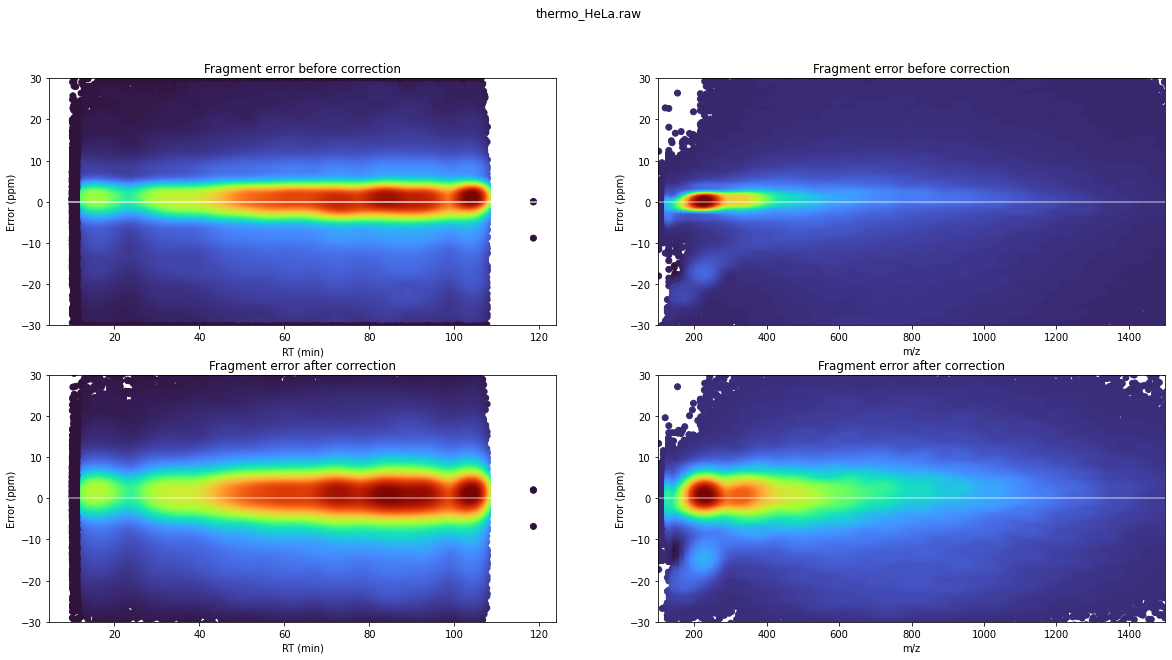

In [27]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

### Many modifications

2022-05-09 05:06:55> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 05:06:56> No settings provided. Creating from default settings.
2022-05-09 05:06:56> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 05:06:56> Logging to C:\Users\admin\alphapept\logs\log_20220509050656.txt.
2022-05-09 05:06:56> Platform information:
2022-05-09 05:06:56> system     - Windows
2022-05-09 05:06:56> release    - 10
2022-05-09 05:06:56> version    - 10.0.19044
2022-05-09 05:06:56> machine    - AMD64
2022-05-09 05:06:56> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 05:06:56> cpu count  - 24
2022-05-09 05:06:56> ram memory - 110.4/127.7 Gb (available/total)
2022-05-09 05:06:56> 
2022-05-09 05:06:56> Python information:
2022-05-09 05:06:56> SQLAlchemy                    - 1.4.35
2022-05-09 05:06:56> alphapept                     - 0.4.6
2022-05-09 05:06:56> biopython                     - 1.79
2022-05-09 05:06:56> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:06:56> Processing 1 files for step raw_conversion
2022-05-09 05:06:56> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-05-09 05:08:52> File conversion complete. Extracted 120,226 precursors.
2022-05-09 05:08:54> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [01:57<?, ?it/s]

2022-05-09 05:08:54> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:08:54> Processing 1 files for step find_features
2022-05-09 05:08:54> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-05-09 05:08:54> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-05-09 05:08:54> Hill extraction with centroid_tol 8 and max_gap 2
2022-05-09 05:08:58> Number of hills 1,105,353, len = 17.35
2022-05-09 05:08:58> Repeating hill extraction with centroid_tol 5.87
2022-05-09 05:09:03> Number of hills 1,227,331, len = 19.44
2022-05-09 05:09:04> After duplicate removal of hills 1,025,845
2022-05-09 05:09:14> After split hill_ptrs 1,207,373
2022-05-09 05:09:14> After filter hill_ptrs 1,188,406
2022-05-09 05:11:22> Extracting hill stats complete
2022-05-09 05:11:33> Found 184,383 pre isotope patterns.
2022-05-09 05:12:10> Extracted 198,500 isotope patterns.
2022-05-09 05:12:13> Report complete.
2022-05-09 05:12:14> Matching features 

  0%|                                                                                            | 0/1 [03:22<?, ?it/s]

2022-05-09 05:12:16> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:12:16> Starting first search.
2022-05-09 05:12:17> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-05-09 05:12:17> Setting Process limit to 22
2022-05-09 05:12:17> AlphaPool was set to 22 processes. Setting max to 22.
2022-05-09 05:16:09> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 - total peptides 1,430,810 


  5%|██▉                                                          | 0.047619047619047616/1 [03:52<1:17:37, 4890.72s/it]

2022-05-09 05:17:37> Block 2 of 21 complete - 9.52 % - created peptides 2,029,798 - total peptides 3,460,608 


 10%|██████                                                          | 0.09523809523809523/1 [05:23<47:14, 3132.69s/it]

2022-05-09 05:17:44> Block 3 of 21 complete - 14.29 % - created peptides 2,063,688 - total peptides 5,524,296 


 14%|█████████▏                                                      | 0.14285714285714285/1 [05:33<25:38, 1795.37s/it]

2022-05-09 05:17:49> Block 4 of 21 complete - 19.05 % - created peptides 2,108,144 - total peptides 7,632,440 


 19%|████████████▏                                                   | 0.19047619047619047/1 [05:38<15:14, 1129.49s/it]

2022-05-09 05:17:54> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 - total peptides 9,750,314 


 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:44<09:45, 768.51s/it]

2022-05-09 05:18:00> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 - total peptides 11,936,366 


 29%|██████████████████▊                                               | 0.2857142857142857/1 [05:52<06:40, 561.02s/it]

2022-05-09 05:18:08> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 - total peptides 14,206,558 


 33%|██████████████████████                                            | 0.3333333333333333/1 [06:00<04:51, 437.04s/it]

2022-05-09 05:18:17> Block 8 of 21 complete - 38.10 % - created peptides 2,321,598 - total peptides 16,528,156 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [06:09<03:39, 355.17s/it]

2022-05-09 05:18:25> Block 9 of 21 complete - 42.86 % - created peptides 2,317,248 - total peptides 18,845,404 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [06:14<02:39, 279.43s/it]

2022-05-09 05:18:31> Block 10 of 21 complete - 47.62 % - created peptides 2,364,188 - total peptides 21,209,592 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [06:18<01:54, 219.24s/it]

2022-05-09 05:18:35> Block 11 of 21 complete - 52.38 % - created peptides 2,352,456 - total peptides 23,562,048 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [06:23<01:26, 182.10s/it]

2022-05-09 05:18:39> Block 12 of 21 complete - 57.14 % - created peptides 2,346,492 - total peptides 25,908,540 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [06:28<01:07, 157.21s/it]

2022-05-09 05:18:44> Block 13 of 21 complete - 61.90 % - created peptides 2,354,928 - total peptides 28,263,468 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [06:31<00:51, 134.54s/it]

2022-05-09 05:18:48> Block 14 of 21 complete - 66.67 % - created peptides 2,366,294 - total peptides 30,629,762 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [06:37<00:42, 126.20s/it]

2022-05-09 05:18:53> Block 15 of 21 complete - 71.43 % - created peptides 2,400,722 - total peptides 33,030,484 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [06:42<00:34, 120.03s/it]

2022-05-09 05:18:58> Block 16 of 21 complete - 76.19 % - created peptides 2,390,120 - total peptides 35,420,604 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [06:47<00:27, 115.74s/it]

2022-05-09 05:19:03> Block 17 of 21 complete - 80.95 % - created peptides 2,440,588 - total peptides 37,861,192 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [06:52<00:21, 113.30s/it]

2022-05-09 05:19:08> Block 18 of 21 complete - 85.71 % - created peptides 2,431,708 - total peptides 40,292,900 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [06:57<00:15, 111.97s/it]

2022-05-09 05:19:13> Block 19 of 21 complete - 90.48 % - created peptides 2,447,522 - total peptides 42,740,422 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [07:02<00:10, 110.93s/it]

2022-05-09 05:19:19> Block 20 of 21 complete - 95.24 % - created peptides 2,499,774 - total peptides 45,240,196 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [07:08<00:05, 115.88s/it]

2022-05-09 05:19:25> Block 21 of 21 complete - 100.00 % - created peptides 2,514,900 - total peptides 47,755,096 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:14<00:00, 115.14s/it]

2022-05-09 05:19:31> Saving as first_search
2022-05-09 05:20:27> Complete. Created peptides 47,755,096
2022-05-09 05:20:29> First search complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:13<00:00, 493.04s/it]

2022-05-09 05:20:29> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:20:29> Processing 1 files for step calibrate_hdf
2022-05-09 05:20:29> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 05:20:31> Scoring using X-Tandem
2022-05-09 05:20:32> 38,540 target (385 decoy) of 122244 PSMs. fdr 0.009990 for a cutoff of 27.43 (set fdr was 0.01)
2022-05-09 05:20:32> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 05:20:34> Precursor calibration std 1.02, 0.23
2022-05-09 05:20:35> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-05-09 05:20:35> Starting fragment calibration.
2022-05-09 05:20:35> Calibrating fragments with neighbors
2022-05-09 05:20:36> Scoring using X-Tandem
2022-05-09 05:20:38> 38,540 target (385 decoy) of 122244 PSMs. fdr 0.009990 for a cutoff of 27.43 (set fdr was 0.01)
2022-05-09 05:20:39> Minimum hits for fragments before score 7.00.
2022-05-09 05:20:39> Minimum 

  0%|                                                                                            | 0/1 [01:15<?, ?it/s]

2022-05-09 05:21:45> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:21:45> Starting second search with DB.
2022-05-09 05:21:45> Starting second search.
2022-05-09 05:21:45> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-05-09 05:21:45> Setting Process limit to 22
2022-05-09 05:21:45> AlphaPool was set to 22 processes. Setting max to 22.
2022-05-09 05:25:14> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 - total peptides 1,430,810 


  5%|██▉                                                          | 0.047619047619047616/1 [03:29<1:09:44, 4393.45s/it]

2022-05-09 05:26:33> Block 2 of 21 complete - 9.52 % - created peptides 2,108,144 - total peptides 3,538,954 


 10%|██████                                                          | 0.09523809523809523/1 [04:49<42:11, 2798.14s/it]

2022-05-09 05:26:37> Block 3 of 21 complete - 14.29 % - created peptides 2,063,688 - total peptides 5,602,642 


 14%|█████████▏                                                      | 0.14285714285714285/1 [04:54<22:27, 1572.29s/it]

2022-05-09 05:26:39> Block 4 of 21 complete - 19.05 % - created peptides 2,029,798 - total peptides 7,632,440 


 19%|████████████▍                                                    | 0.19047619047619047/1 [04:57<13:12, 978.74s/it]

2022-05-09 05:26:47> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 - total peptides 9,750,314 


 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:05<08:42, 685.78s/it]

2022-05-09 05:26:51> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 - total peptides 11,936,366 


 29%|██████████████████▊                                               | 0.2857142857142857/1 [05:10<05:49, 488.68s/it]

2022-05-09 05:26:56> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 - total peptides 14,206,558 


 33%|██████████████████████                                            | 0.3333333333333333/1 [05:14<03:55, 353.28s/it]

2022-05-09 05:27:02> Block 8 of 21 complete - 38.10 % - created peptides 2,346,492 - total peptides 16,553,050 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [05:23<03:08, 304.29s/it]

2022-05-09 05:27:09> Block 9 of 21 complete - 42.86 % - created peptides 2,317,248 - total peptides 18,870,298 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [05:28<02:14, 236.07s/it]

2022-05-09 05:27:13> Block 10 of 21 complete - 47.62 % - created peptides 2,366,294 - total peptides 21,236,592 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [05:32<01:39, 190.85s/it]

2022-05-09 05:27:17> Block 11 of 21 complete - 52.38 % - created peptides 2,352,456 - total peptides 23,589,048 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [05:36<01:15, 158.33s/it]

2022-05-09 05:27:21> Block 12 of 21 complete - 57.14 % - created peptides 2,321,598 - total peptides 25,910,646 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [05:41<01:00, 140.69s/it]

2022-05-09 05:27:26> Block 13 of 21 complete - 61.90 % - created peptides 2,364,188 - total peptides 28,274,834 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [05:44<00:44, 116.65s/it]

2022-05-09 05:27:29> Block 14 of 21 complete - 66.67 % - created peptides 2,390,120 - total peptides 30,664,954 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [05:47<00:35, 105.42s/it]

2022-05-09 05:27:33> Block 15 of 21 complete - 71.43 % - created peptides 2,400,722 - total peptides 33,065,676 


 71%|███████████████████████████████████████████████▊                   | 0.7142857142857143/1 [05:51<00:28, 98.22s/it]

2022-05-09 05:27:37> Block 16 of 21 complete - 76.19 % - created peptides 2,354,928 - total peptides 35,420,604 


 76%|███████████████████████████████████████████████████                | 0.7619047619047619/1 [05:55<00:22, 93.94s/it]

2022-05-09 05:27:41> Block 17 of 21 complete - 80.95 % - created peptides 2,440,588 - total peptides 37,861,192 


 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [05:59<00:17, 91.55s/it]

2022-05-09 05:27:45> Block 18 of 21 complete - 85.71 % - created peptides 2,431,708 - total peptides 40,292,900 


 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [06:03<00:12, 89.94s/it]

2022-05-09 05:27:49> Block 19 of 21 complete - 90.48 % - created peptides 2,447,522 - total peptides 42,740,422 


 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [06:08<00:08, 93.41s/it]

2022-05-09 05:27:54> Block 20 of 21 complete - 95.24 % - created peptides 2,499,774 - total peptides 45,240,196 


 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [06:13<00:04, 92.65s/it]

2022-05-09 05:27:58> Block 21 of 21 complete - 100.00 % - created peptides 2,514,900 - total peptides 47,755,096 


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:17<00:00, 92.69s/it]

2022-05-09 05:28:03> Saving as second_search
2022-05-09 05:28:54> Complete. Created peptides 47,755,096
2022-05-09 05:28:55> Second search complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:10<00:00, 430.31s/it]

2022-05-09 05:28:55> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:28:55> Processing 1 files for step score_hdf
2022-05-09 05:28:55> Calling score_hdf
2022-05-09 05:28:57> Found second search psms for scoring.
2022-05-09 05:29:07> 56,711 target (5,671 decoy) of 115125 PSMs. fdr 0.099998 for a cutoff of 23.48 (set fdr was 0.1)


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:469: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_training = dfT_high.sample(n=n_train, random_state=random_state).append(dfD.sample(n=n_train, random_state=random_state))


2022-05-09 05:29:08> Training & cross-validation on 25619 targets and 25619 decoys
2022-05-09 05:29:57> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-05-09 05:29:57> The train accuracy was 0.7617978843826847
2022-05-09 05:29:57> Testing on 102478 targets and 102478 decoys
2022-05-09 05:29:59> The test accuracy was 0.717968734752825
2022-05-09 05:29:59> Top features {'x_tandem': 0.1554769851799099, 'hits_y': 0.13993885222280927, 'temp_idx': 0.12476323316218896, 'fragments_matched_n_ratio': 0.09726637484677479, 'hits': 0.08636893953629539, 'fragments_matched_int_ratio': 0.05056863808057725, 'mass_db': 0.03064785499068524, 'mass': 0.026936326616050096, 'fragments_matched_int_sum': 0.02607068014107424, 'index': 0.025843443523172742, 'n_missed': 0.018936603683288537, 'mz': 0.017043930504294064, 'n_AA': 0.012162273723434256, 'prec_offset': 0.01029708346644971, 'hits_b': 0.010290396983573811, 'prec_offset_ppm': 0.008890029

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2022-05-09 05:30:07> 79,545 target (795 decoy) of 160143 PSMs. fdr 0.009994 for a cutoff of 0.74 (set fdr was 0.01)
2022-05-09 05:30:07> Saving identifications to ms_data file.
2022-05-09 05:30:08> Saving identifications to ms_data file complete.
2022-05-09 05:30:13> Saving identifications to csv file complete.
2022-05-09 05:30:13> Filter df with custom score
2022-05-09 05:30:14> Global FDR on precursor
2022-05-09 05:30:14> 50,159 target (501 decoy) of 115476 PSMs. fdr 0.009988 for a cutoff of 0.78 (set fdr was 0.01)
2022-05-09 05:30:14> Global FDR cutoff at 0.7812578017780111.
2022-05-09 05:30:15> FDR on peptides complete. For 0.01 FDR found 50,867 targets and 501 decoys.
2022-05-09 05:30:15> Extracting fragment_ions
2022-05-09 05:30:26> Extracting fragment_ions complete.
2022-05-09 05:30:26> Exporting peptide_fdr on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-05-09 05:30:26> Scoring of files F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.

  0%|                                                                                            | 0/1 [01:31<?, ?it/s]

2022-05-09 05:30:27> ==== isobaric_labeling ====
2022-05-09 05:30:27> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:30:30> Fasta dict with length 20,611, Pept dict with length 44,260
2022-05-09 05:30:30> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:03<?, ?it/s]


2022-05-09 05:30:30> A total of 41,226 unique and 2,533 shared peptides.
2022-05-09 05:30:31> A total of 703 ambigious proteins
2022-05-09 05:30:32> A total of 484 unique and 17 shared peptides.
2022-05-09 05:30:32> A total of 17 ambigious proteins
2022-05-09 05:30:32> Global FDR on protein_group


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 05:30:32> 5,792 target (57 decoy) of 6842 PSMs. fdr 0.009841 for a cutoff of 0.94 (set fdr was 0.01)
2022-05-09 05:30:32> Global FDR cutoff at 0.9379596512753551.
2022-05-09 05:30:32> FDR on proteins complete. For 0.01 FDR found 50,241 targets and 60 decoys. A total of 5,849 proteins found.
2022-05-09 05:30:32> Saving complete.
2022-05-09 05:30:32> Protein groups complete.
2022-05-09 05:30:32> ==== quantification ====
2022-05-09 05:30:32> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(
  0%|                                                                                            | 0/1 [00:02<?, ?it/s]


2022-05-09 05:30:32> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 05:30:33> Complete.
2022-05-09 05:30:33> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.68it/s]

2022-05-09 05:30:33> LFQ complete.
2022-05-09 05:30:33> Extracting protein_summary
2022-05-09 05:30:33> Saved protein_summary of length 5,849 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 05:30:33> Updating protein_fdr.
2022-05-09 05:30:33> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'sample_group',
       'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 05:30:35> Saved df of length 50,301 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 05:30:35> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.88s/it]


2022-05-09 05:30:40> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 05:30:40> Analysis complete.


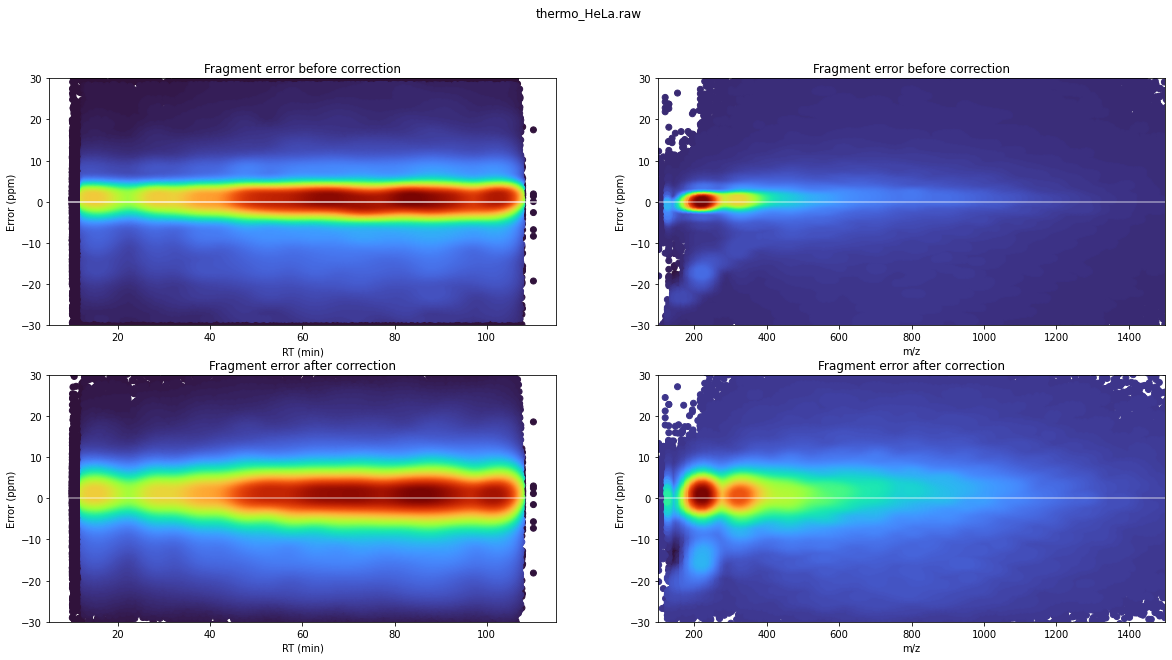

In [28]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

### Matching

In [29]:
%run -i ../test_ci.py $tmp_folder PXD015087_matching

2022-05-09 05:31:03> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 05:31:05> No settings provided. Creating from default settings.
2022-05-09 05:31:05> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 05:31:05> Logging to C:\Users\admin\alphapept\logs\log_20220509053105.txt.
2022-05-09 05:31:05> Platform information:
2022-05-09 05:31:05> system     - Windows
2022-05-09 05:31:05> release    - 10
2022-05-09 05:31:05> version    - 10.0.19044
2022-05-09 05:31:05> machine    - AMD64
2022-05-09 05:31:05> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 05:31:05> cpu count  - 24
2022-05-09 05:31:05> ram memory - 108.6/127.7 Gb (available/total)
2022-05-09 05:31:05> 
2022-05-09 05:31:05> Python information:
2022-05-09 05:31:05> SQLAlchemy                    - 1.4.35
2022-05-09 05:31:05> alphapept                     - 0.4.6
2022-05-09 05:31:05> biopython                     - 1.79
2022-05-09 05:31:05> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:31:06> FASTA contains 20,611 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:43<00:00, 29.25s/it]

2022-05-09 05:32:58> Digested 20,611 proteins and generated 5,076,854 spectra
2022-05-09 05:33:45> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:39<00:00, 159.85s/it]


2022-05-09 05:33:53> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:33:53> Processing 4 files for step raw_conversion
2022-05-09 05:33:53> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:34:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:54<02:42, 216.47s/it]

2022-05-09 05:34:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-05-09 05:34:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-05-09 05:34:47> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:54<00:00, 54.31s/it]

2022-05-09 05:34:47> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:34:47> Processing 4 files for step find_features
2022-05-09 05:34:48> Setting Process limit to 13
2022-05-09 05:34:48> AlphaPool was set to 13 processes. Setting max to 13.
2022-05-09 05:39:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %


 25%|███████████████████▊                                                           | 0.25/1 [04:36<13:49, 1106.50s/it]

2022-05-09 05:39:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [04:39<03:51, 462.79s/it]

2022-05-09 05:39:32> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:44<01:04, 259.98s/it]

2022-05-09 05:39:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:54<00:00, 294.57s/it]

2022-05-09 05:39:42> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:39:42> Starting first search.
2022-05-09 05:39:42> Processing 4 files for step search_db
2022-05-09 05:39:42> Searching. Setting Process limit to 13.
2022-05-09 05:39:42> AlphaPool was set to 13 processes. Setting max to 13.
2022-05-09 05:40:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:41<02:04, 166.51s/it]

2022-05-09 05:40:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-09 05:40:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:42<00:11, 44.08s/it]

2022-05-09 05:40:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-09 05:40:39> First search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:56<00:00, 56.58s/it]

2022-05-09 05:40:39> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:40:39> Processing 4 files for step calibrate_hdf
2022-05-09 05:40:39> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:41:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:55<02:46, 221.70s/it]

2022-05-09 05:41:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-05-09 05:41:39> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:59<00:16, 64.16s/it]

2022-05-09 05:41:39> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:00<00:00, 60.03s/it]

2022-05-09 05:41:39> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:41:39> Starting second search with DB.
2022-05-09 05:41:39> Processing 4 files for step search_db
2022-05-09 05:41:39> Searching. Setting Process limit to 14.
2022-05-09 05:41:39> AlphaPool was set to 14 processes. Setting max to 14.
2022-05-09 05:42:07> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:28<01:25, 113.44s/it]

2022-05-09 05:42:07> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-09 05:42:07> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:28<00:07, 29.61s/it]

2022-05-09 05:42:07> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-09 05:42:21> Second search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:42<00:00, 42.11s/it]

2022-05-09 05:42:21> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:42:21> Processing 4 files for step score_hdf
2022-05-09 05:42:21> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:42:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:32<01:37, 130.57s/it]

2022-05-09 05:42:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step score_hdf succeeded. 50.00 %
2022-05-09 05:42:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step score_hdf succeeded. 75.00 %
2022-05-09 05:42:54> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step score_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:32<00:00, 32.73s/it]

2022-05-09 05:42:54> ==== align ====


2022-05-09 05:42:54> cache info: iteration 0 items 1 size 2142.0 kB
2022-05-09 05:42:54> cache info: iteration 0 items 2 size 4279.9 kB
2022-05-09 05:42:56> Total deviation before calibration {'mz': 2.060703568702252e-06, 'rt': 0.17774593181817444}
2022-05-09 05:42:56> Mean deviation before calibration {'mz': 3.4345059478370866e-07, 'rt': 0.02962432196969574}
2022-05-09 05:42:56> Solving equation system with 60 jobs.
2022-05-09 05:42:56> Regression score is 0.9999401561868
2022-05-09 05:42:56> Solving equation system complete.
2022-05-09 05:42:56> Applying offset
2022-05-09 05:42:56> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf - peptide_fdr.
2022-05-09 05:42:57> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf - feature_table.
2022-05-09 05:42:58> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.ms_data.hdf - peptide_fdr.
2022-05-09 05:42:58> Saving F:\projects\alph

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:43:31> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-05-09 05:43:31> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 05:43:32> A total of 29,254 unique and 2,254 shared peptides.
2022-05-09 05:43:33> A total of 562 ambigious proteins
2022-05-09 05:43:33> A total of 791 unique and 23 shared peptides.
2022-05-09 05:43:33> A total of 22 ambigious proteins
2022-05-09 05:43:33> Global FDR on protein_group


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 05:43:34> 3,737 target (37 decoy) of 5238 PSMs. fdr 0.009901 for a cutoff of 0.74 (set fdr was 0.01)
2022-05-09 05:43:34> Global FDR cutoff at 0.74.
2022-05-09 05:43:34> FDR on proteins complete. For 0.01 FDR found 108,787 targets and 82 decoys. A total of 3,781 proteins found.
2022-05-09 05:43:34> Saving complete.
2022-05-09 05:43:34> Protein groups complete.
2022-05-09 05:43:34> ==== quantification ====
2022-05-09 05:43:34> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(


2022-05-09 05:43:34> Delayed Normalization.
2022-05-09 05:43:35> Setting minimum occurence to 4.0


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-05-09 05:43:35> Delayed normalization with SLSQP on (1, 4, 19690)


2022-05-09 05:43:35> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 05:43:36> Complete.
2022-05-09 05:43:36> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:43:36> Preparing protein table for parallel processing.


 20%|█████████████▏                                                    | 0.19899497487437184/1 [00:02<00:11, 14.05s/it]

2022-05-09 05:43:39> Starting protein extraction for 3781 proteins.
2022-05-09 05:43:39> AlphaPool was set to 24 processes. Setting max to 24.


100%|██████████████████████████████████████████████████████████████████▉| 0.9989420788151282/1 [00:59<00:00, 62.71s/it]

2022-05-09 05:44:39> LFQ complete.
2022-05-09 05:44:39> Extracting protein_summary
2022-05-09 05:44:39> Saved protein_summary of length 3,781 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 05:44:39> Updating protein_fdr.
2022-05-09 05:44:39> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 05:44:45> Saved df of length 108,869 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 05:44:45> ==== export ====


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:09<00:00, 69.17s/it]


2022-05-09 05:44:48> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 05:44:48> Analysis complete.


### Matching & Fractions

In [30]:
%run -i ../test_ci.py $tmp_folder PXD015087_matching_fraction

2022-05-09 05:44:49> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-05-09 05:44:51> No settings provided. Creating from default settings.
2022-05-09 05:44:51> Couldn't find compiled exe. Using Python version for testing.
2022-05-09 05:44:51> Logging to C:\Users\admin\alphapept\logs\log_20220509054451.txt.
2022-05-09 05:44:51> Platform information:
2022-05-09 05:44:51> system     - Windows
2022-05-09 05:44:51> release    - 10
2022-05-09 05:44:51> version    - 10.0.19044
2022-05-09 05:44:51> machine    - AMD64
2022-05-09 05:44:51> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-05-09 05:44:51> cpu count  - 24
2022-05-09 05:44:51> ram memory - 109.8/127.7 Gb (available/total)
2022-05-09 05:44:51> 
2022-05-09 05:44:51> Python information:
2022-05-09 05:44:51> SQLAlchemy                    - 1.4.35
2022-05-09 05:44:51> alphapept                     - 0.4.6
2022-05-09 05:44:51> biopython                     - 1.79
2022-05-09 05:44:51> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:44:52> FASTA contains 20,611 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:41<00:00, 26.49s/it]

2022-05-09 05:46:42> Digested 20,611 proteins and generated 5,076,854 spectra
2022-05-09 05:47:29> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:37<00:00, 157.73s/it]


2022-05-09 05:47:37> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:47:37> Processing 4 files for step raw_conversion
2022-05-09 05:47:37> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:48:31> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:53<02:40, 213.62s/it]

2022-05-09 05:48:31> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-05-09 05:48:32> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:54<00:14, 56.67s/it]

2022-05-09 05:48:32> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:54<00:00, 54.47s/it]

2022-05-09 05:48:32> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:48:32> Processing 4 files for step find_features
2022-05-09 05:48:32> Setting Process limit to 14
2022-05-09 05:48:32> AlphaPool was set to 14 processes. Setting max to 14.
2022-05-09 05:53:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %


 25%|███████████████████▊                                                           | 0.25/1 [04:32<13:37, 1089.43s/it]

2022-05-09 05:53:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [04:38<03:51, 463.95s/it]

2022-05-09 05:53:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %
2022-05-09 05:53:14> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:42<00:00, 282.31s/it]

2022-05-09 05:53:14> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:53:14> Starting first search.
2022-05-09 05:53:14> Processing 4 files for step search_db
2022-05-09 05:53:14> Searching. Setting Process limit to 14.
2022-05-09 05:53:14> AlphaPool was set to 14 processes. Setting max to 14.
2022-05-09 05:53:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:41<02:04, 165.99s/it]

2022-05-09 05:53:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-09 05:53:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:42<00:10, 43.82s/it]

2022-05-09 05:53:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-09 05:54:11> First search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:56<00:00, 57.00s/it]

2022-05-09 05:54:11> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:54:11> Processing 4 files for step calibrate_hdf
2022-05-09 05:54:11> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:55:09> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:57<02:51, 229.25s/it]

2022-05-09 05:55:09> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-05-09 05:55:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:59<00:15, 62.49s/it]

2022-05-09 05:55:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:59<00:00, 59.46s/it]

2022-05-09 05:55:11> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:55:11> Starting second search with DB.
2022-05-09 05:55:11> Processing 4 files for step search_db
2022-05-09 05:55:11> Searching. Setting Process limit to 14.
2022-05-09 05:55:11> AlphaPool was set to 14 processes. Setting max to 14.
2022-05-09 05:55:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:28<01:26, 115.56s/it]

2022-05-09 05:55:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-05-09 05:55:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %
2022-05-09 05:55:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %
2022-05-09 05:55:54> Second search complete.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:42<00:00, 42.93s/it]

2022-05-09 05:55:54> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:55:54> Processing 4 files for step score_hdf
2022-05-09 05:55:54> AlphaPool was set to 24 processes. Setting max to 24.
2022-05-09 05:56:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:32<01:38, 131.52s/it]

2022-05-09 05:56:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step score_hdf succeeded. 50.00 %
2022-05-09 05:56:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step score_hdf succeeded. 75.00 %
2022-05-09 05:56:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step score_hdf succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:33<00:00, 33.02s/it]

2022-05-09 05:56:27> ==== align ====


2022-05-09 05:56:27> cache info: iteration 0 items 1 size 2142.0 kB
2022-05-09 05:56:27> cache info: iteration 0 items 2 size 4279.9 kB
2022-05-09 05:56:28> Total deviation before calibration {'mz': 2.060703568702252e-06, 'rt': 0.17774593181817444}
2022-05-09 05:56:28> Mean deviation before calibration {'mz': 3.4345059478370866e-07, 'rt': 0.02962432196969574}
2022-05-09 05:56:28> Solving equation system with 60 jobs.
2022-05-09 05:56:28> Regression score is 0.9999401561868
2022-05-09 05:56:28> Solving equation system complete.
2022-05-09 05:56:28> Applying offset
2022-05-09 05:56:28> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf - peptide_fdr.
2022-05-09 05:56:29> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf - feature_table.
2022-05-09 05:56:29> Saving F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.ms_data.hdf - peptide_fdr.
2022-05-09 05:56:30> Saving F:\projects\alph

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:57:02> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-05-09 05:57:02> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-05-09 05:57:03> A total of 29,254 unique and 2,254 shared peptides.
2022-05-09 05:57:04> A total of 562 ambigious proteins
2022-05-09 05:57:04> A total of 791 unique and 23 shared peptides.
2022-05-09 05:57:04> A total of 22 ambigious proteins
2022-05-09 05:57:05> Global FDR on protein_group


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:790: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_groups = protein_targets.append(protein_decoys)


2022-05-09 05:57:05> 3,737 target (37 decoy) of 5238 PSMs. fdr 0.009901 for a cutoff of 0.74 (set fdr was 0.01)
2022-05-09 05:57:05> Global FDR cutoff at 0.74.
2022-05-09 05:57:05> FDR on proteins complete. For 0.01 FDR found 108,787 targets and 82 decoys. A total of 3,781 proteins found.
2022-05-09 05:57:05> Saving complete.
2022-05-09 05:57:05> Protein groups complete.
2022-05-09 05:57:05> ==== quantification ====
2022-05-09 05:57:05> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\score.py:1015: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df_pg.to_hdf(


2022-05-09 05:57:06> Delayed Normalization.
2022-05-09 05:57:06> Setting minimum occurence to 4.0


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-05-09 05:57:06> Delayed normalization with SLSQP on (2, 2, 19690)


2022-05-09 05:57:06> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-05-09 05:57:07> Complete.
2022-05-09 05:57:07> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:762: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-05-09 05:57:07> Preparing protein table for parallel processing.


 20%|█████████████▏                                                     | 0.1976725733932822/1 [00:02<00:06,  8.01s/it]

2022-05-09 05:57:09> Starting protein extraction for 3781 proteins.
2022-05-09 05:57:09> AlphaPool was set to 24 processes. Setting max to 24.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:01<00:00, 52.34s/it]

2022-05-09 05:58:12> LFQ complete.
2022-05-09 05:58:12> Extracting protein_summary
2022-05-09 05:58:12> Saved protein_summary of length 3,781 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-05-09 05:58:12> Updating protein_fdr.
2022-05-09 05:58:12> Exporting as csv.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\alphapept\interface.py:823: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'target_precursor', 'type', 'filename', 'shortname',
       'sample_group', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  df.to_hdf(


2022-05-09 05:58:18> Saved df of length 108,869 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-05-09 05:58:18> ==== export ====


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:11<00:00, 71.13s/it]


2022-05-09 05:58:21> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-05-09 05:58:21> Analysis complete.
